## 第七章：PyTorch可视化


### 7.1 可视化网络结构

随着深度神经网络做的的发展，网络的结构越来越复杂，我们也很难确定每一层的输入结构，输出结构以及参数等信息，这样导致我们很难在短时间内完成debug。因此掌握一个可以用来可视化网络结构的工具是十分有必要的。类似的功能在另一个深度学习库Keras中可以调用一个叫做`model.summary()`的API来很方便地实现，调用后就会显示我们的模型参数，输入大小，输出大小，模型的整体参数等，但是在PyTorch中没有这样一种便利的工具帮助我们可视化我们的模型结构。

为了解决这个问题，人们开发了torchinfo工具包 ( torchinfo是由torchsummary和torchsummaryX重构出的库, torchsummary和torchsummaryX已经许久没更新了) 。本节我们将介绍如何使用torchinfo来可视化网络结构。

经过本节的学习，你将收获：

- 可视化网络结构的方法

#### 7.1.1 使用print函数打印模型基础信息

在本节中，我们将使用ResNet18的结构进行展示。

In [1]:
import torch
import torch.nn as nn 
import torchvision.models as models 
model = models.resnet18()

通过上面的两步，我们就得到resnet18的模型结构。在学习torchinfo之前，让我们先看下直接print(model)的结果。

In [2]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

我们可以发现单纯的print(model)，只能得出基础构件的信息，既不能显示出每一层的shape，也不能显示对应参数量的大小，为了解决这些问题，我们就需要介绍出我们今天的主人公`torchinfo`。

#### 7.1.2 使用torchinfo可视化网络结构



- **torchinfo的安装**
```
# 安装方法一
pip install torchinfo 
# 安装方法二
conda install -c conda-forge torchinfo
```


- **torchinfo的使用**

trochinfo的使用也是十分简单，我们只需要使用`torchinfo.summary()`就行了，必需的参数分别是model，input_size[batch_size,channel,h,w]，更多参数可以参考[documentation](https://github.com/TylerYep/torchinfo#documentation)，下面让我们一起通过一个实例进行学习。

In [3]:
import torchvision.models as models
from torchinfo import summary
resnet18 = models.resnet18() # 实例化模型
summary(resnet18, (1, 3, 224, 224)) # 1：batch_size 3:图片的通道数 224: 图片的高宽

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   --                        --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

我们可以看到torchinfo提供了更加详细的信息，包括模块信息（每一层的类型、输出shape和参数量）、模型整体的参数量、模型大小、一次前向或者反向传播需要的内存大小等

### **注意**：

但你使用的是colab或者jupyter notebook时，想要实现该方法，`summary()`一定是该单元（即notebook中的cell）的返回值，否则我们就需要使用`print(summary(...))`来可视化。

## 7.2 CNN可视化

卷积神经网络（CNN）是深度学习中非常重要的模型结构，它广泛地用于图像处理，极大地提升了模型表现，推动了计算机视觉的发展和进步。但CNN是一个“黑盒模型”，人们并不知道CNN是如何获得较好表现的，由此带来了深度学习的可解释性问题。如果能理解CNN工作的方式，人们不仅能够解释所获得的结果，提升模型的鲁棒性，而且还能有针对性地改进CNN的结构以获得进一步的效果提升。

理解CNN的重要一步是可视化，包括可视化特征是如何提取的、提取到的特征的形式以及模型在输入数据上的关注点等。本节我们就从上述三个方面出发，介绍如何在PyTorch的框架下完成CNN模型的可视化。

经过本节的学习，你将收获：

- 可视化CNN卷积核的方法
- 可视化CNN特征图的方法
- 可视化CNN显著图（class activation map）的方法

### 7.2.1 CNN卷积核可视化

卷积核在CNN中负责提取特征，可视化卷积核能够帮助人们理解CNN各个层在提取什么样的特征，进而理解模型的工作原理。例如在Zeiler和Fergus 2013年的[paper](https://arxiv.org/pdf/1311.2901.pdf)中就研究了CNN各个层的卷积核的不同，他们发现靠近输入的层提取的特征是相对简单的结构，而靠近输出的层提取的特征就和图中的实体形状相近了，如下图所示：

![layer2](https://datawhalechina.github.io/thorough-pytorch/_images/layer2.png)

![layer3](https://datawhalechina.github.io/thorough-pytorch/_images/layer3.png)

![layer4](https://datawhalechina.github.io/thorough-pytorch/_images/layer4.png)

在PyTorch中可视化卷积核也非常方便，核心在于特定层的卷积核即特定层的模型权重，可视化卷积核就等价于可视化对应的权重矩阵。下面给出在PyTorch中可视化卷积核的实现方案，以torchvision自带的VGG11模型为例。

首先加载模型，并确定模型的层信息：

In [6]:
import torch
from torchvision.models import vgg11

model = vgg11(pretrained=True)
print(dict(model.features.named_children()))

Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to C:\Users\zhou/.cache\torch\hub\checkpoints\vgg11-8a719046.pth
100.0%


{'0': Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '1': ReLU(inplace=True), '2': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '3': Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '4': ReLU(inplace=True), '5': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '6': Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '7': ReLU(inplace=True), '8': Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '9': ReLU(inplace=True), '10': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '11': Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '12': ReLU(inplace=True), '13': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '14': ReLU(inplace=True), '15': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '16': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '17'

卷积核对应的应为卷积层（Conv2d），这里以第“3”层为例，可视化对应的参数：


torch.Size([128, 64, 3, 3])


c:\ProgramData\Anaconda3\envs\torch_py37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


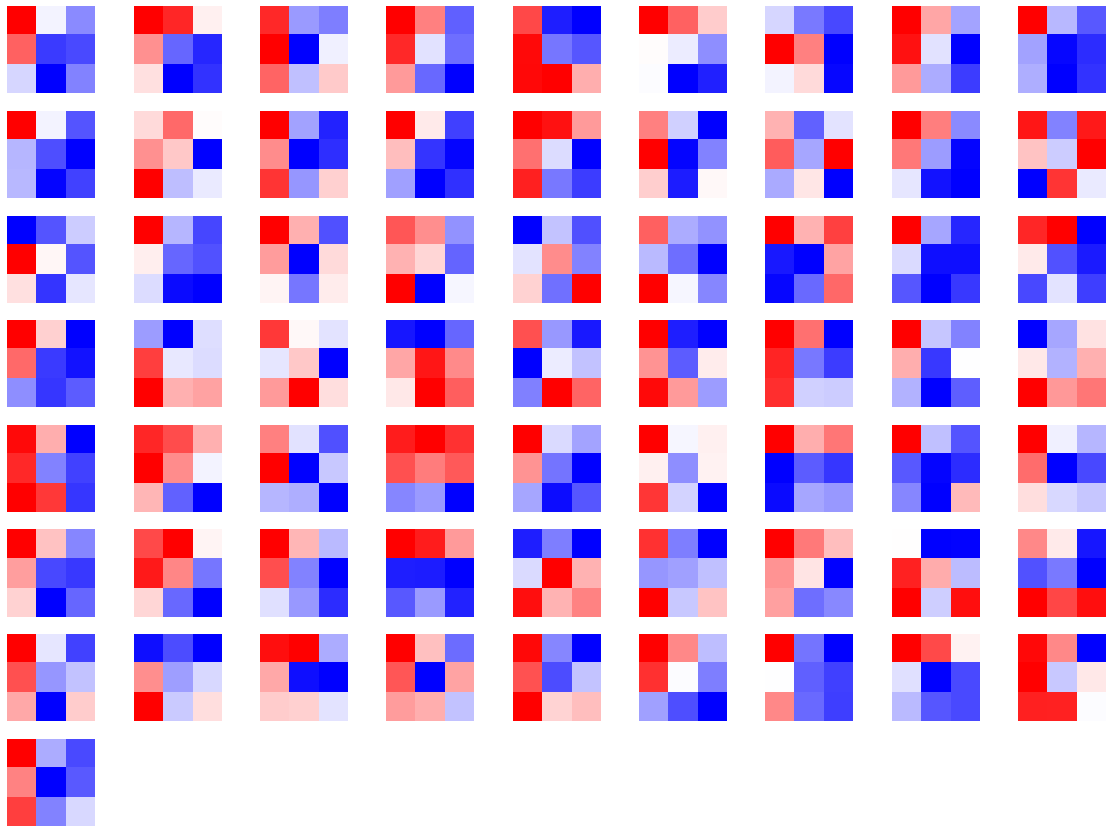

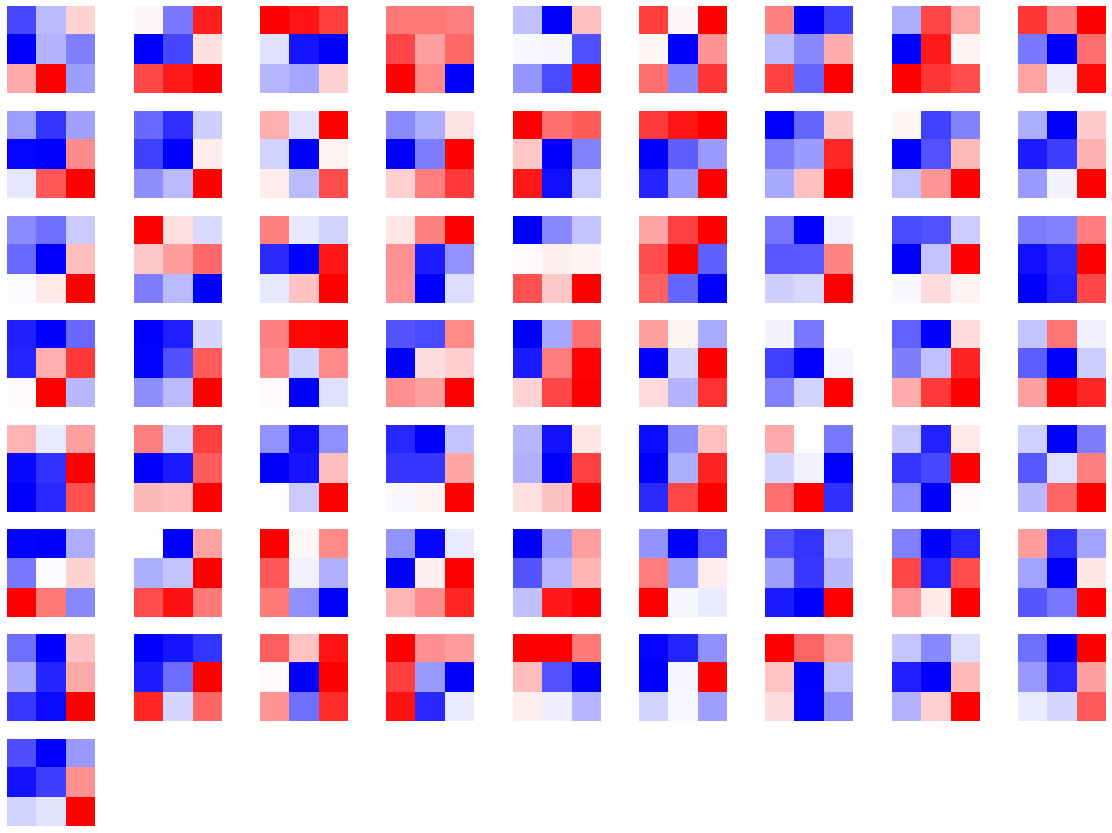

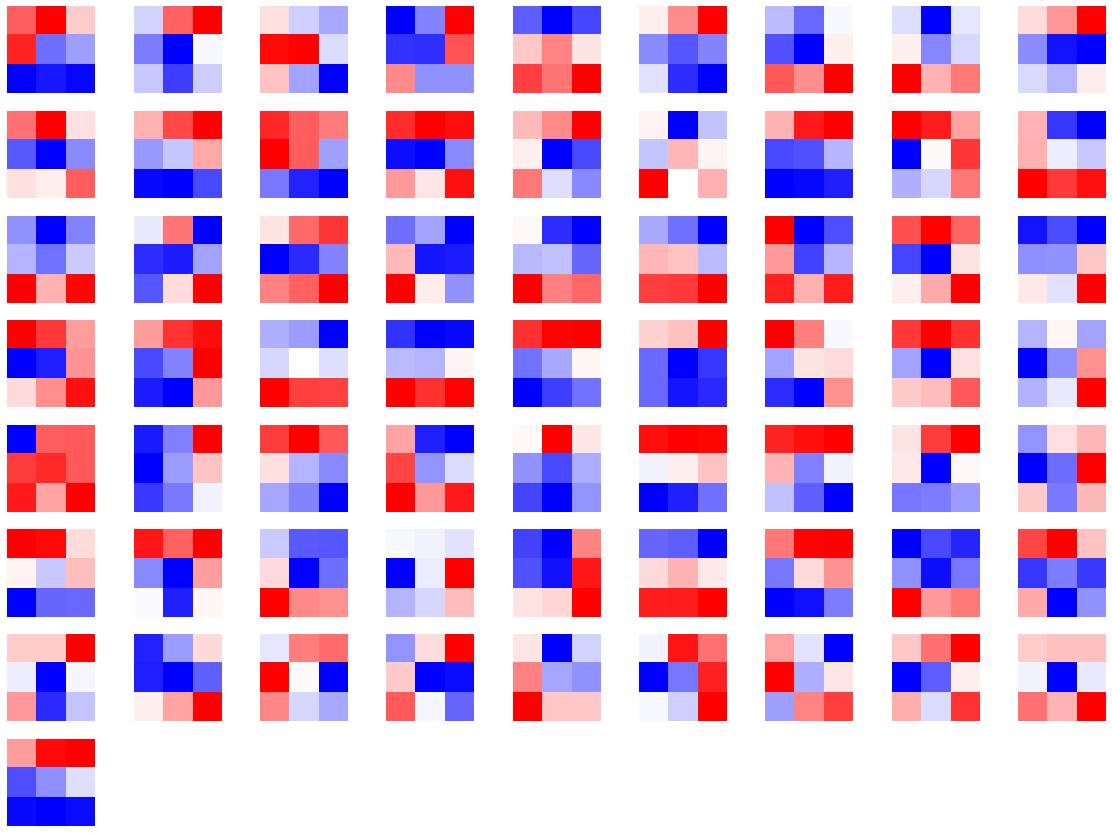

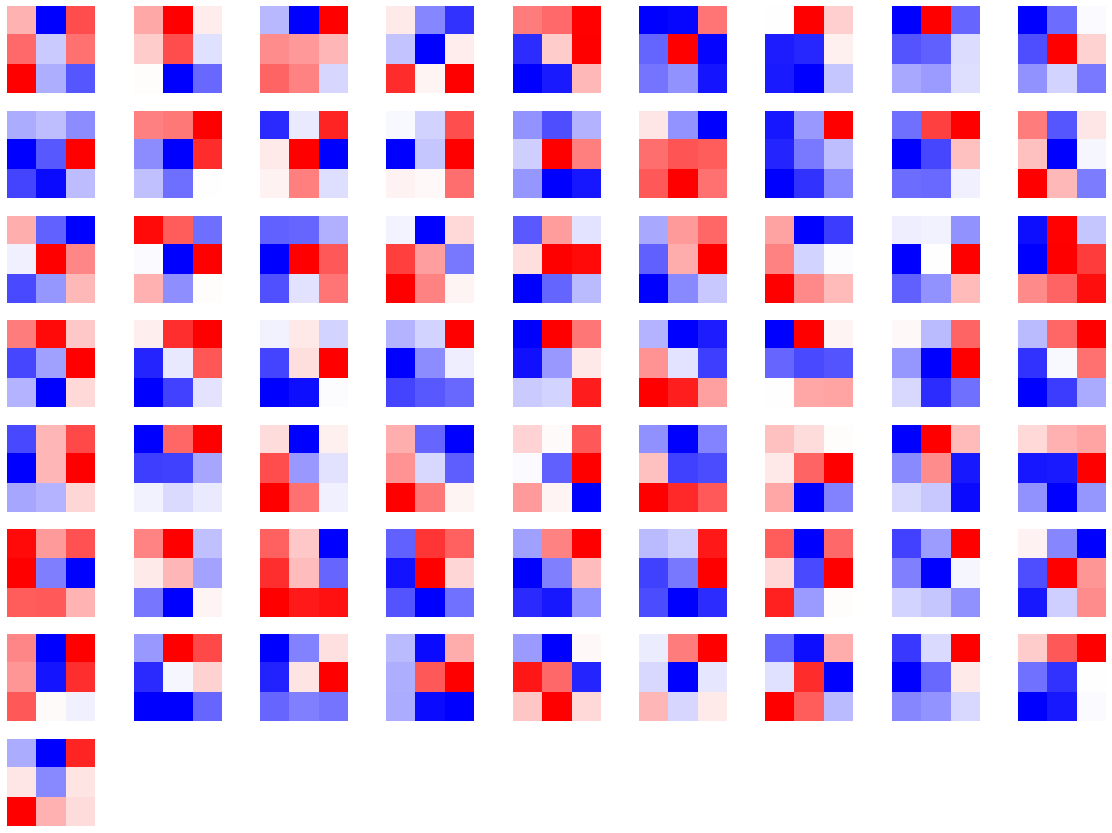

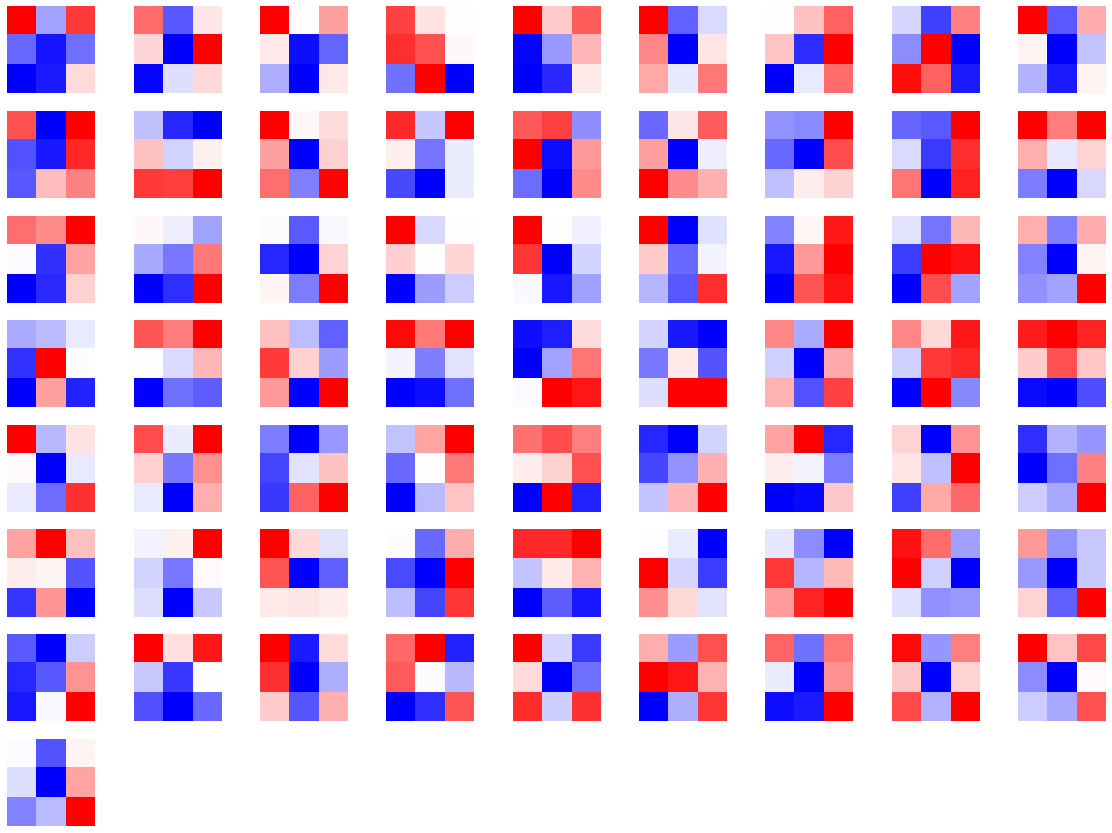

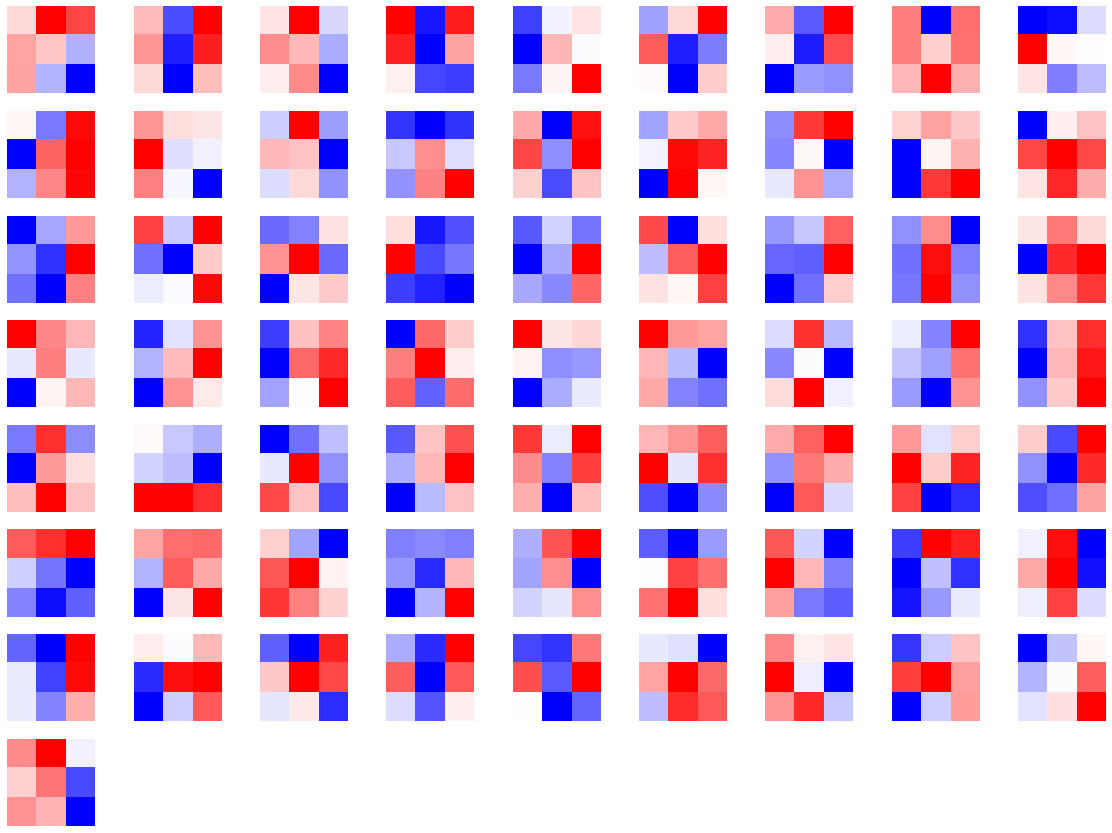

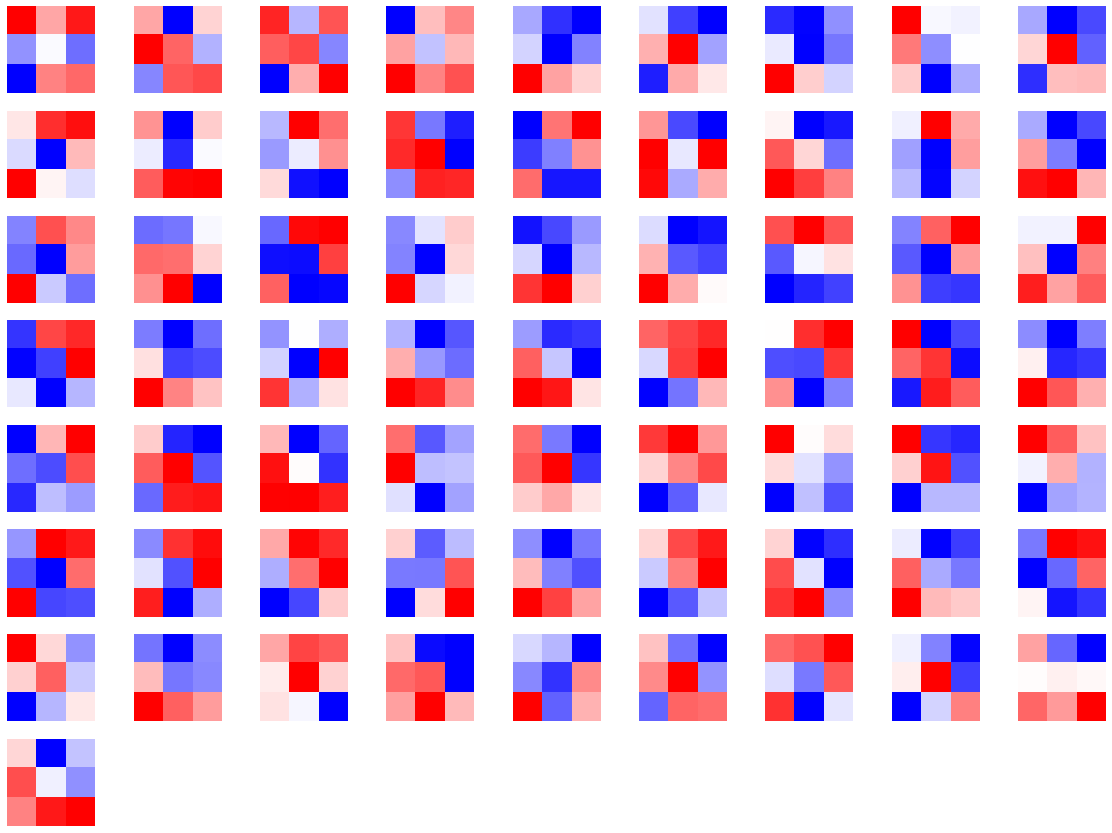

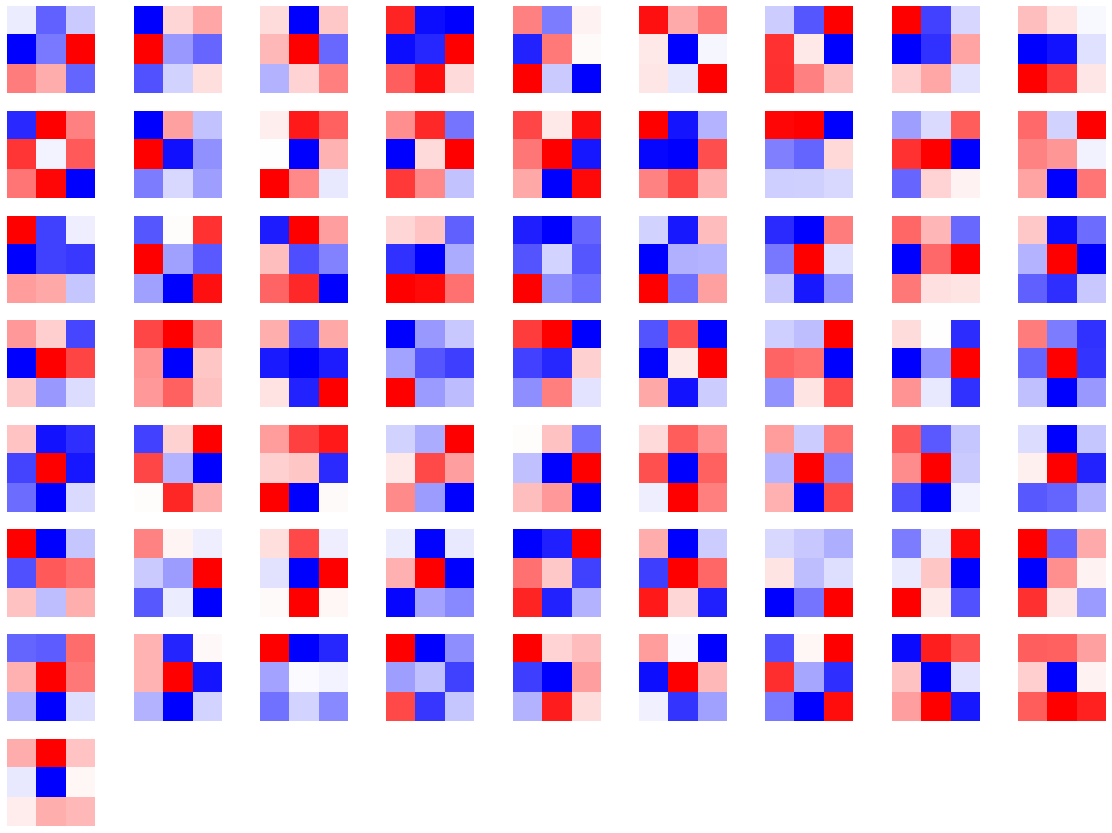

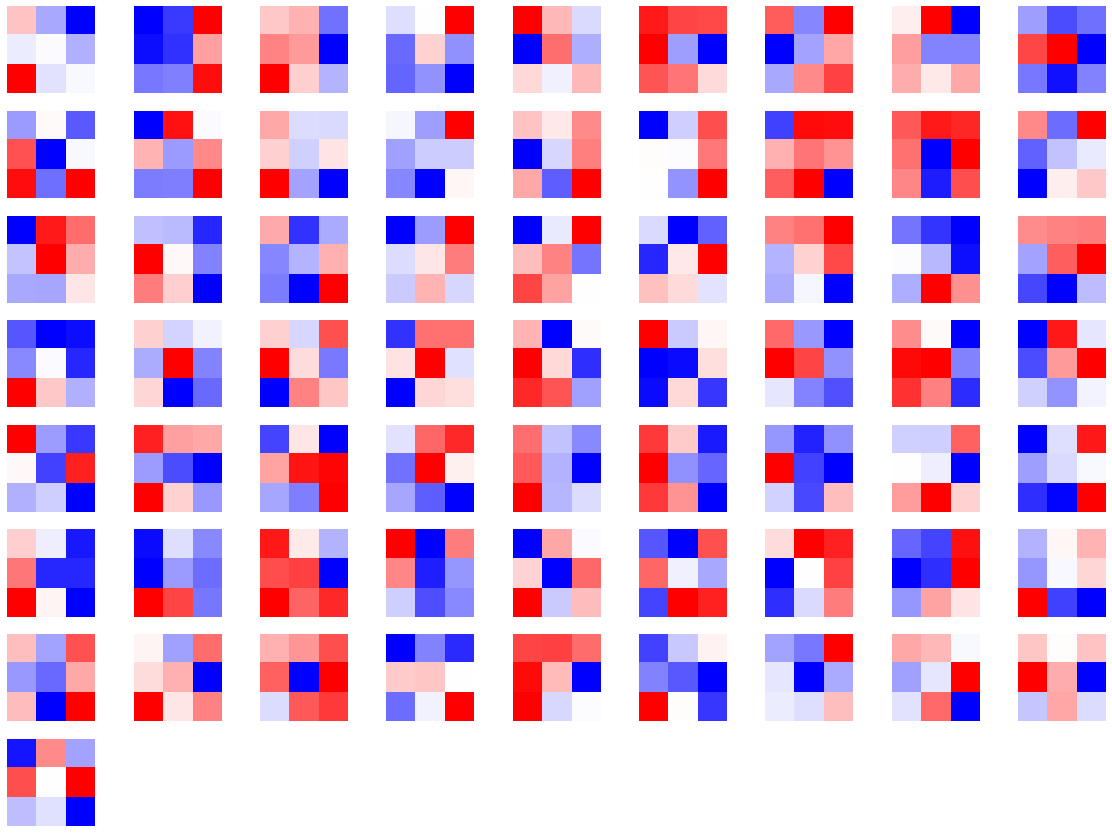

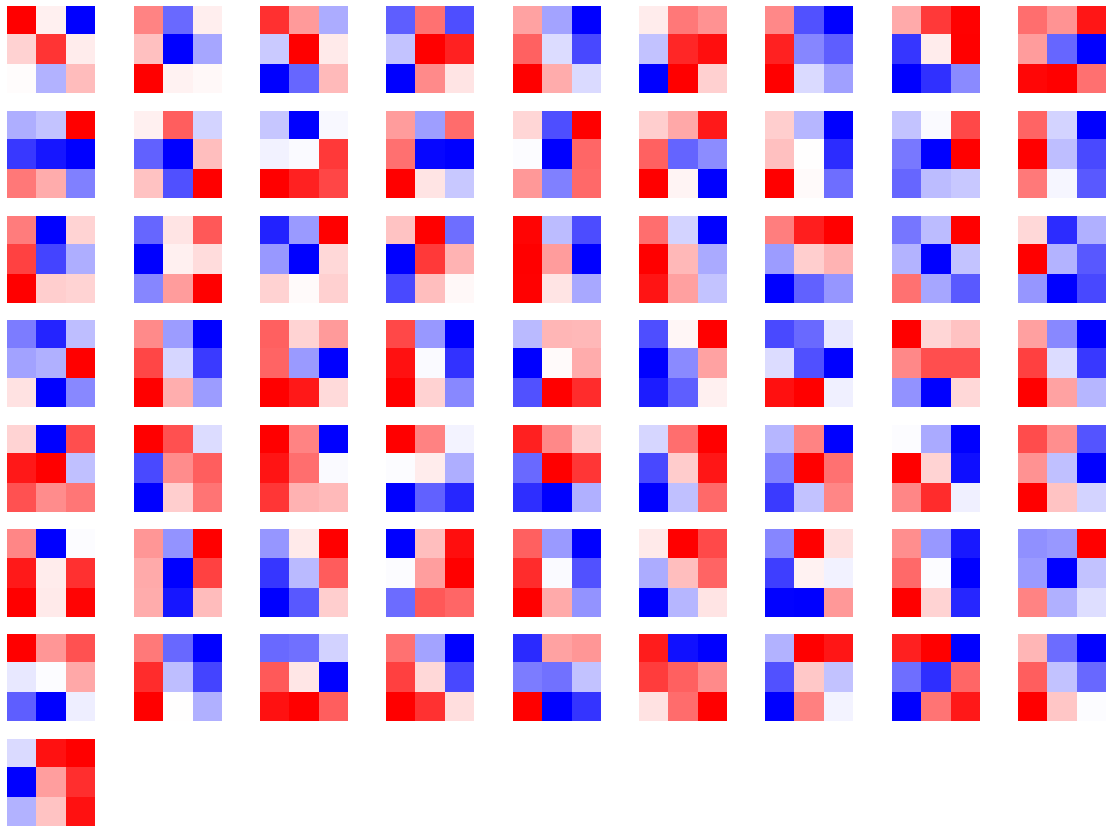

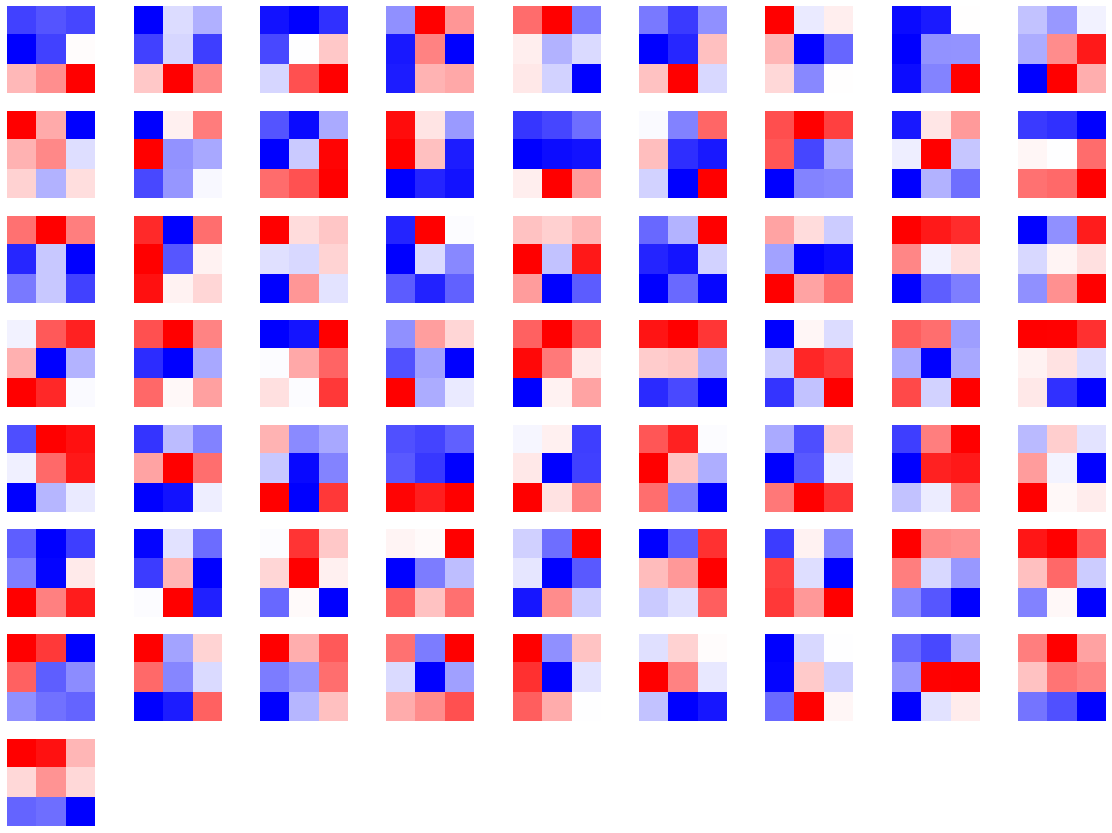

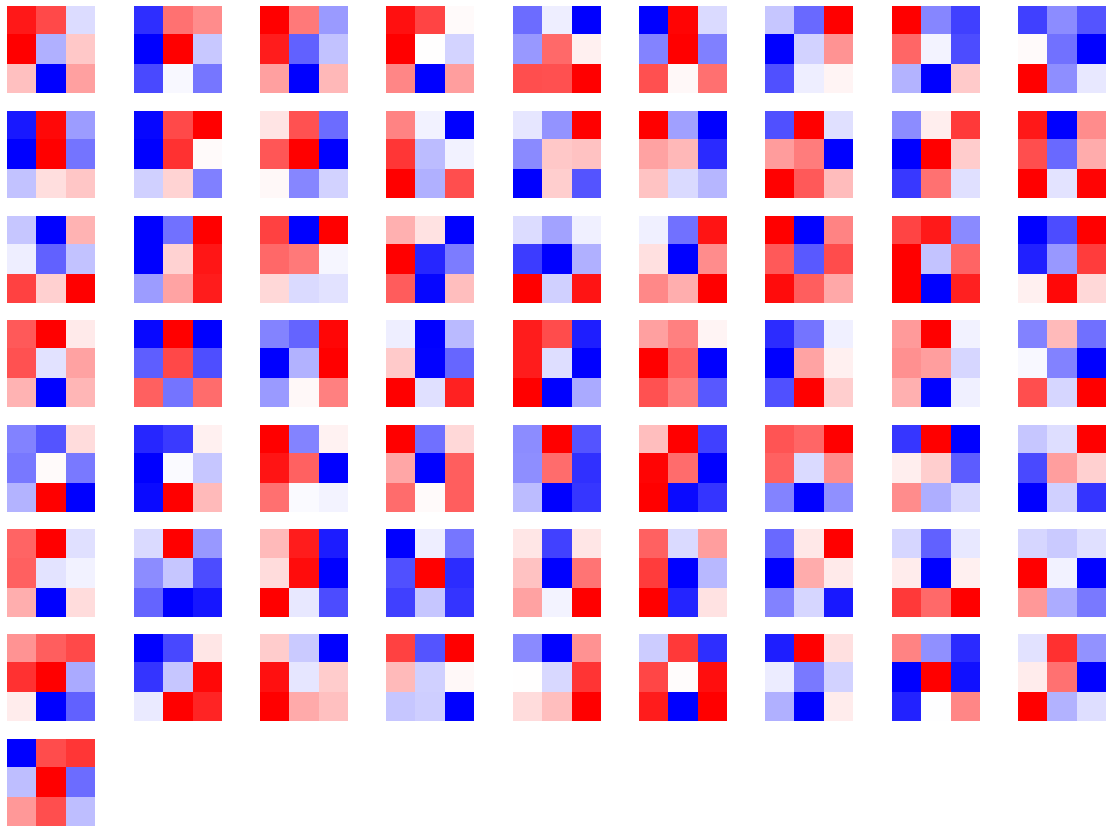

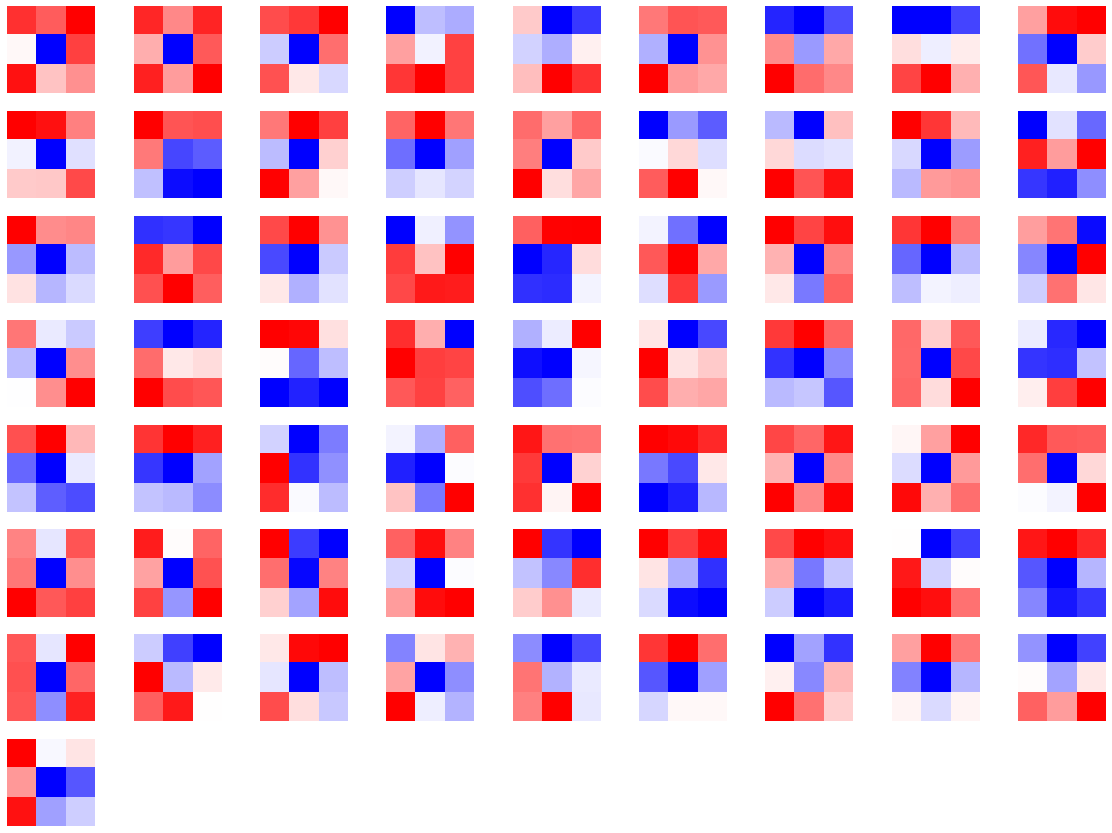

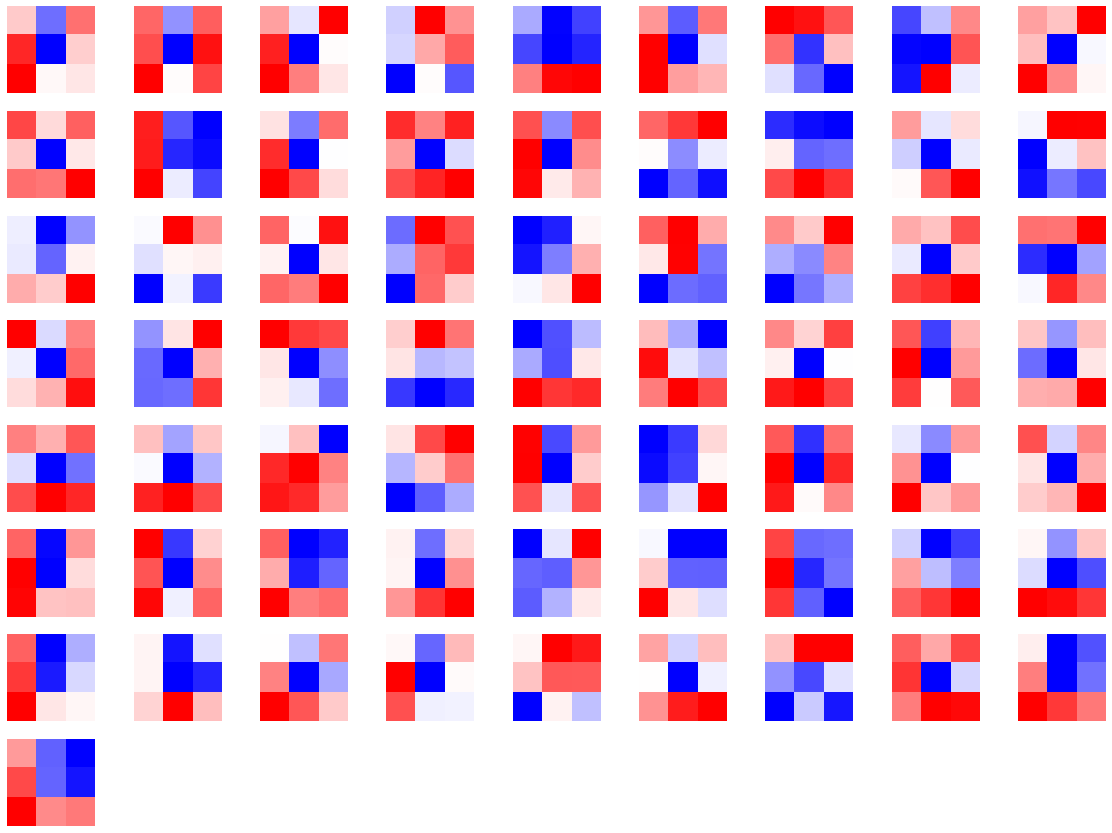

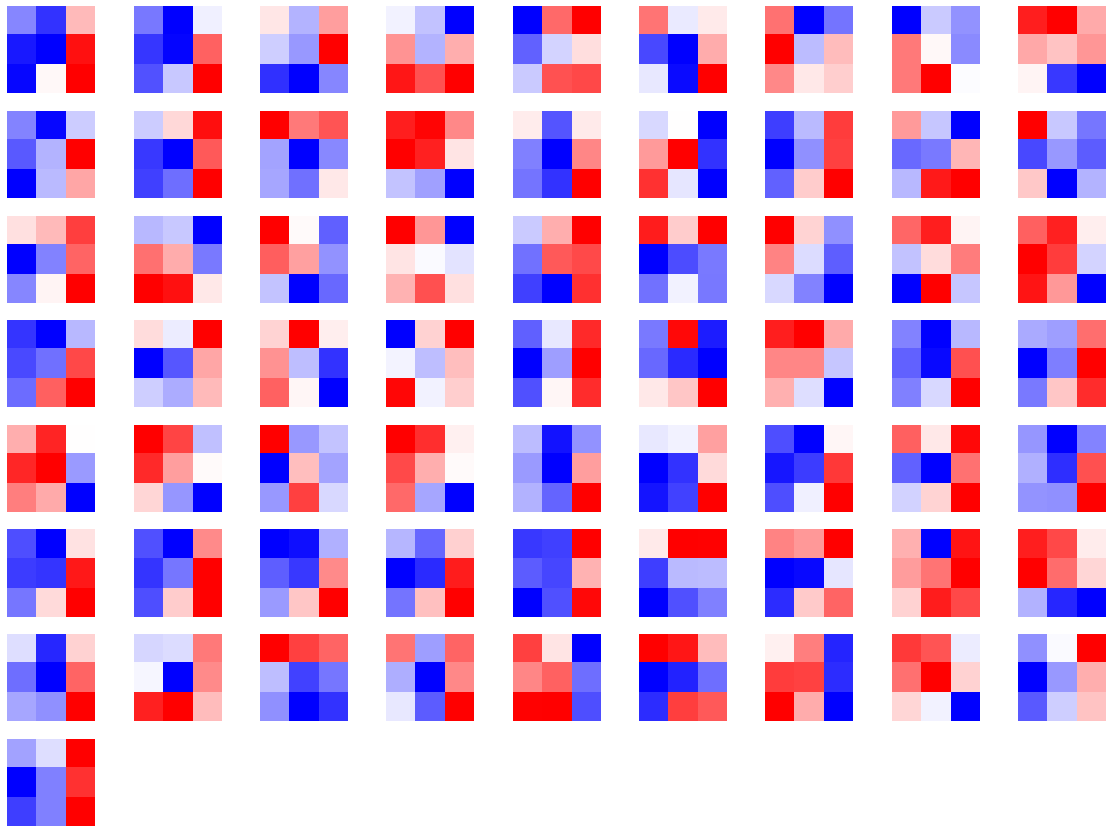

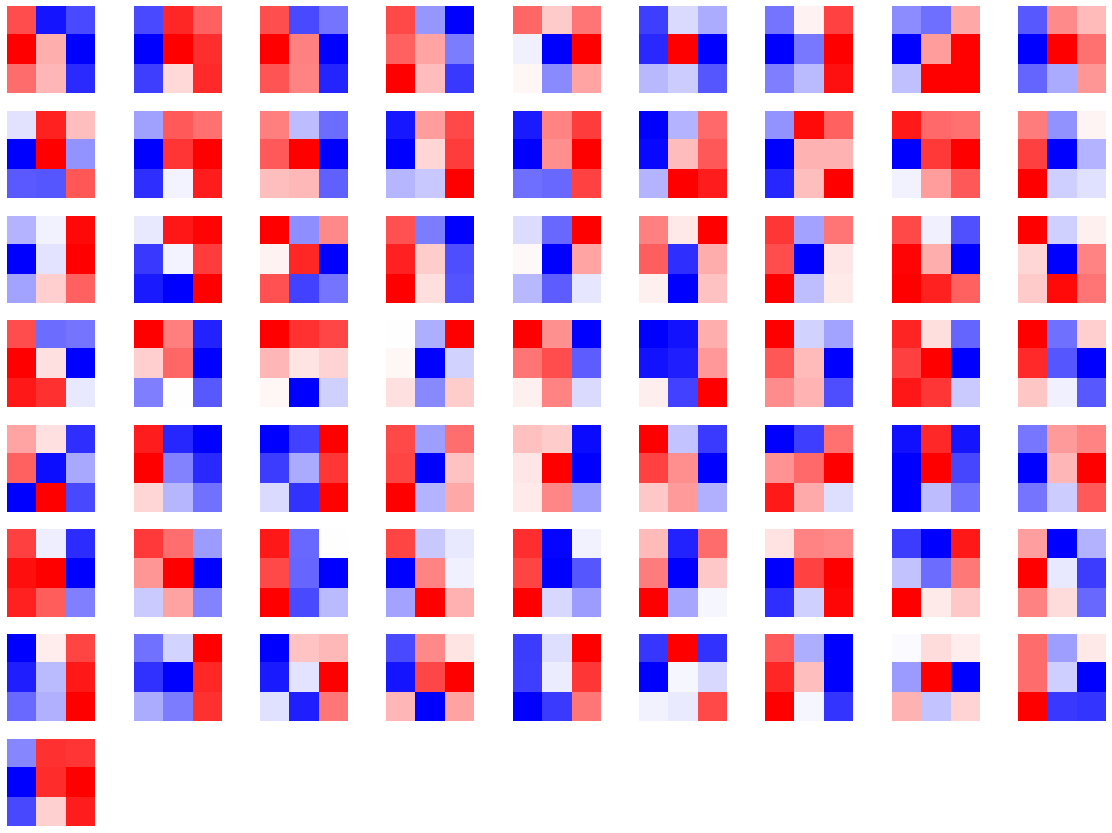

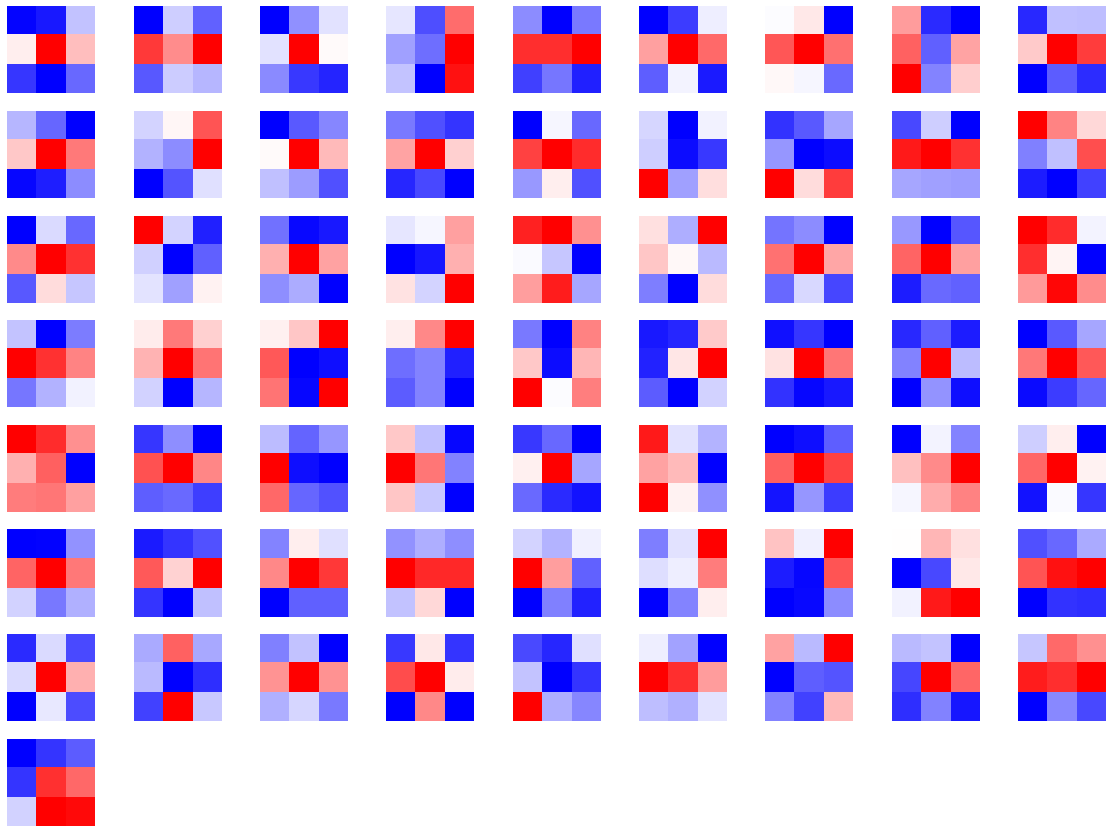

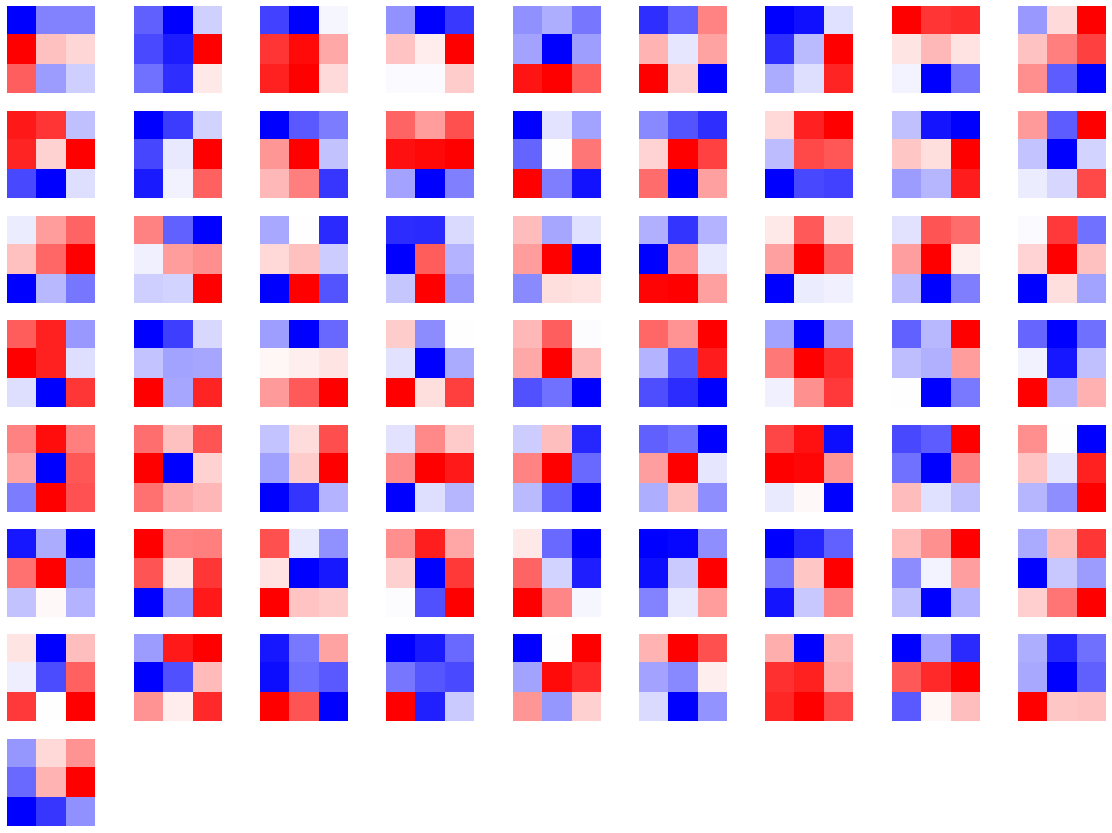

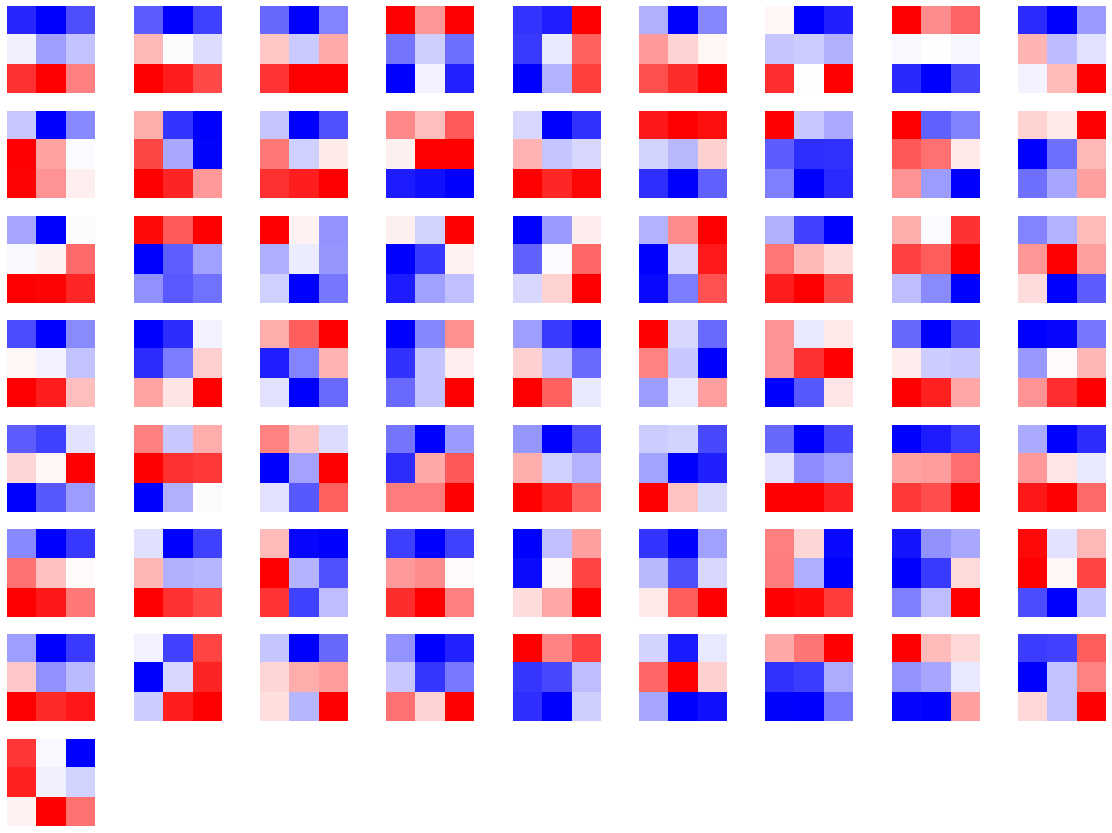

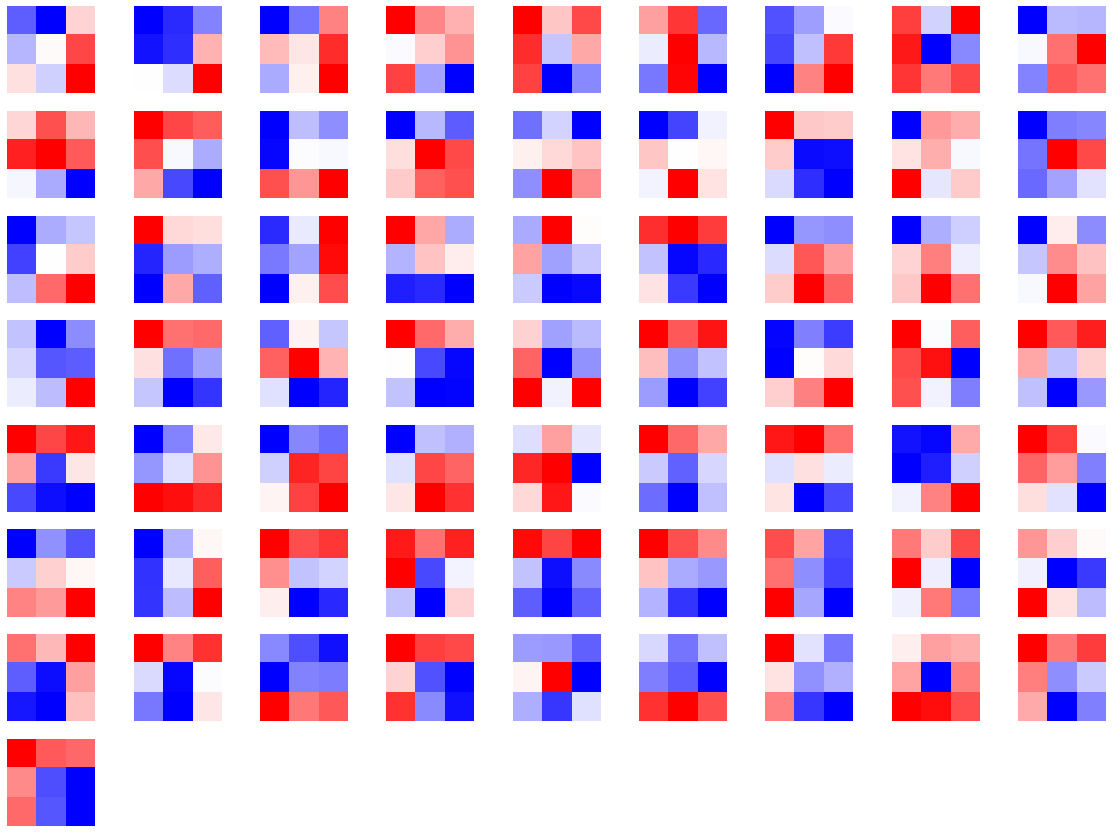

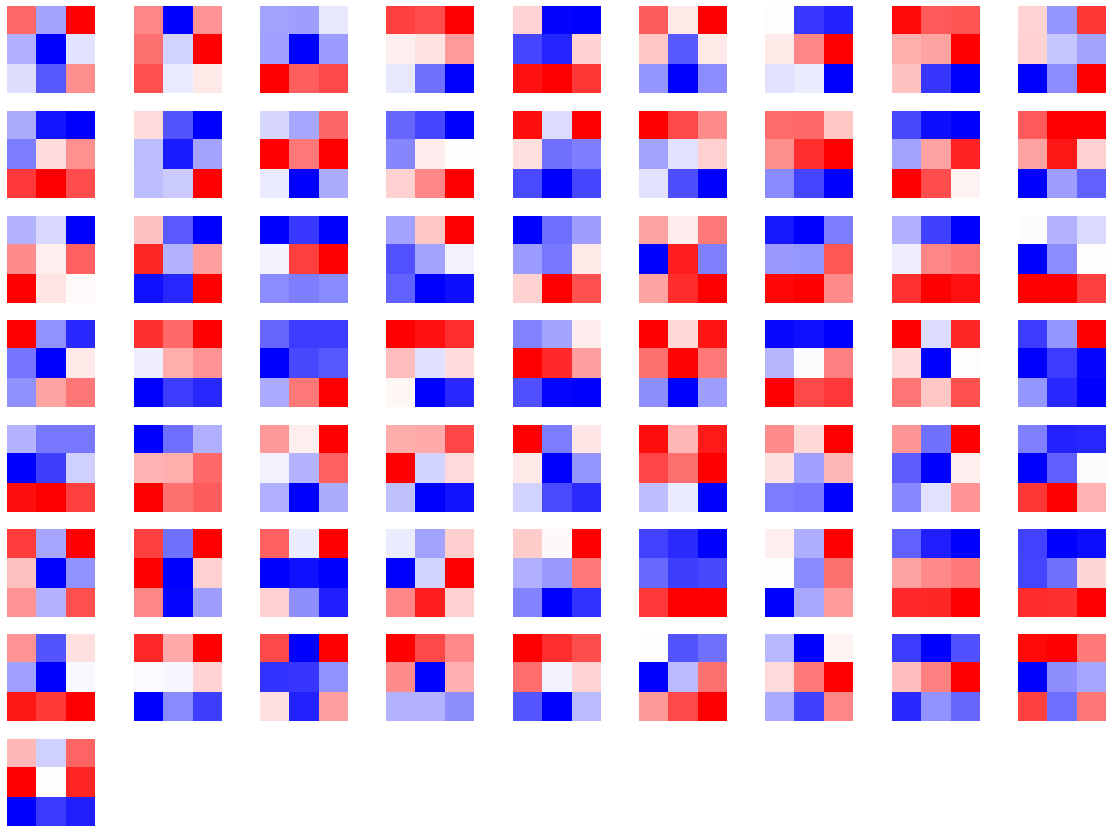

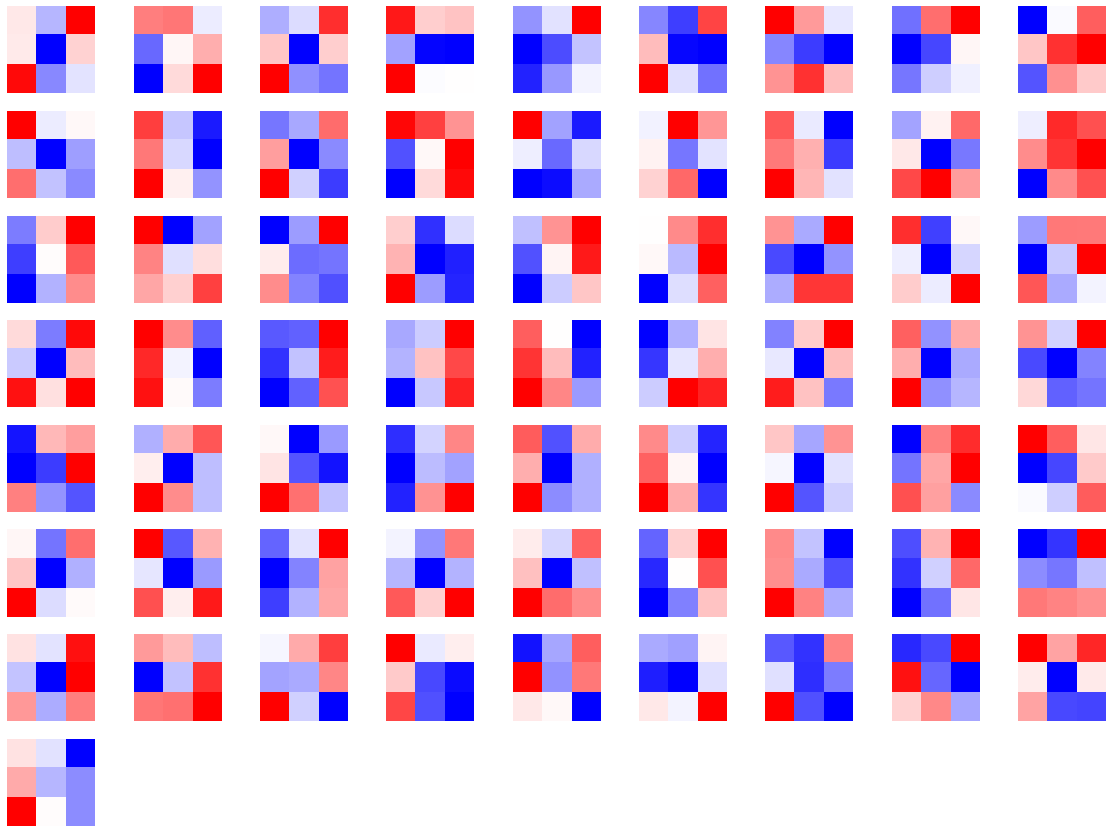

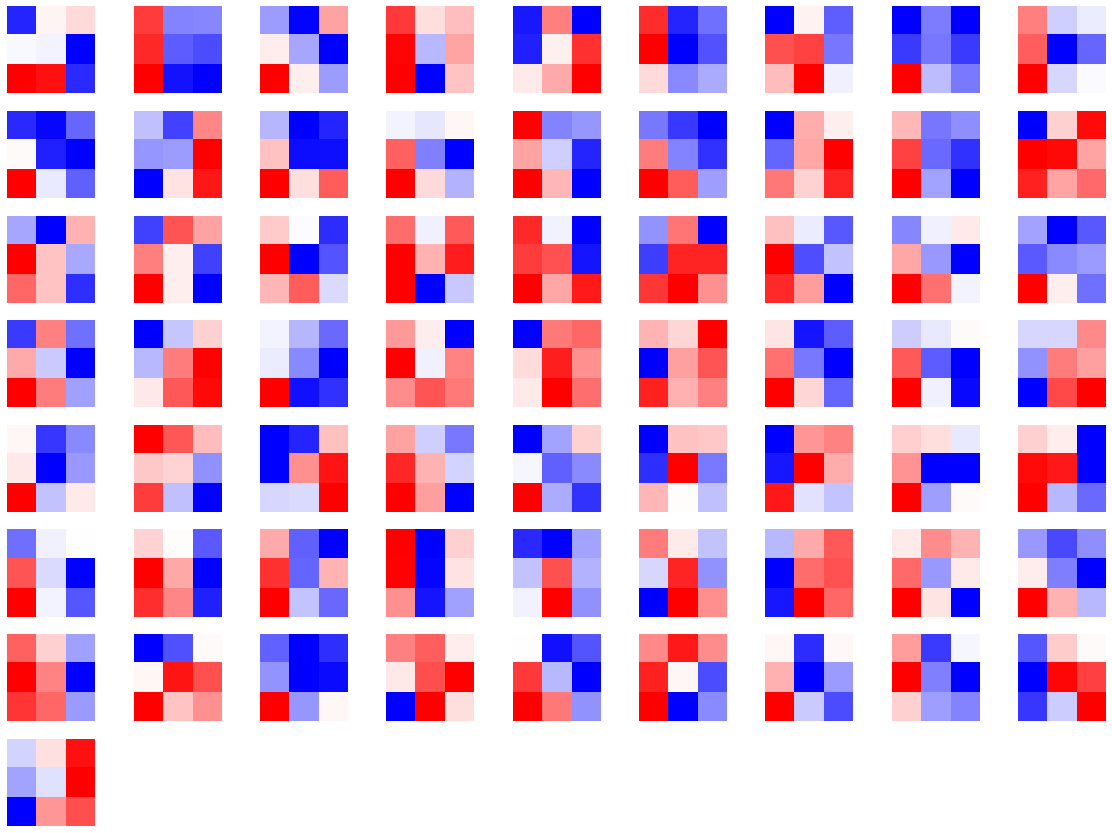

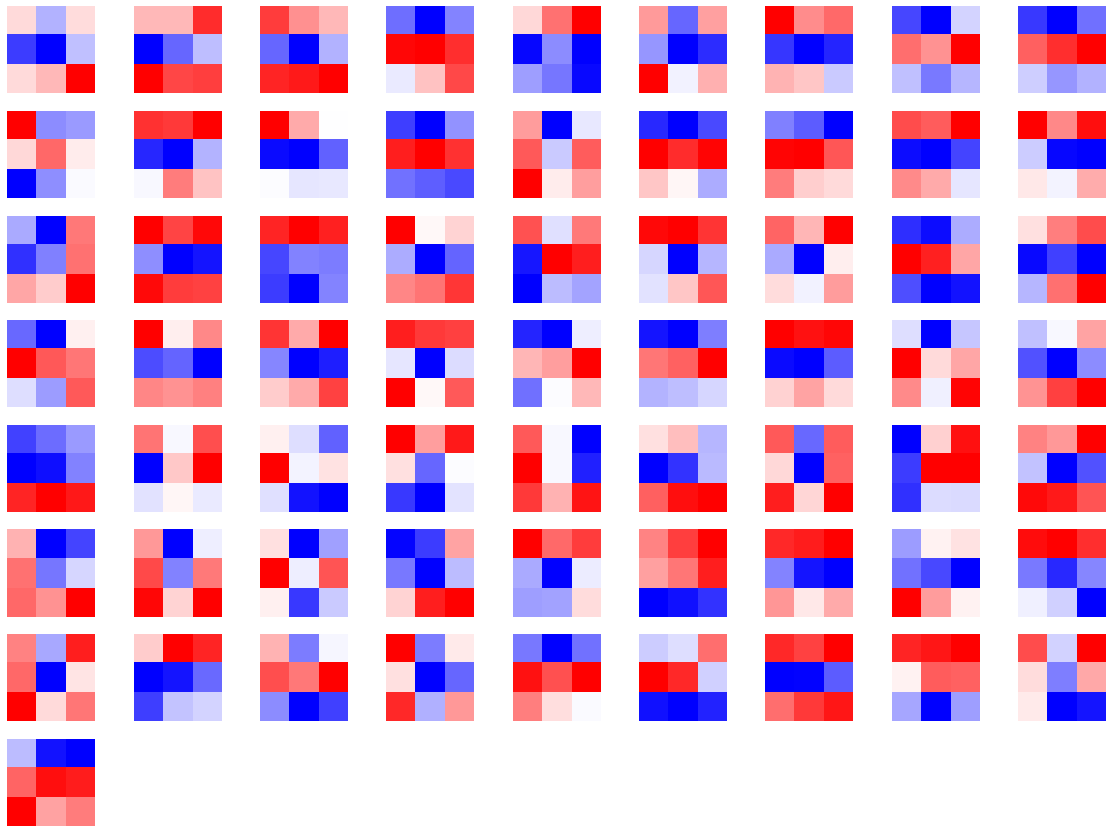

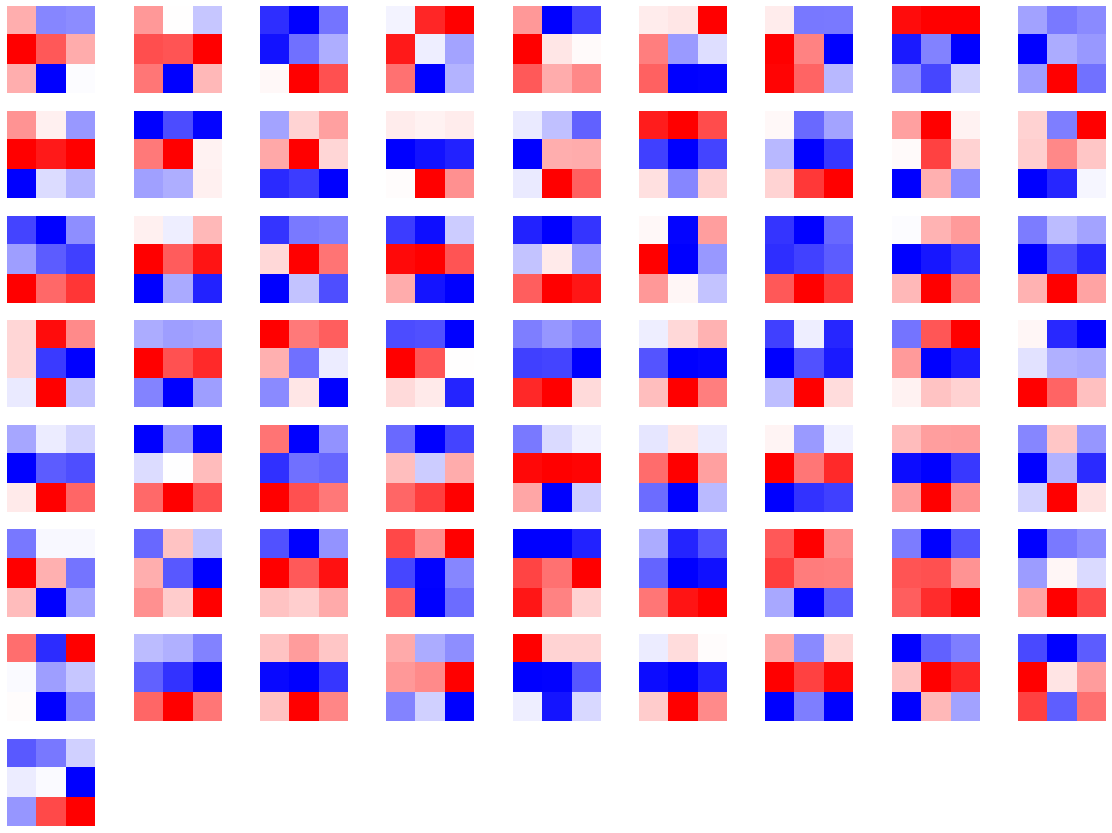

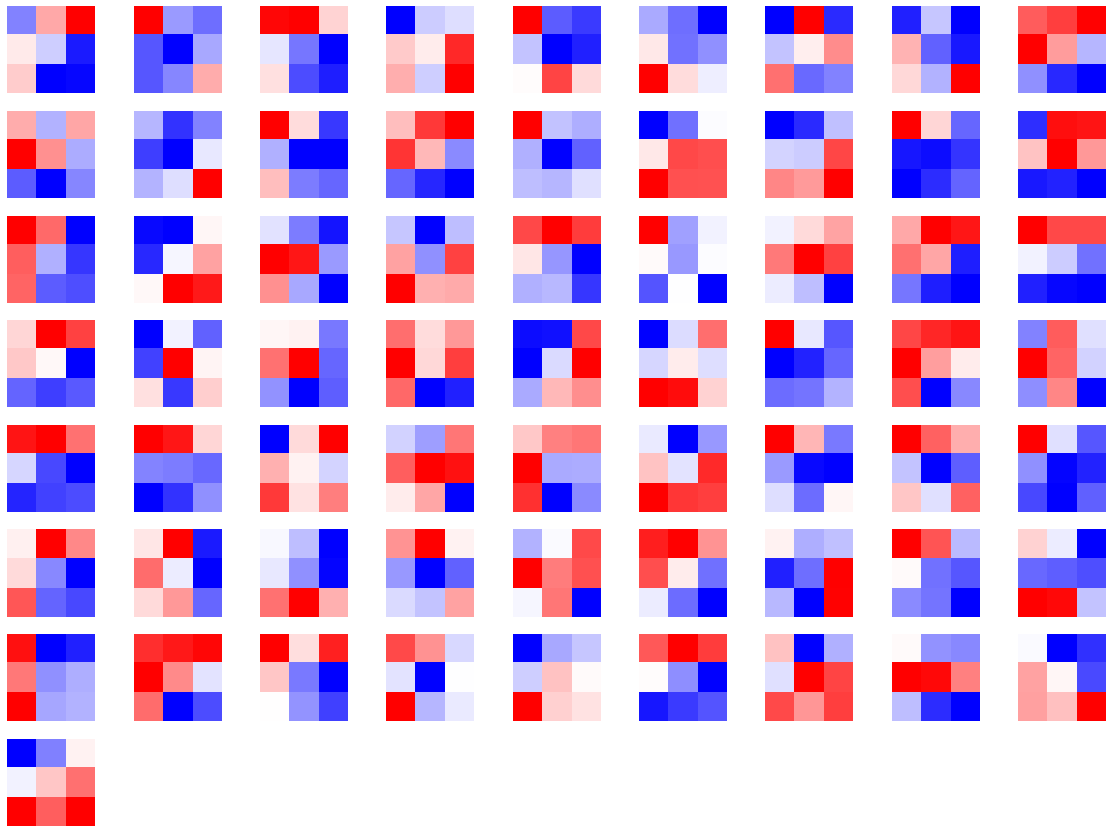

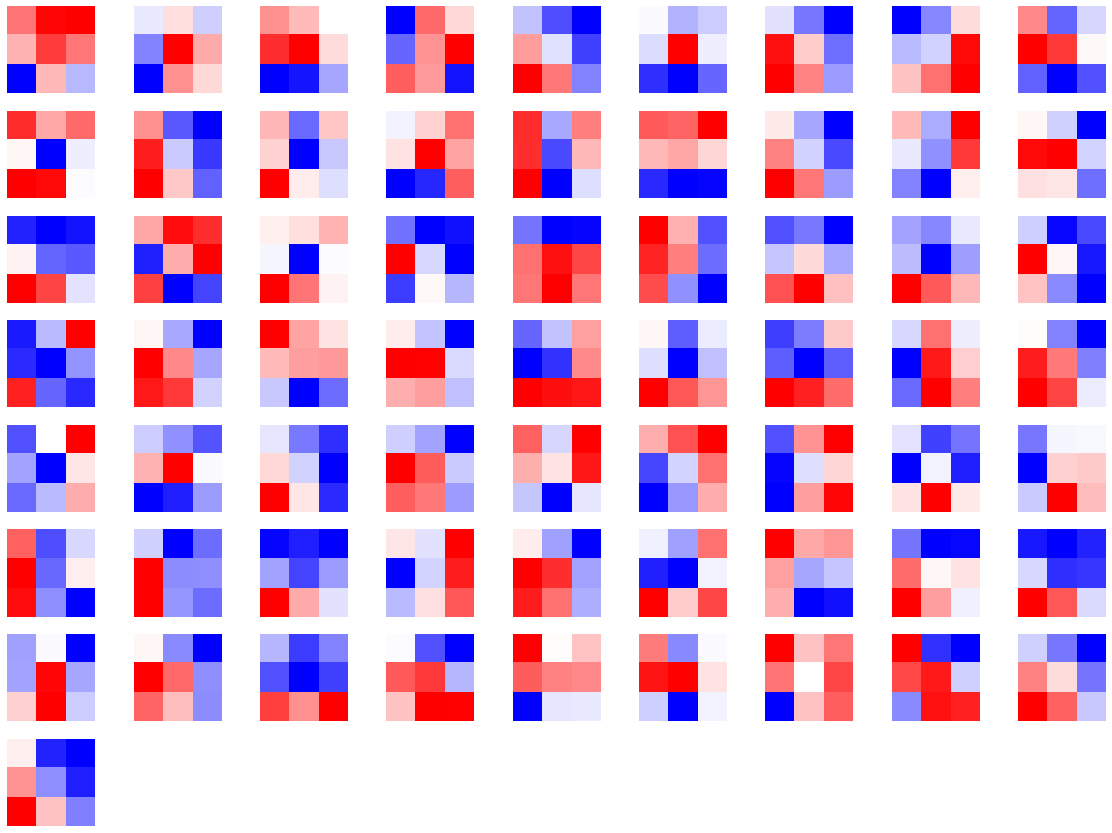

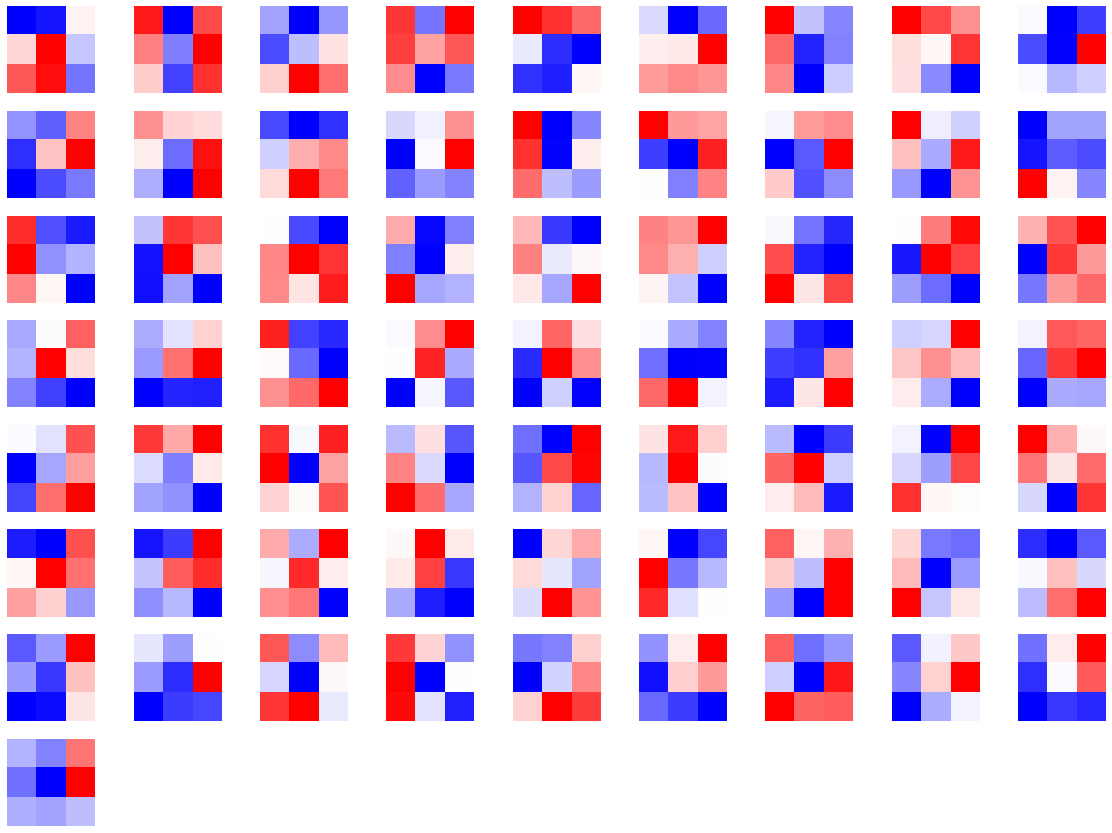

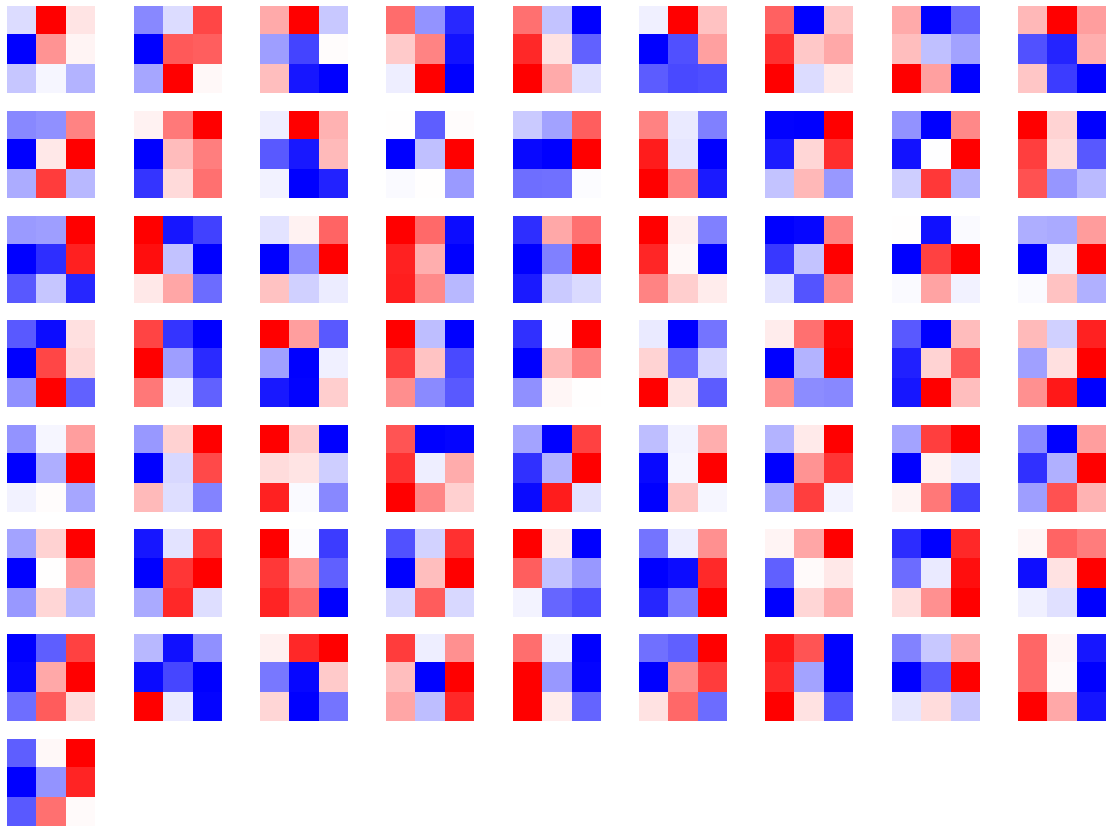

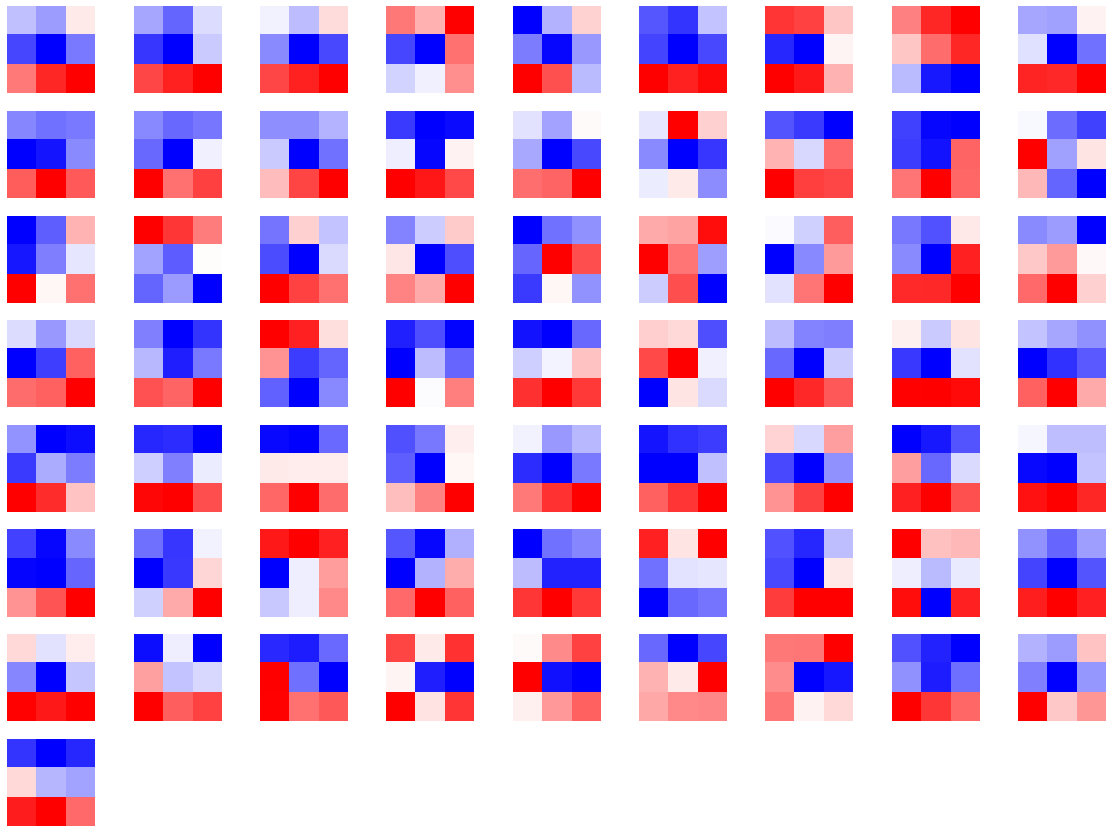

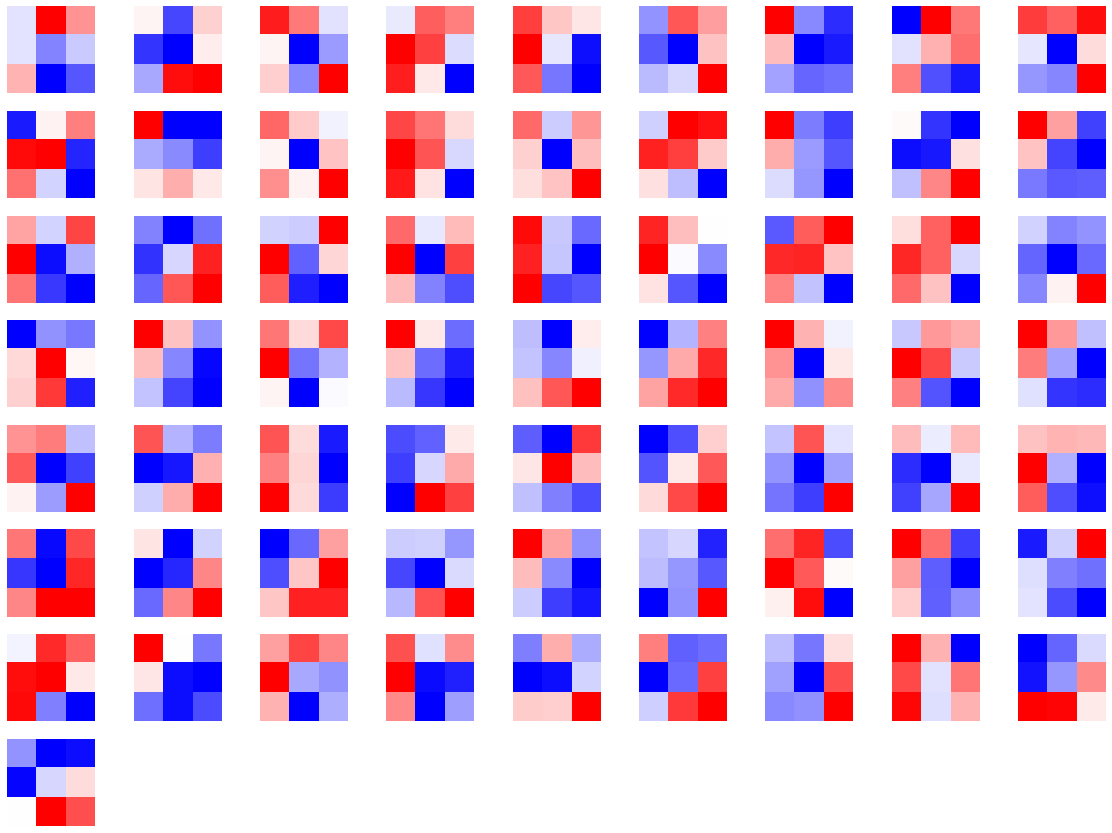

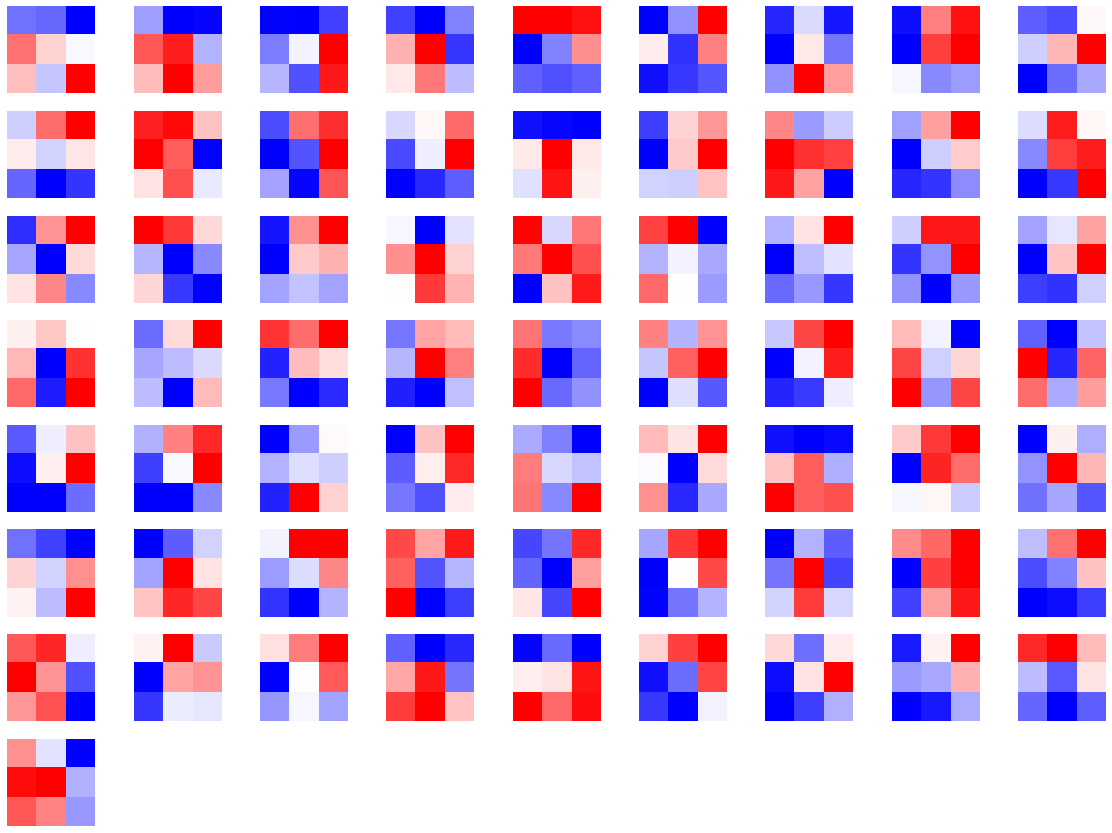

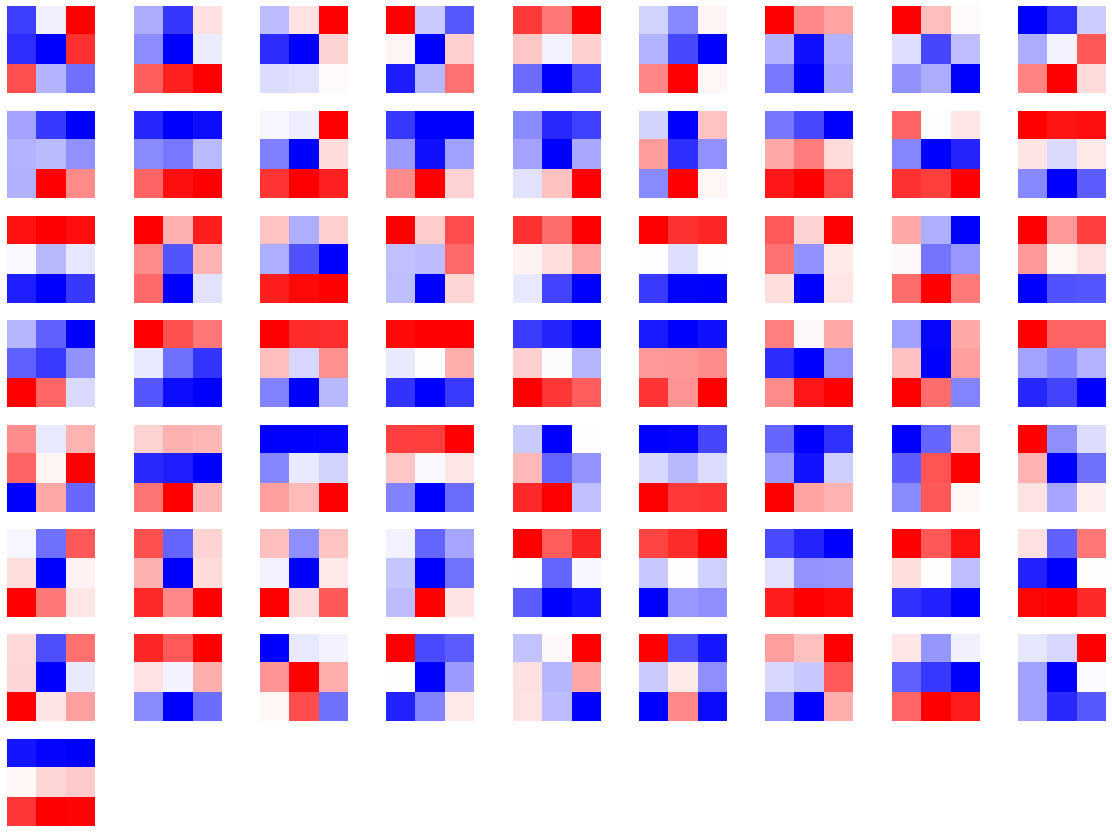

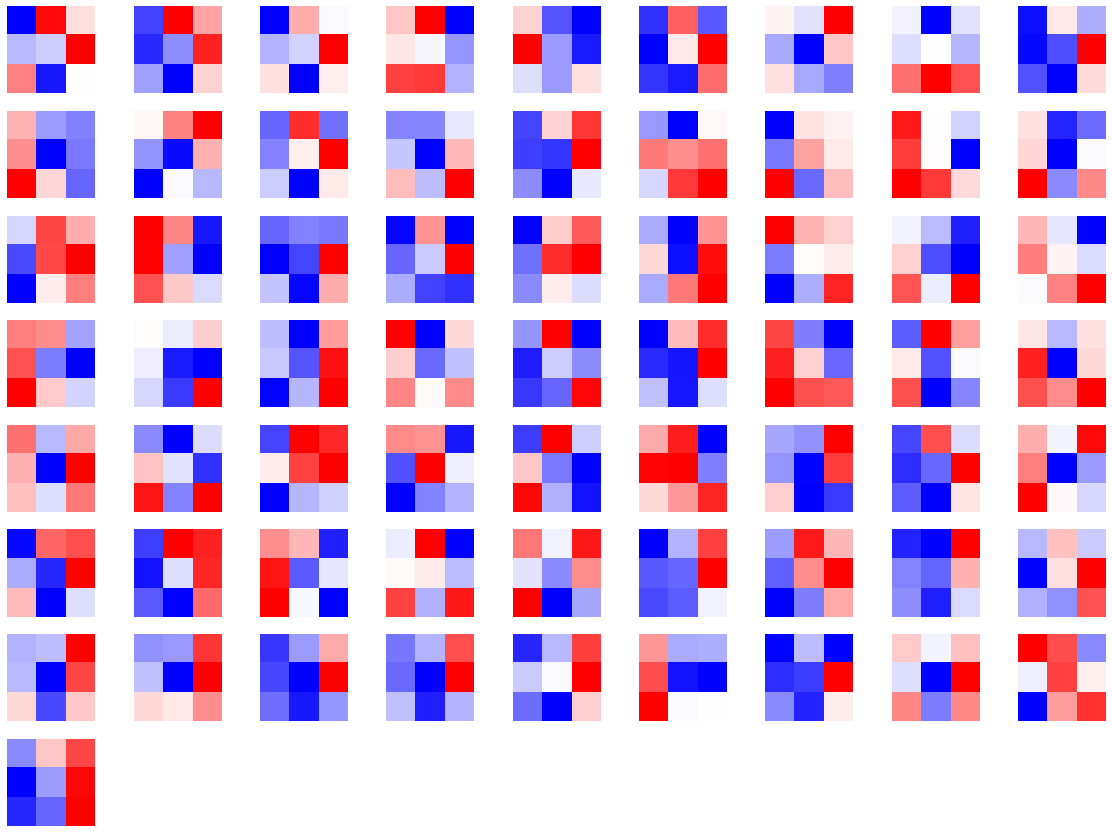

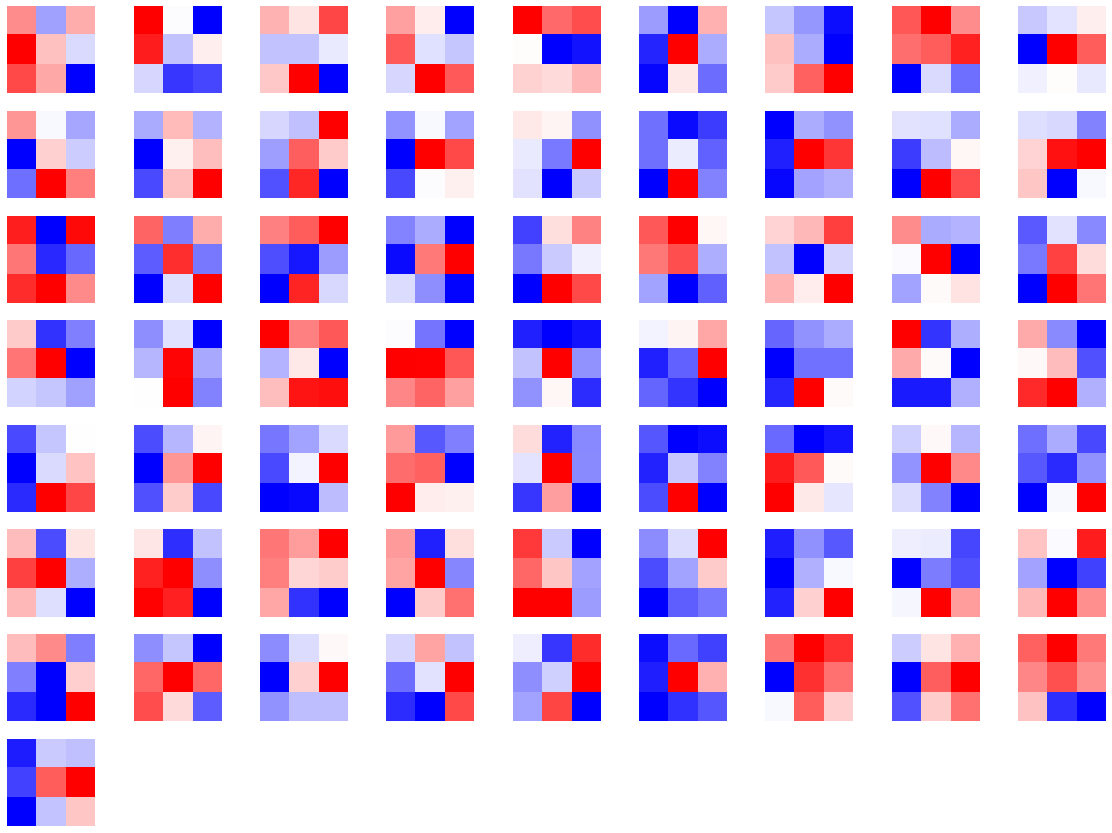

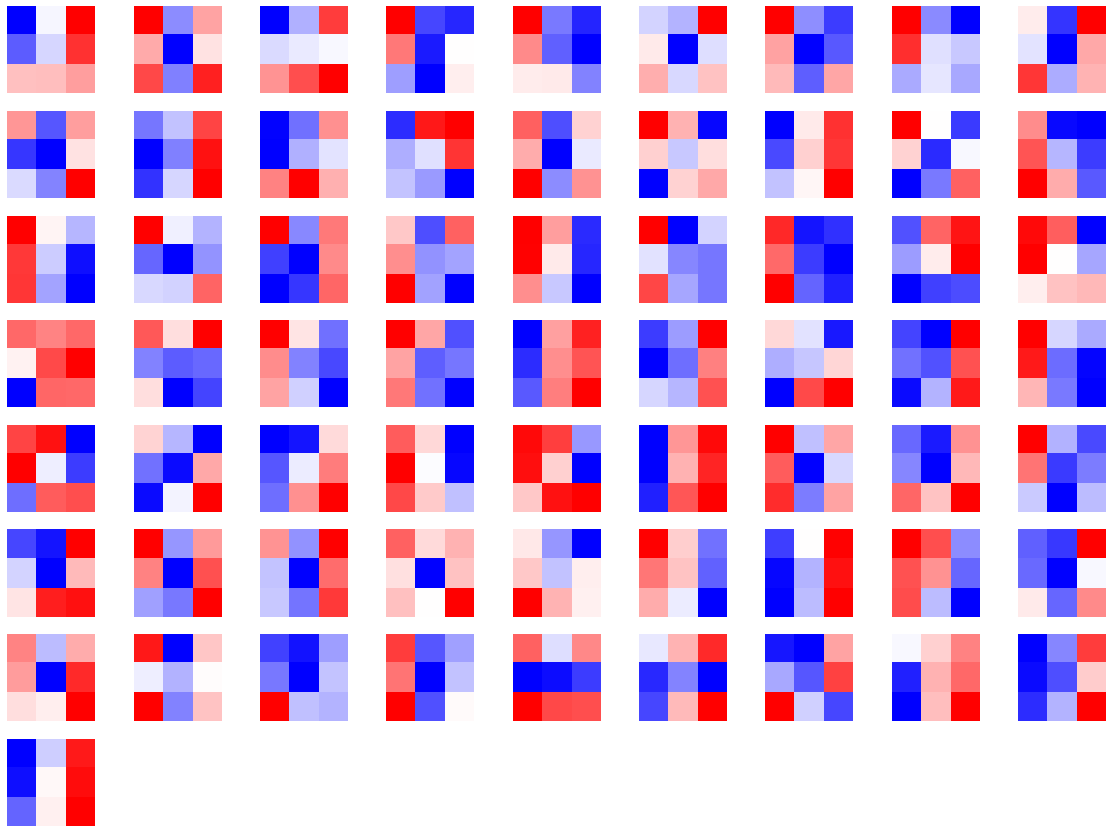

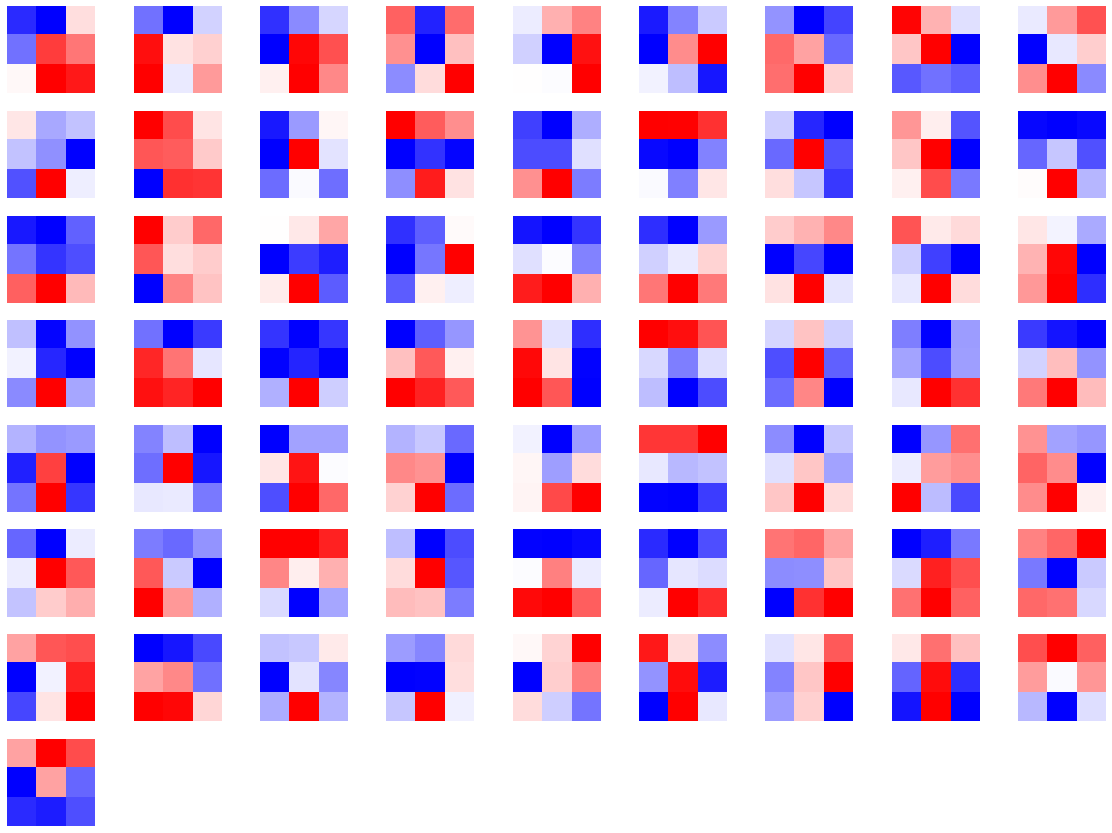

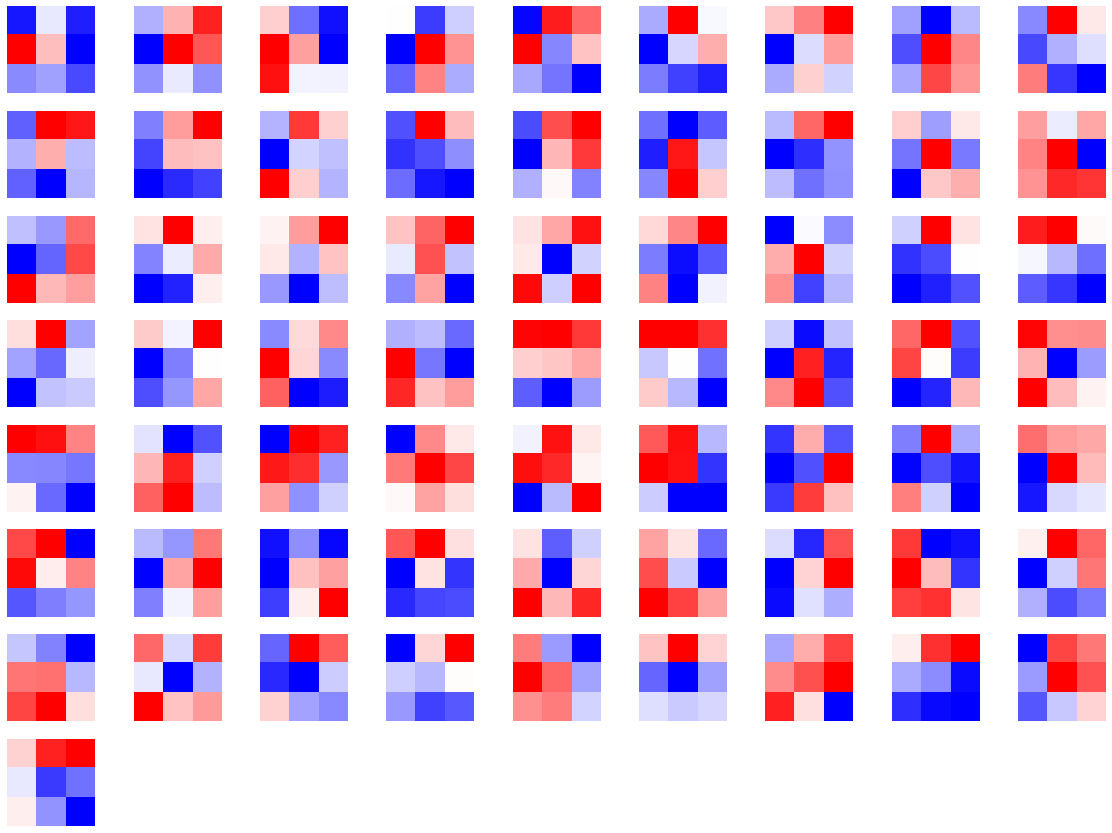

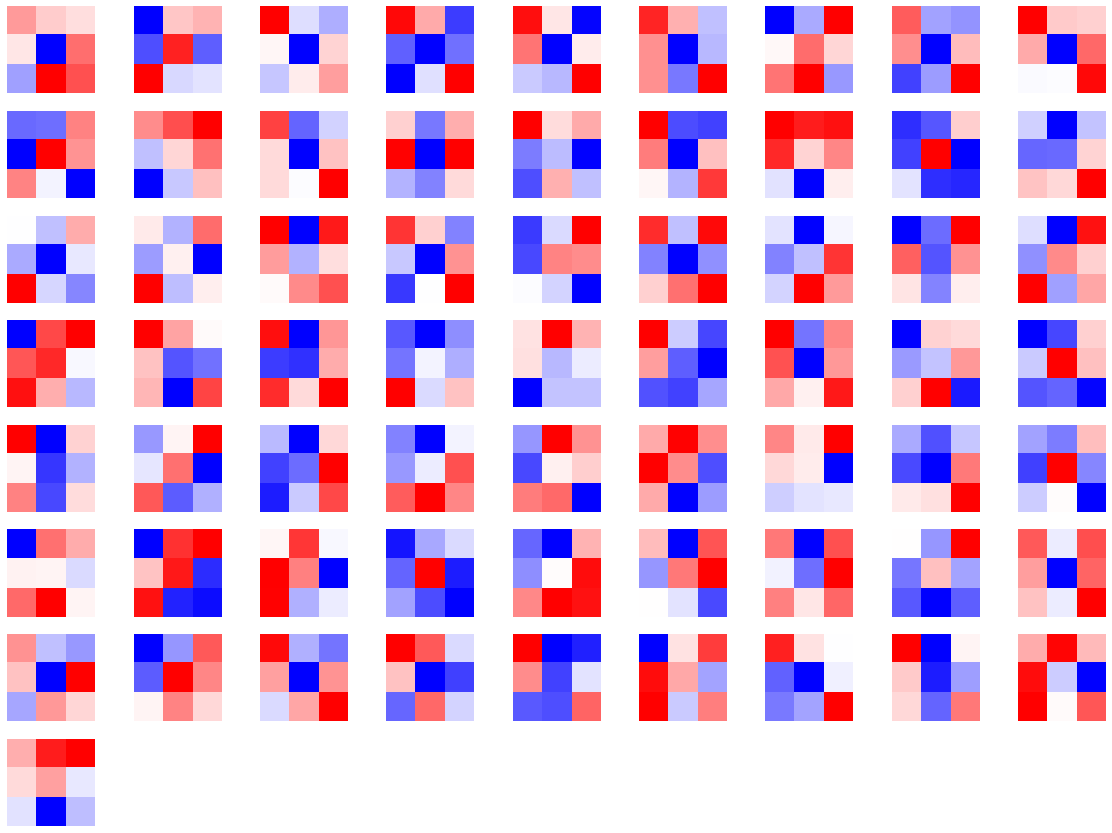

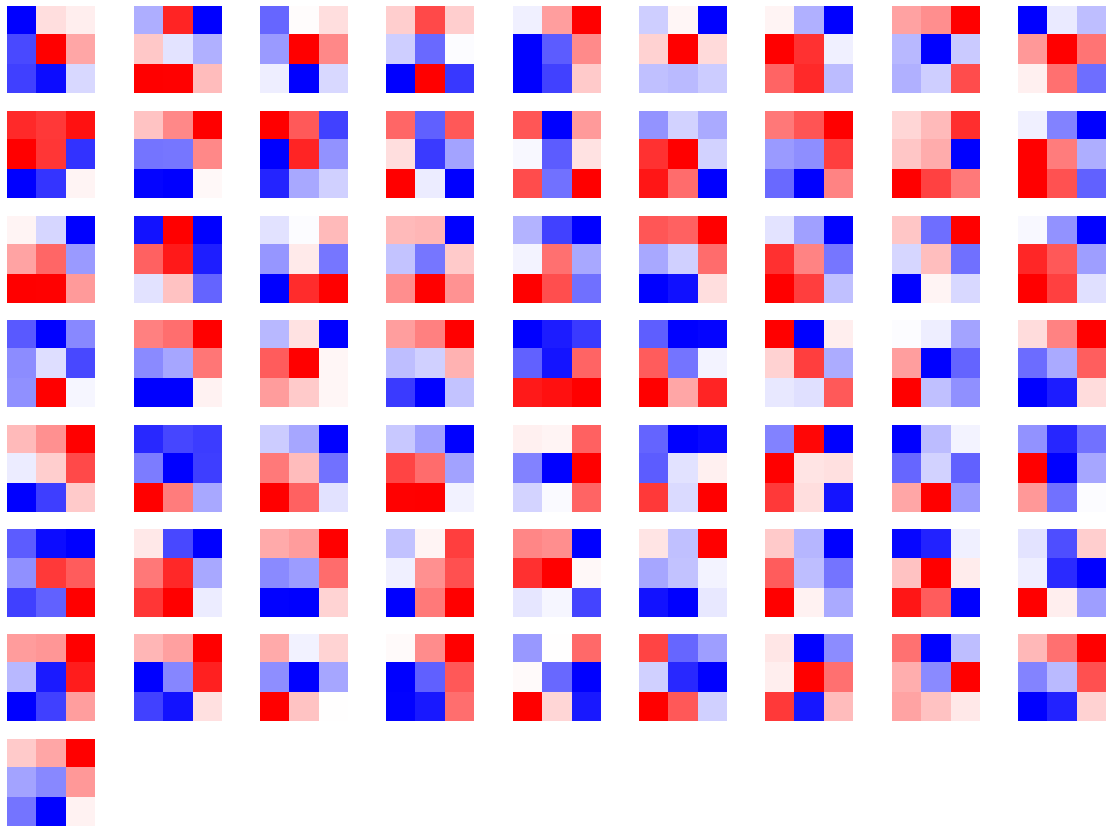

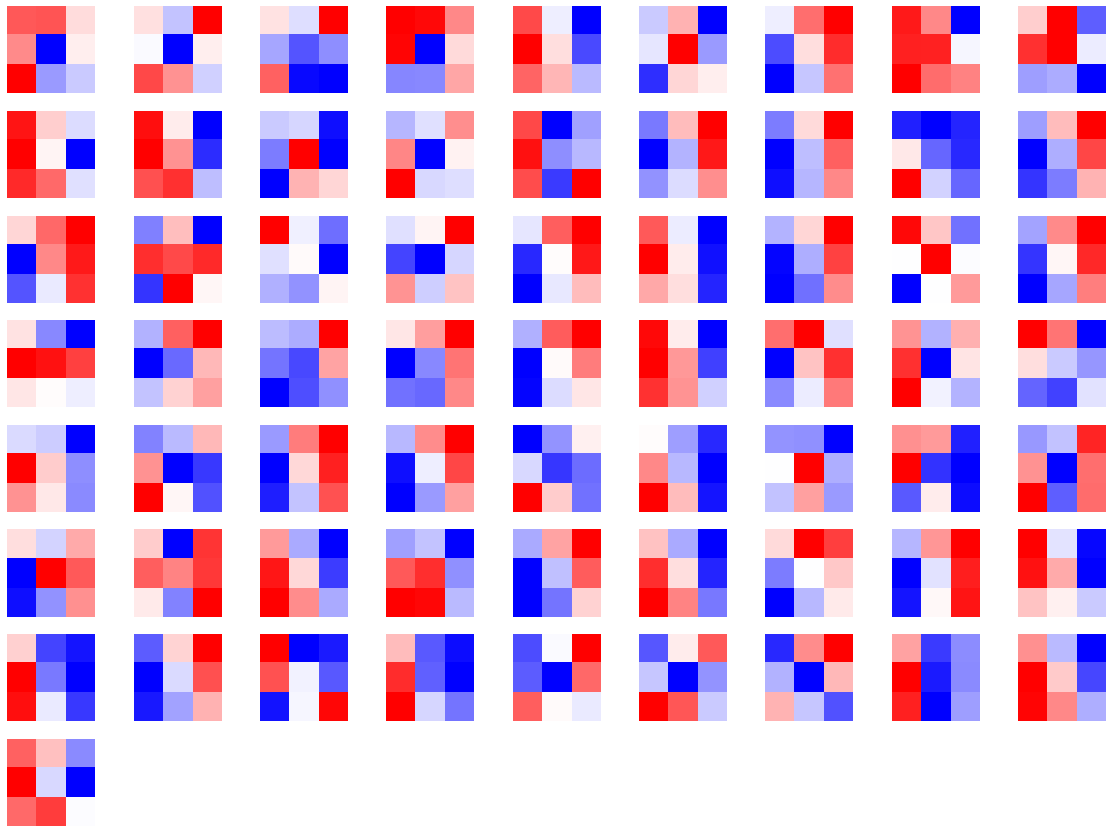

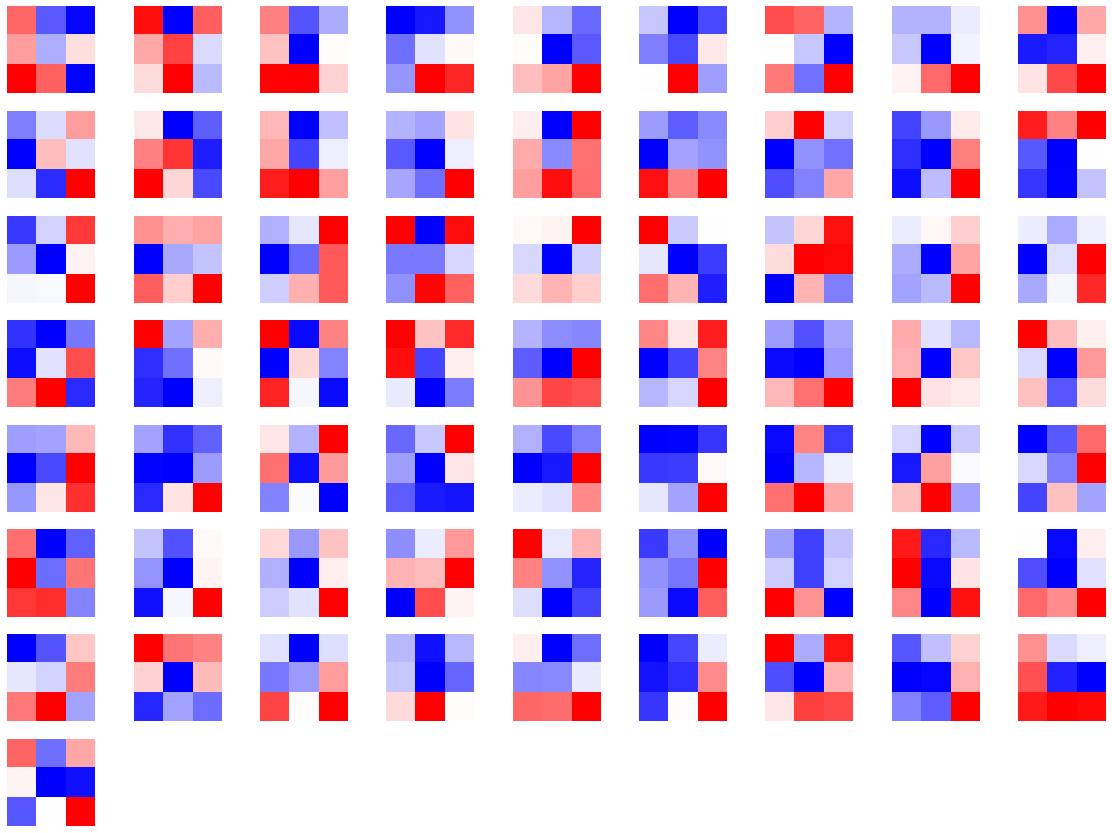

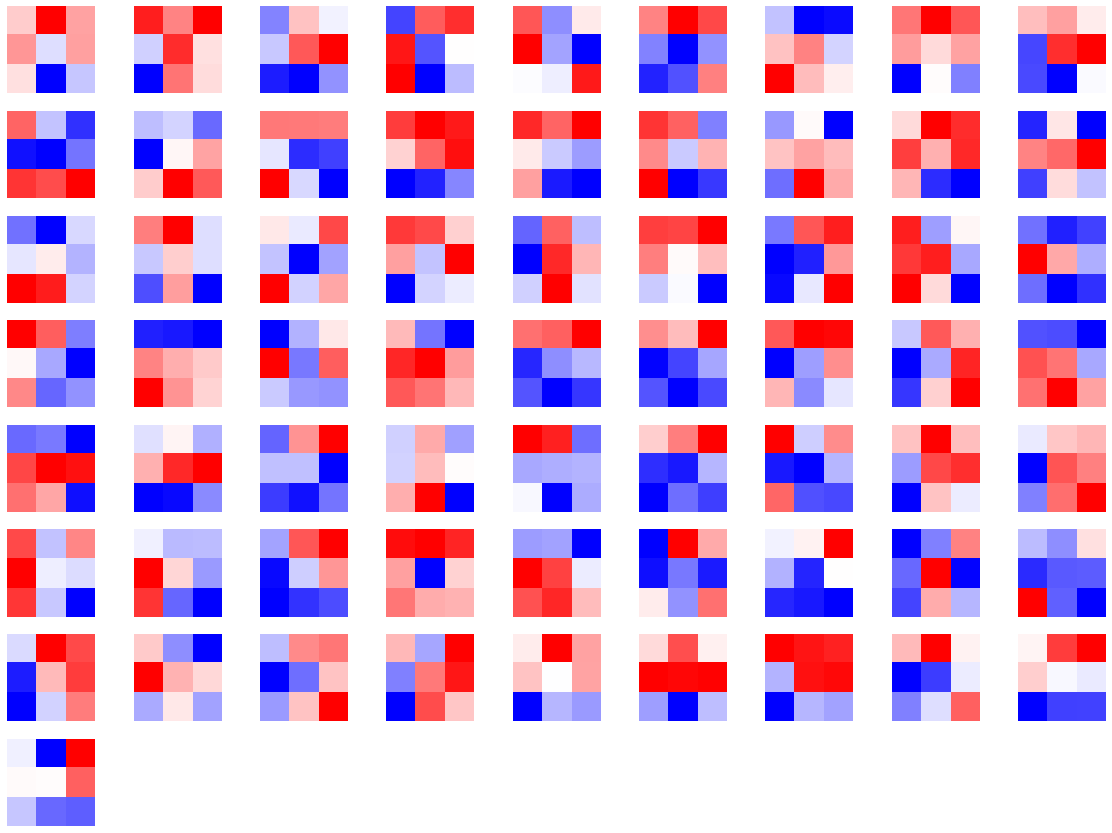

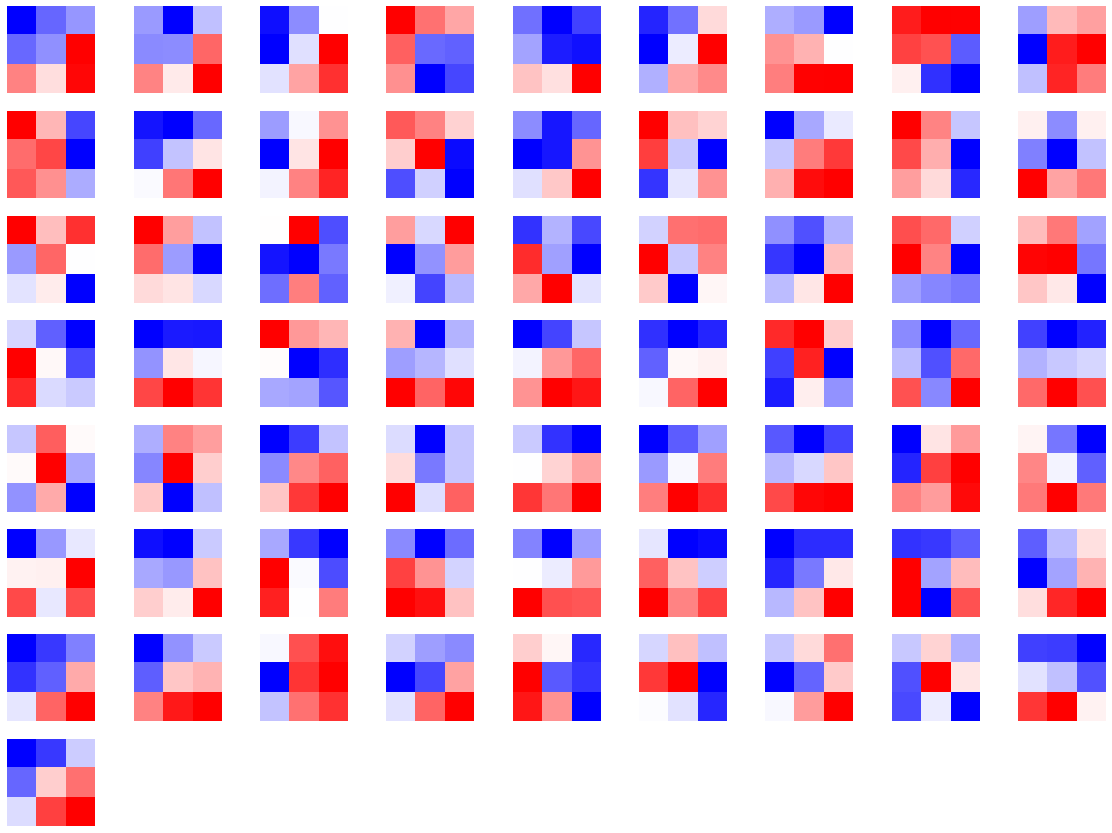

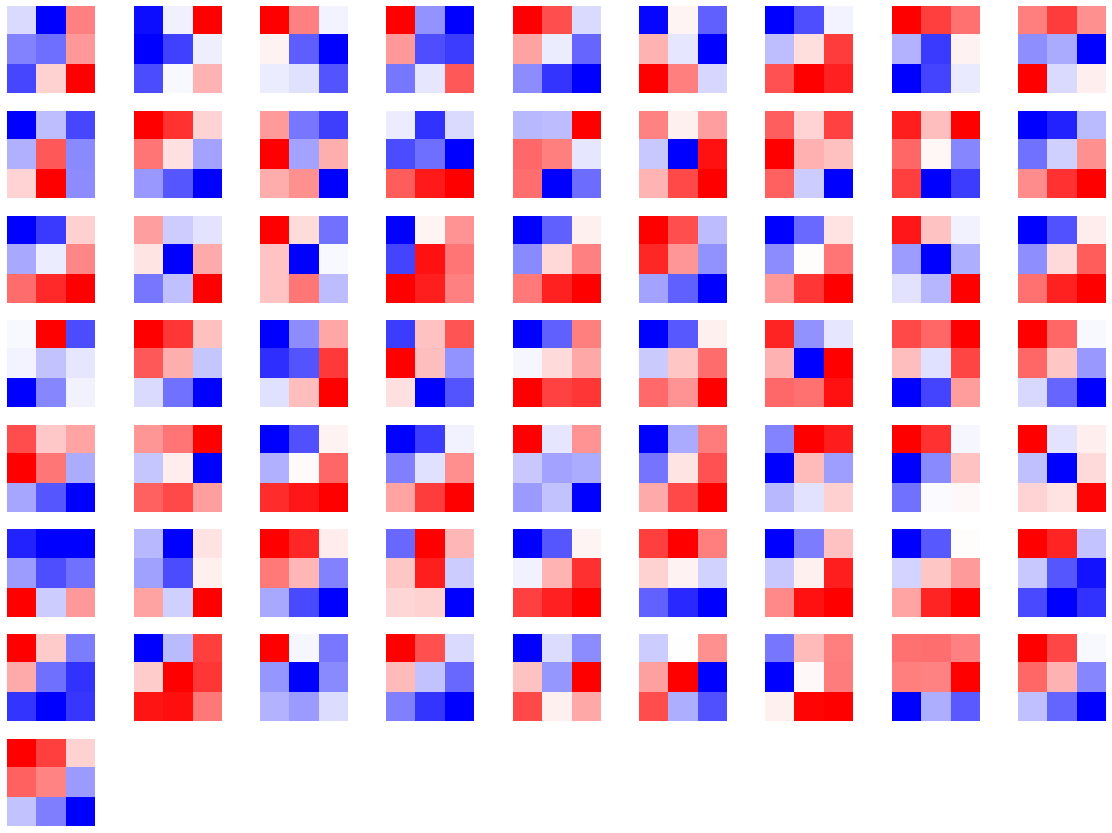

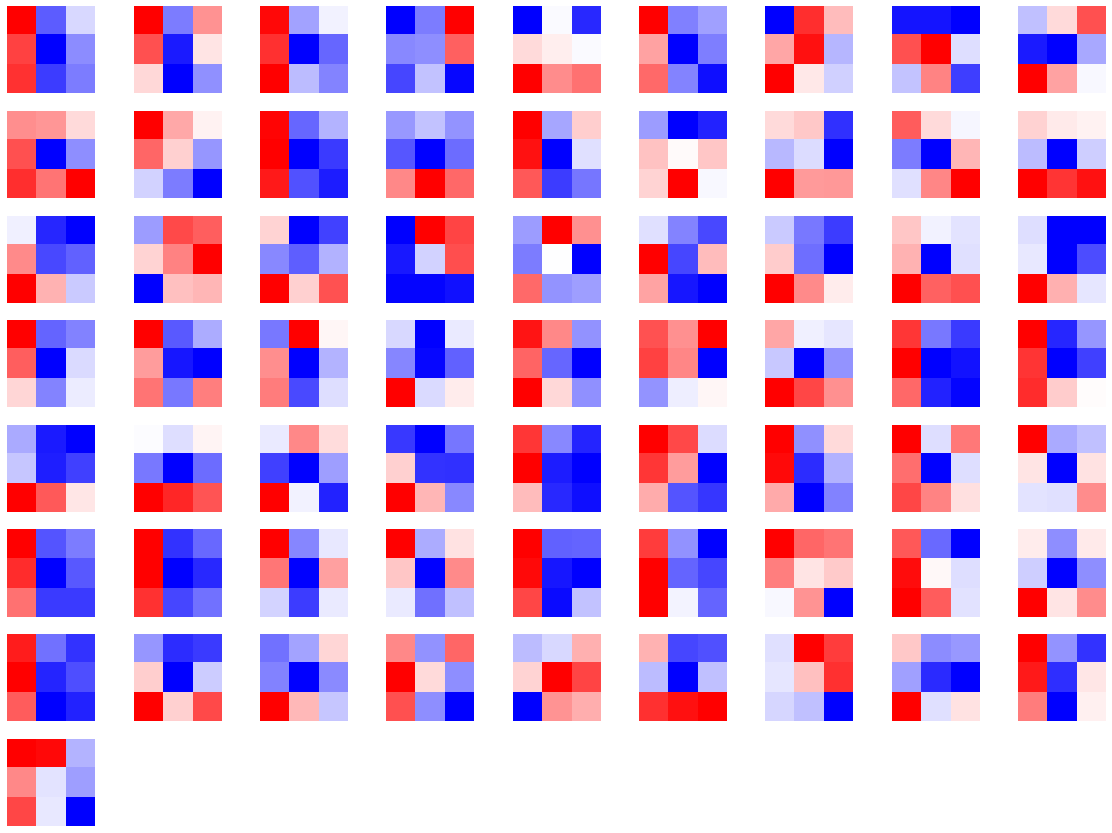

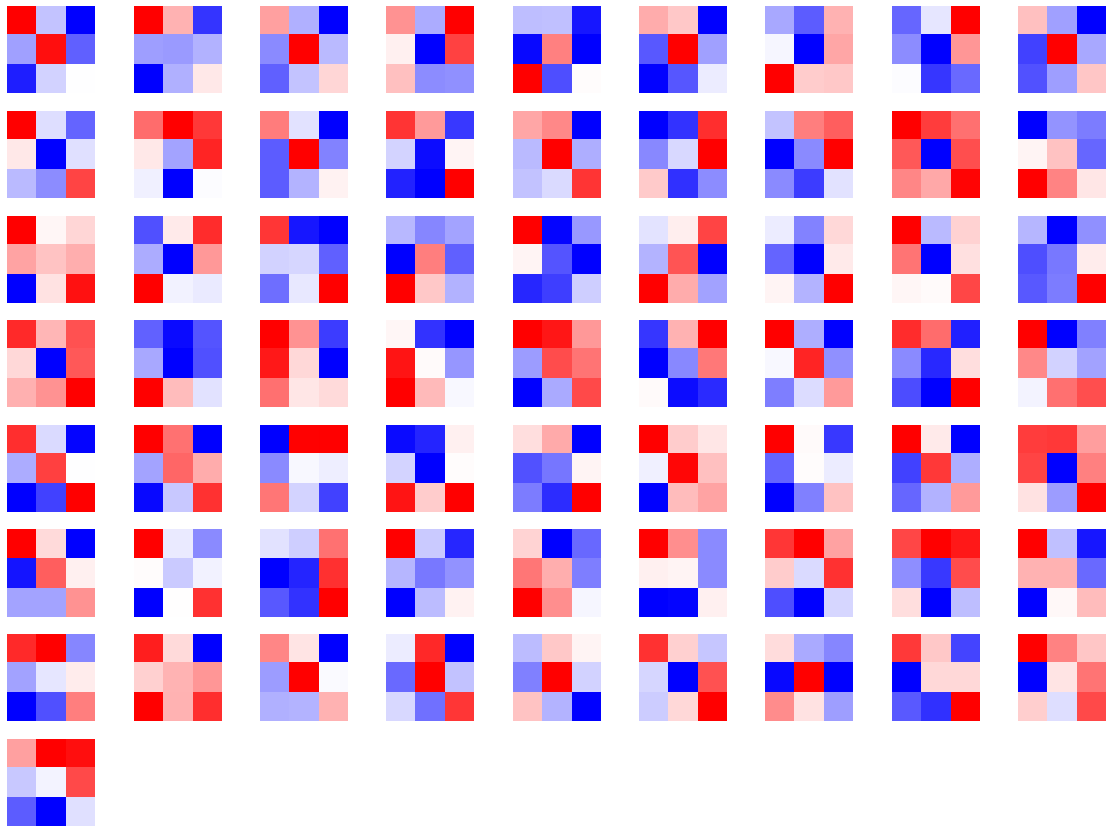

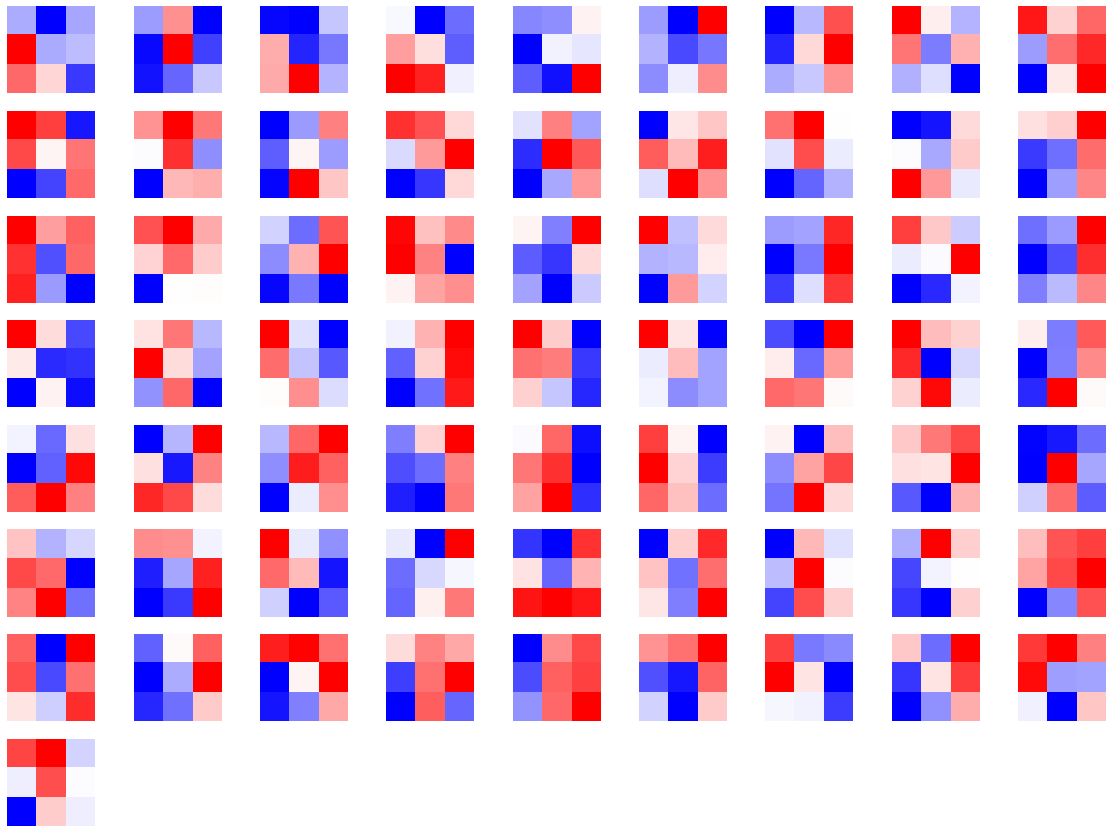

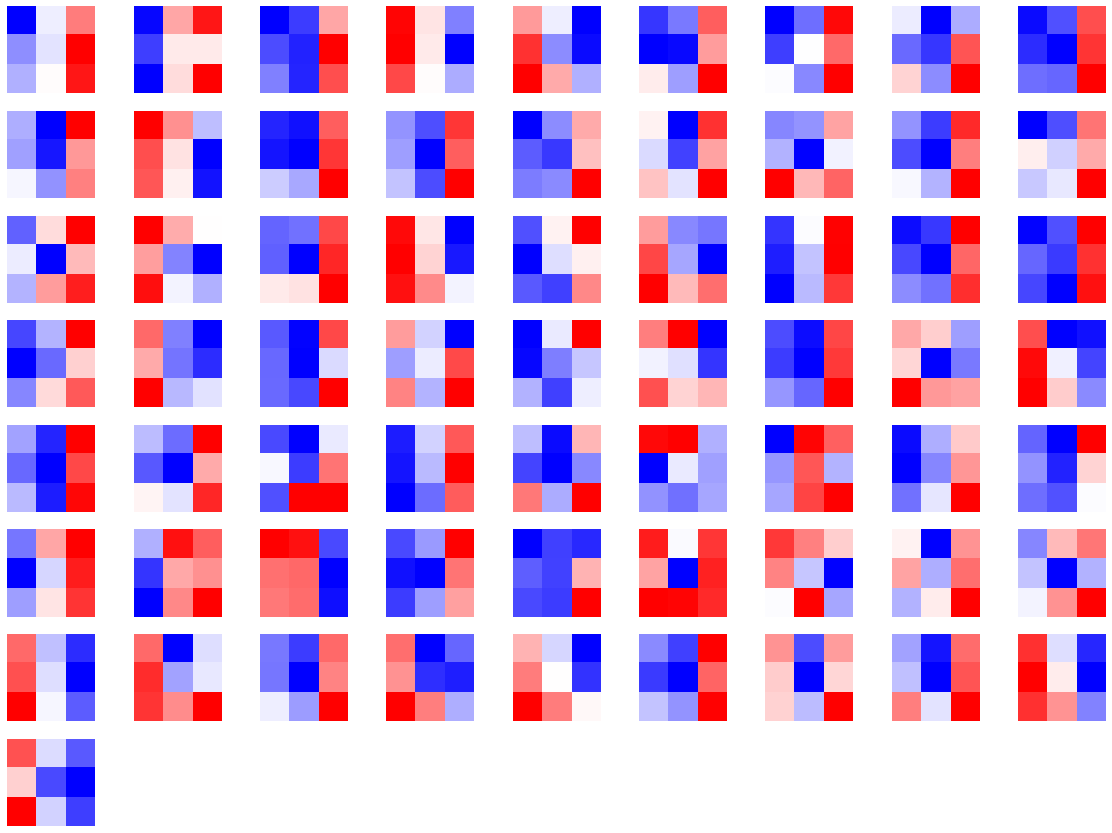

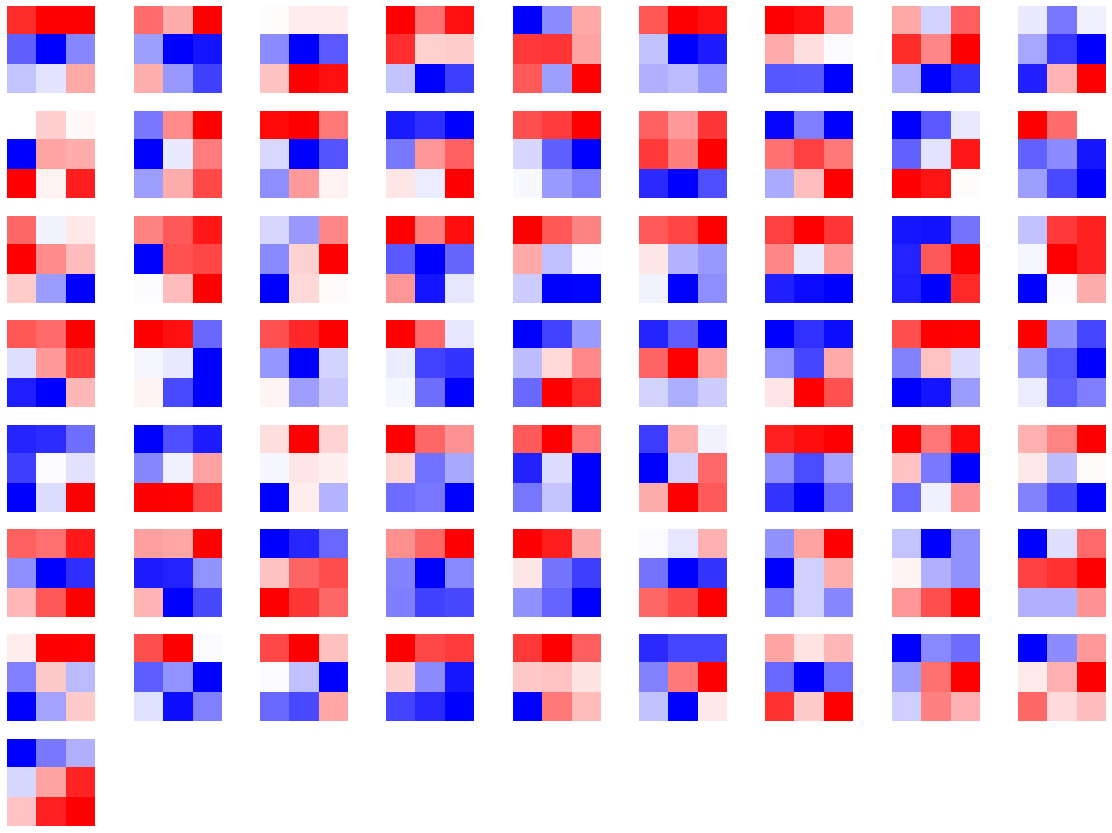

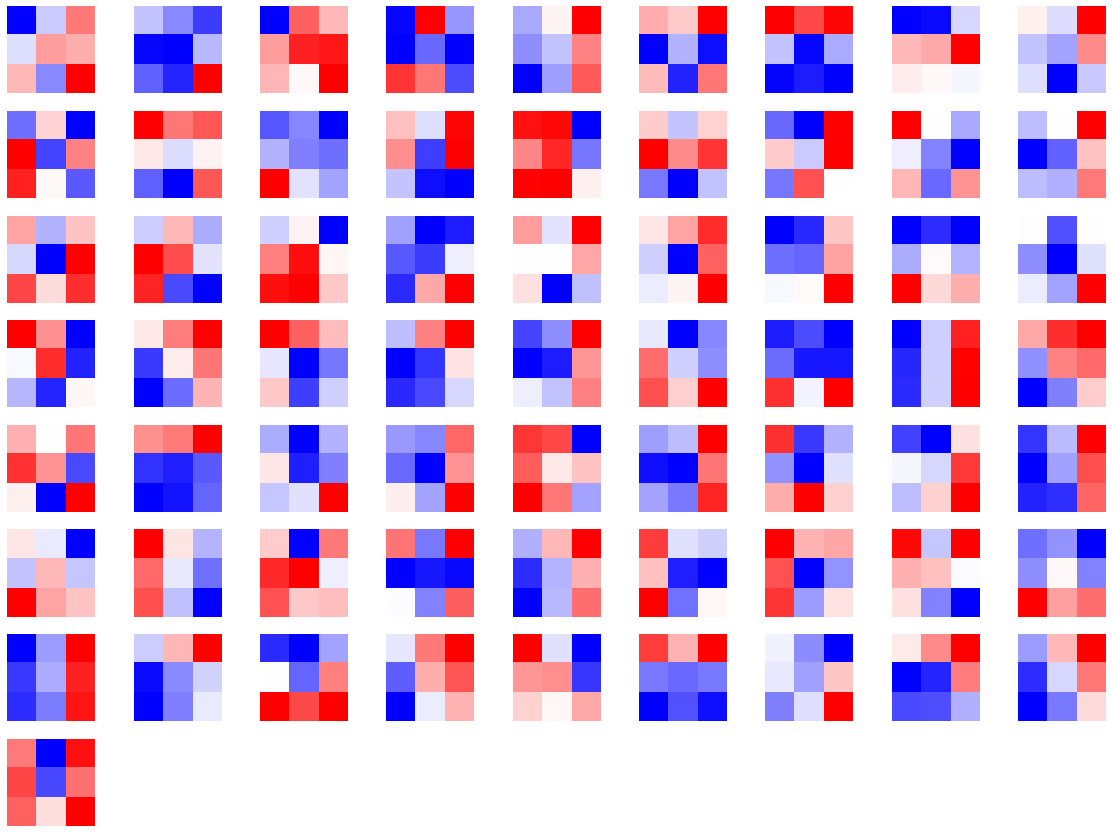

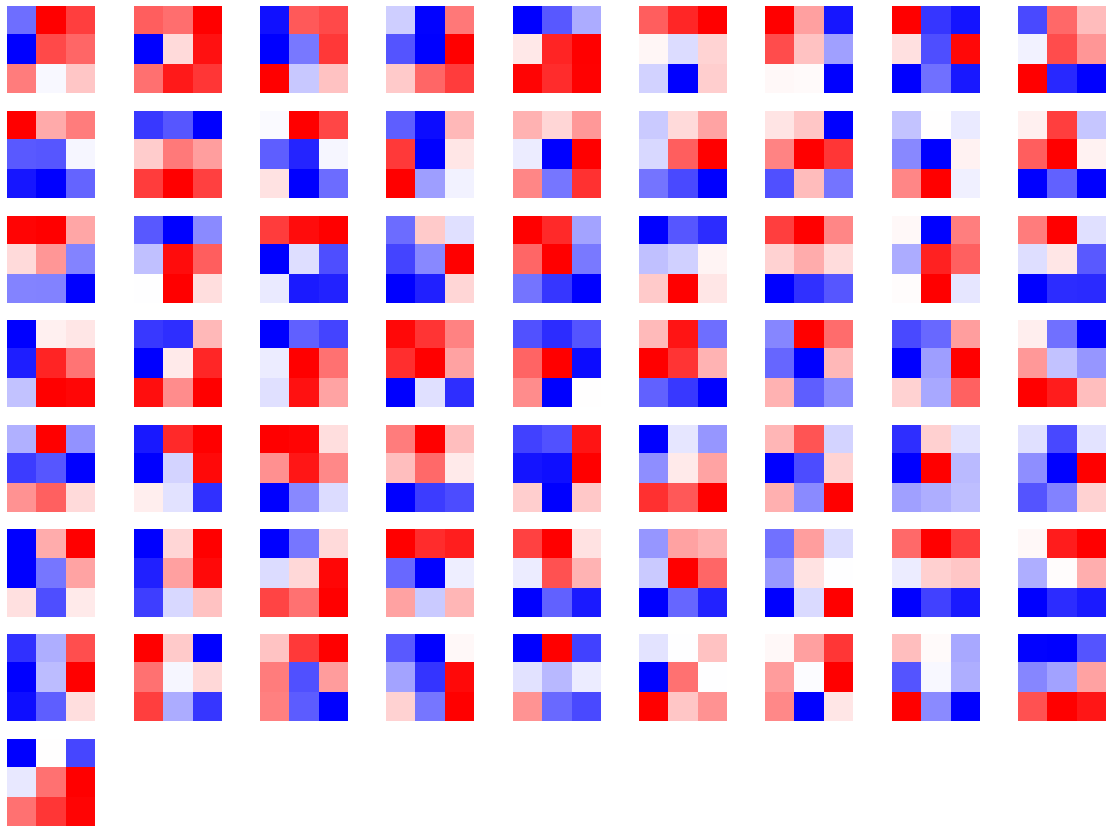

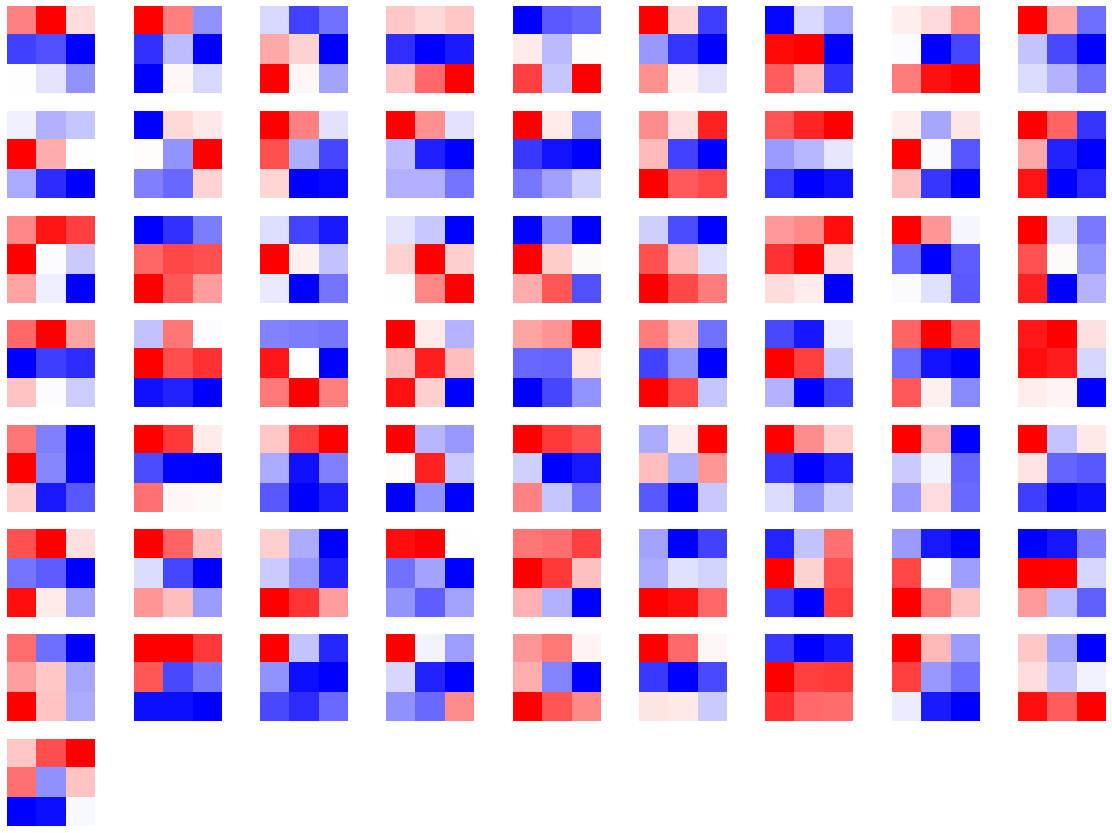

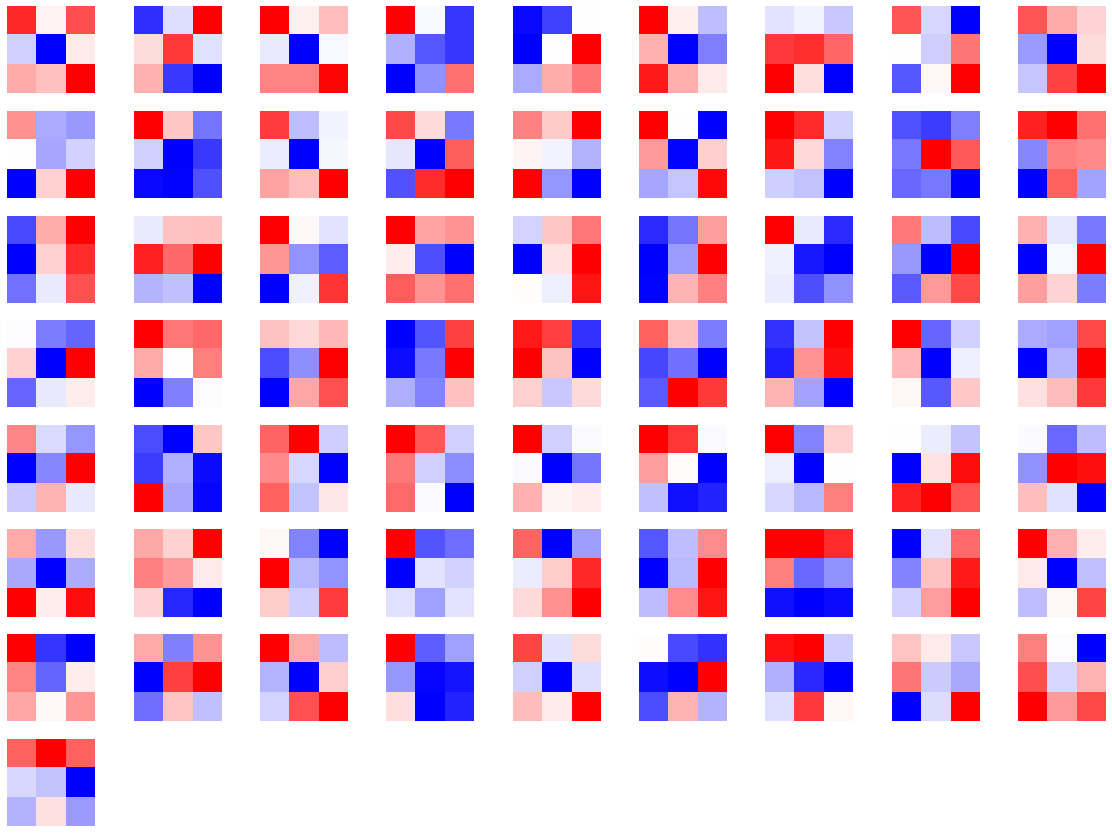

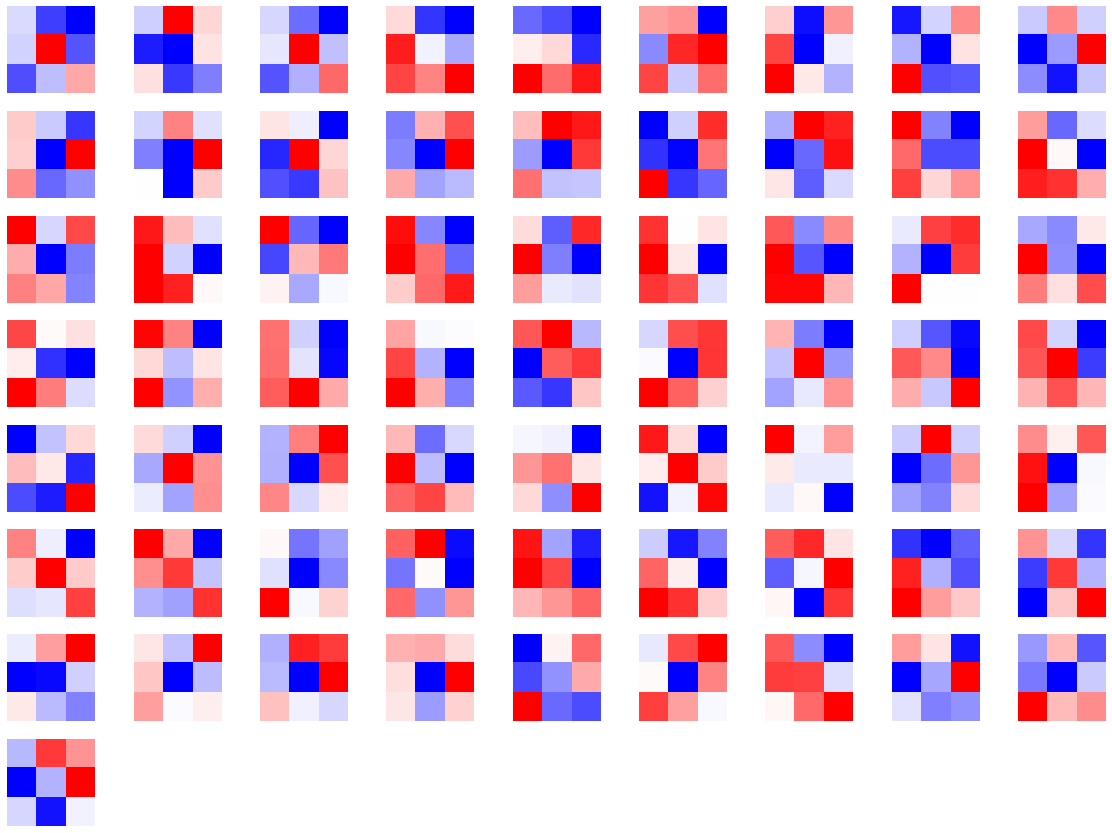

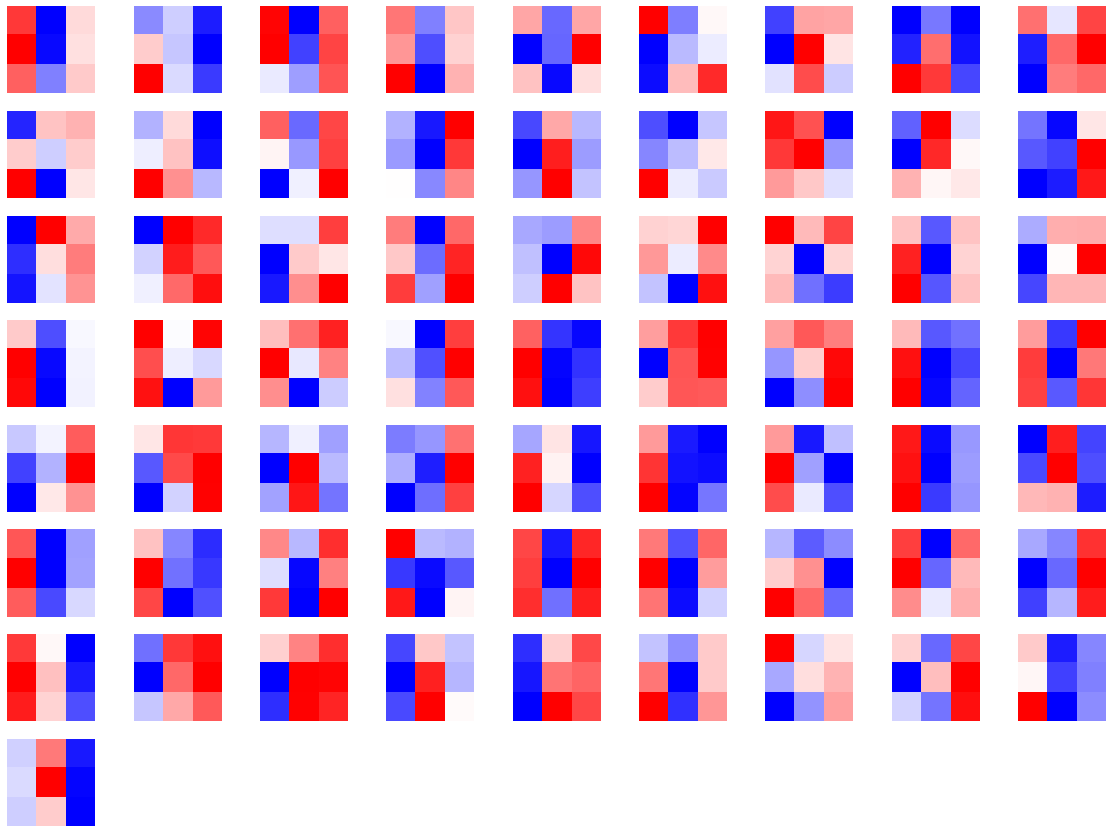

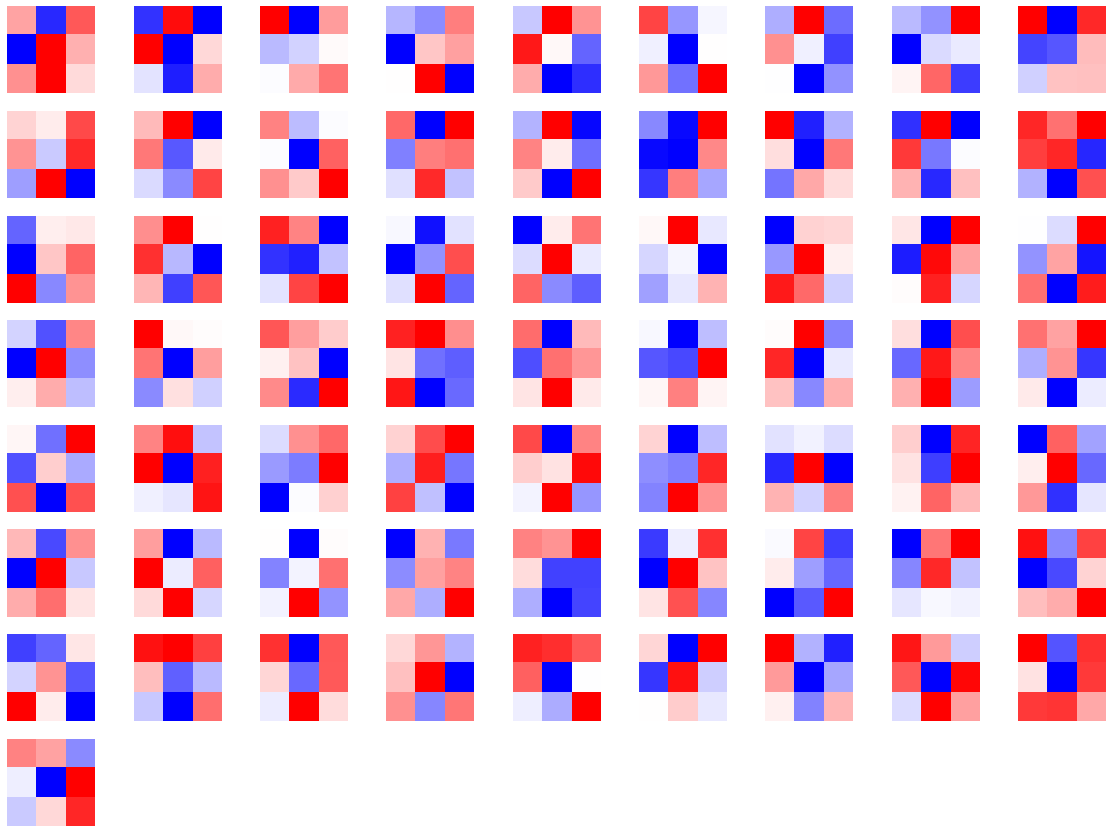

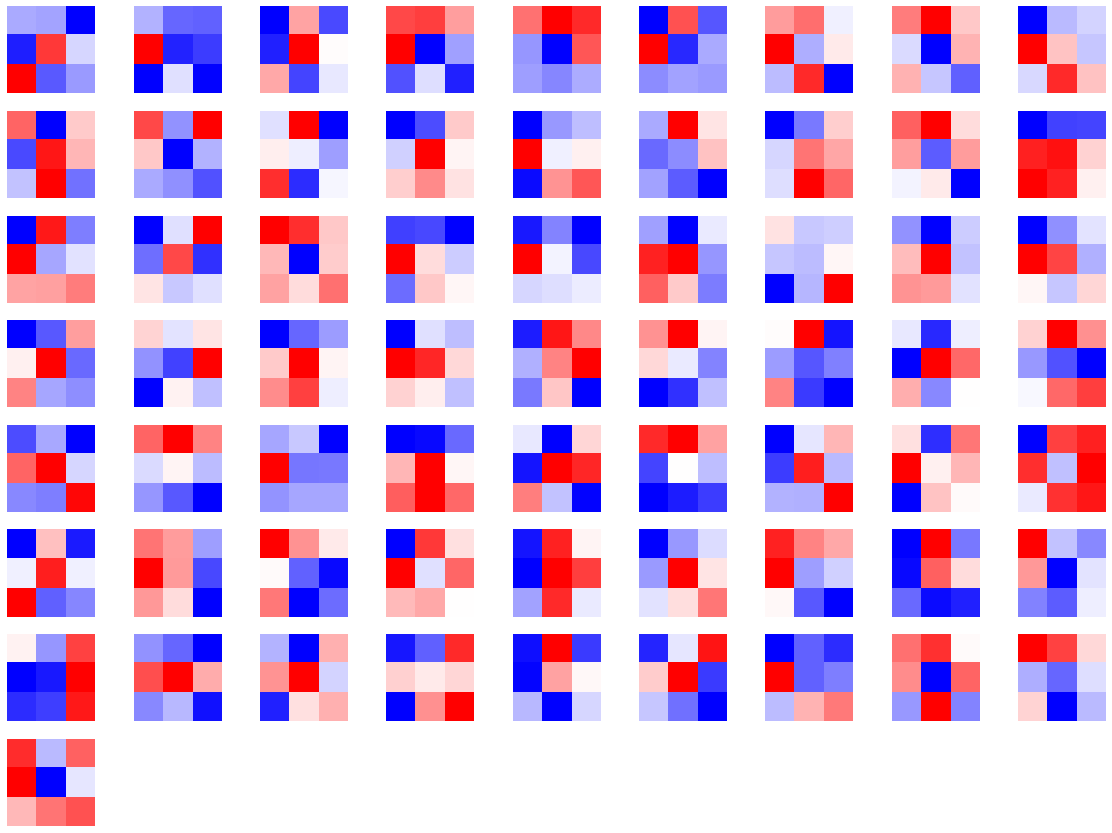

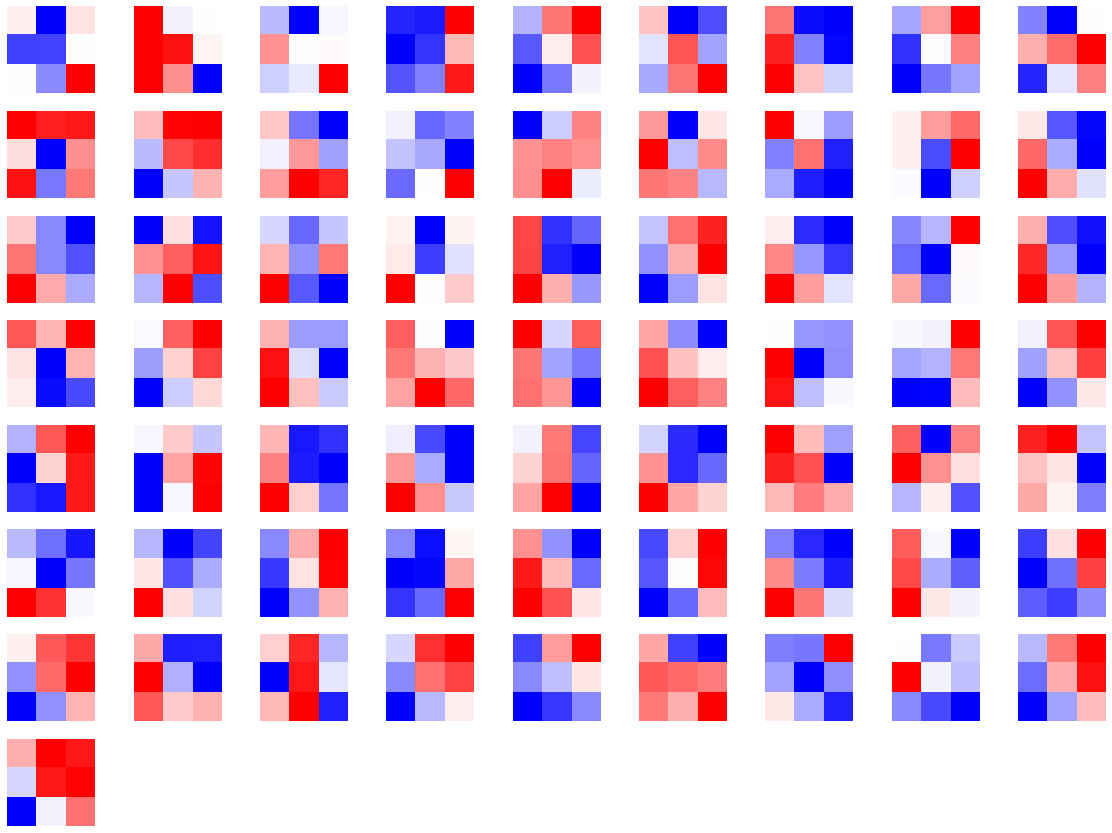

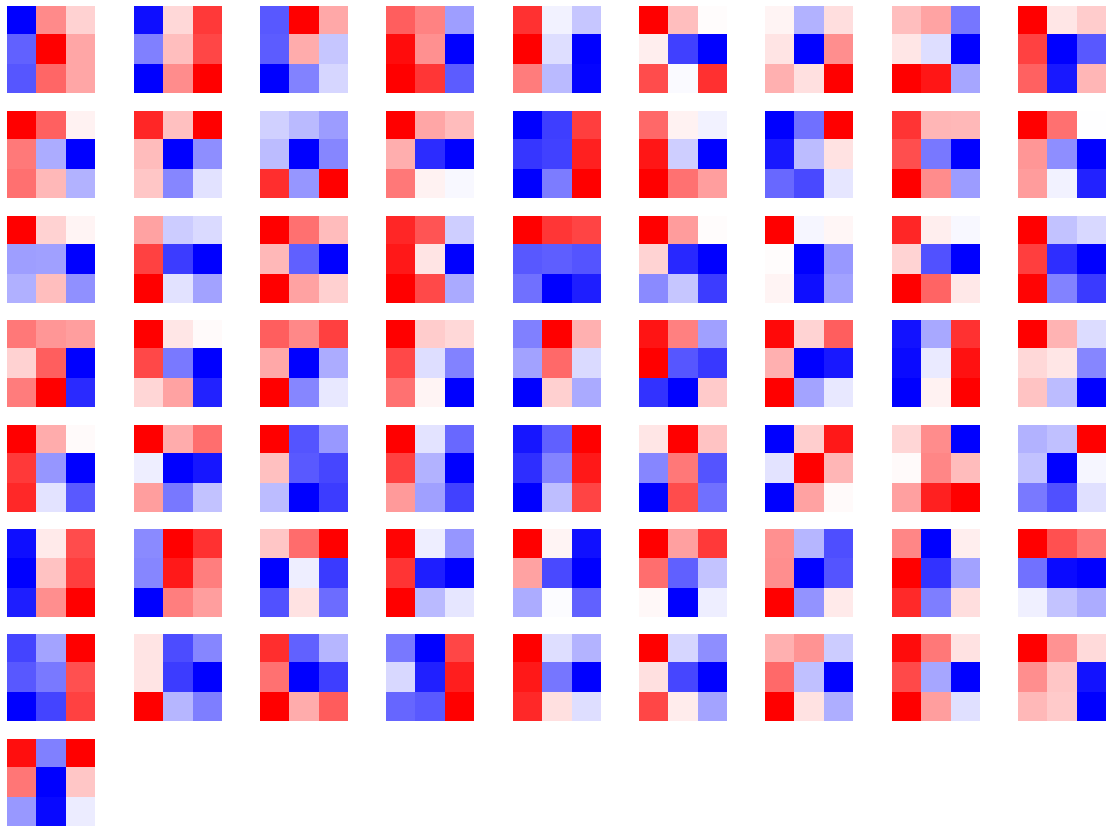

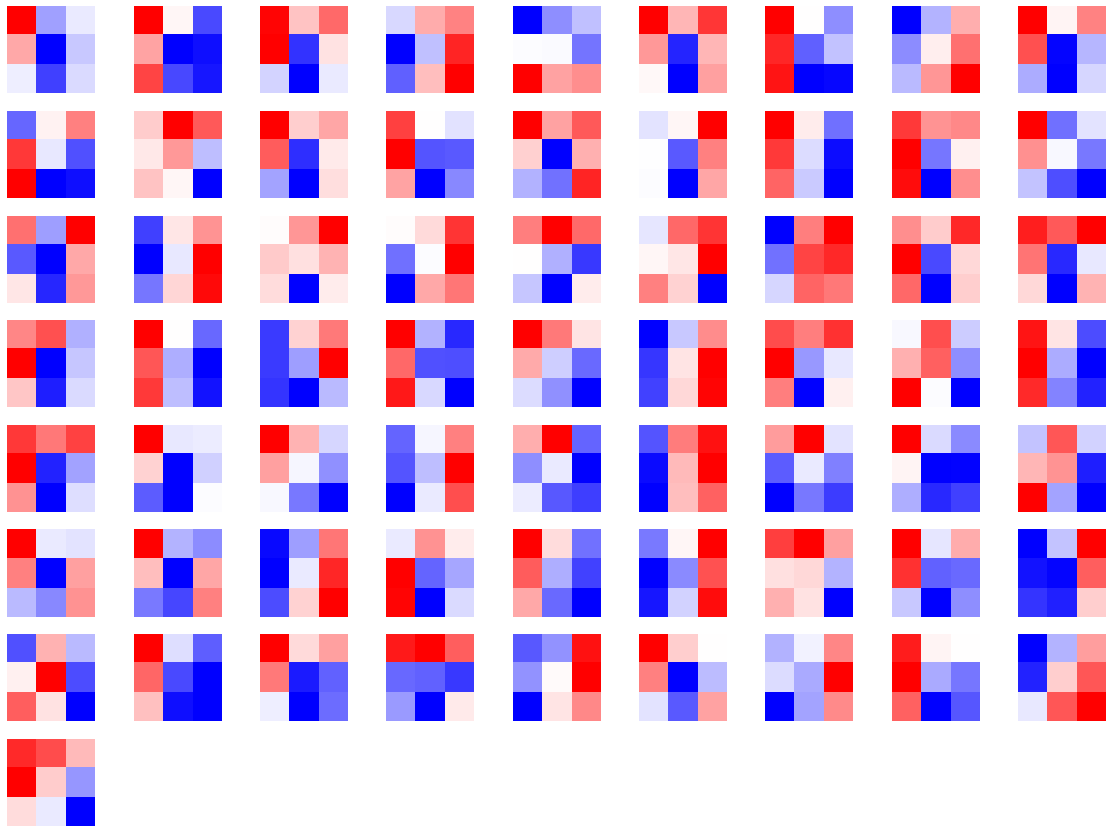

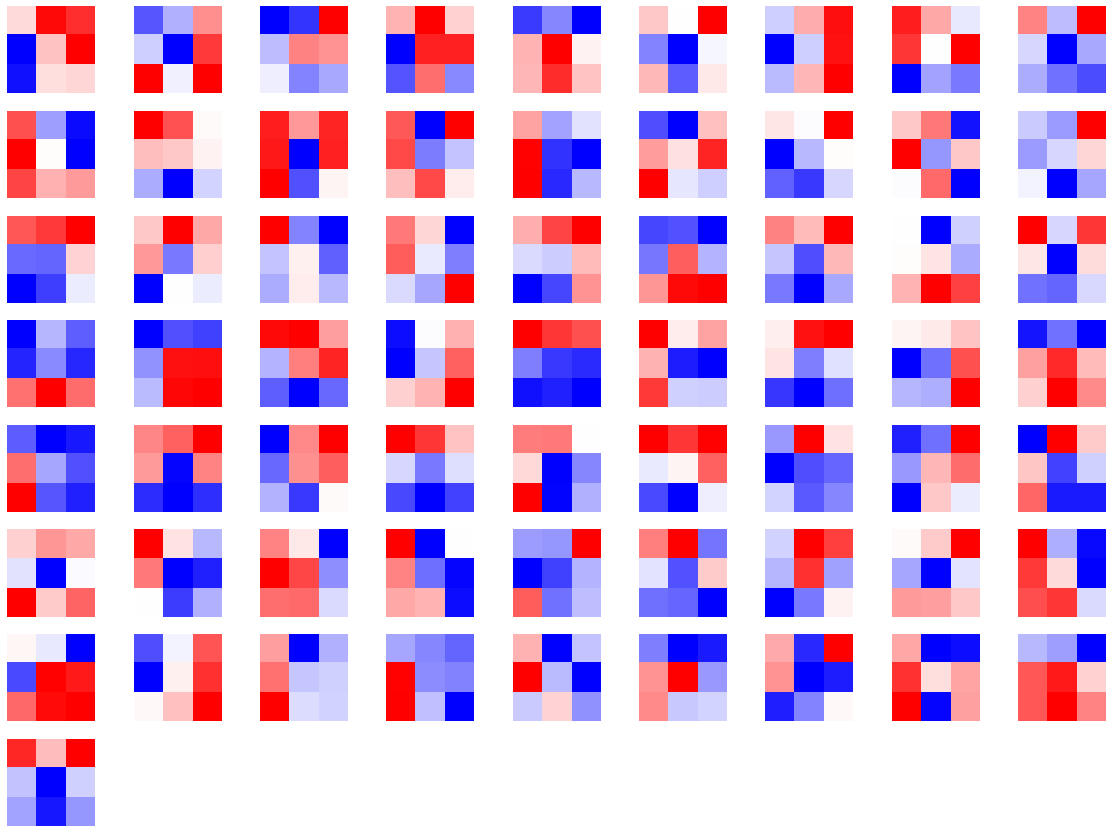

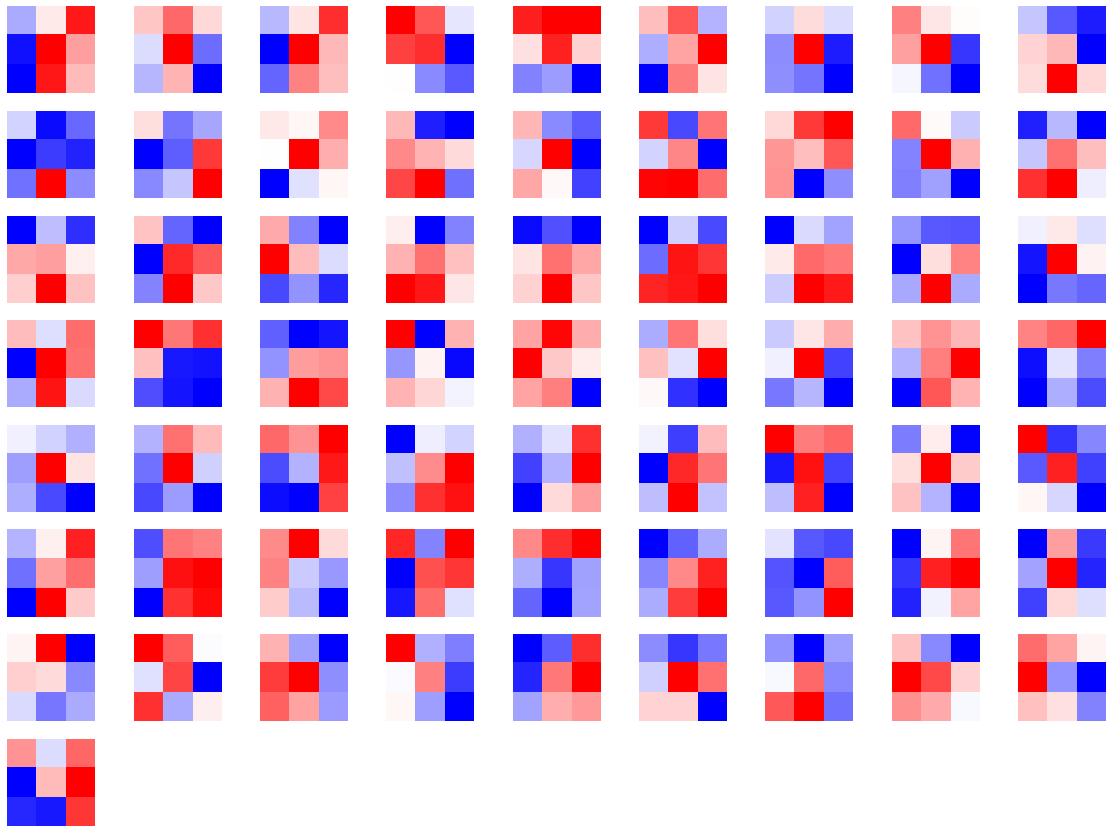

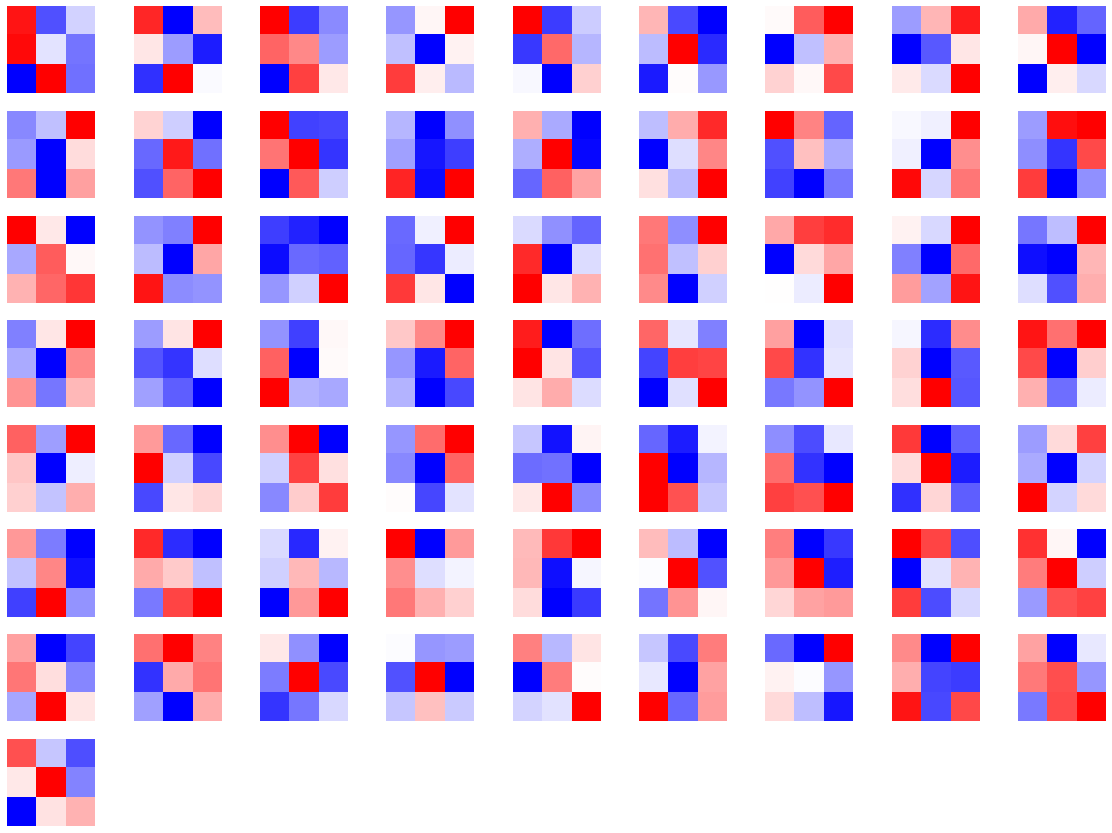

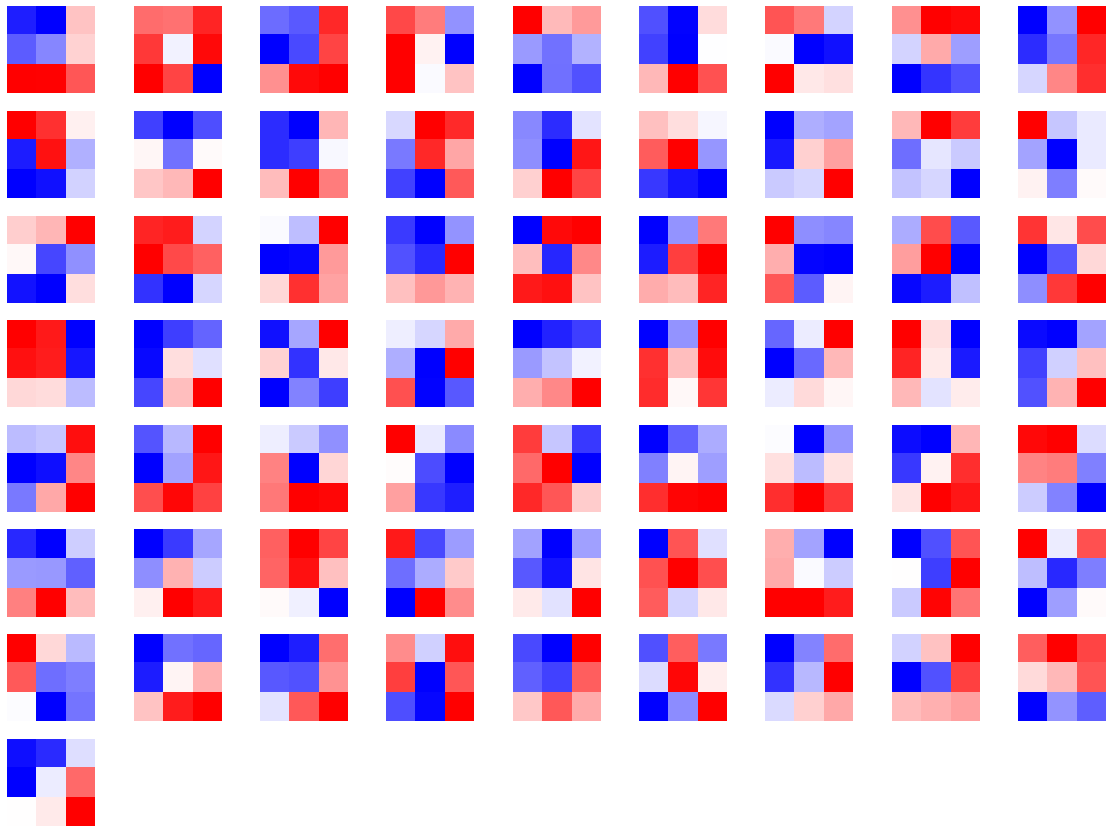

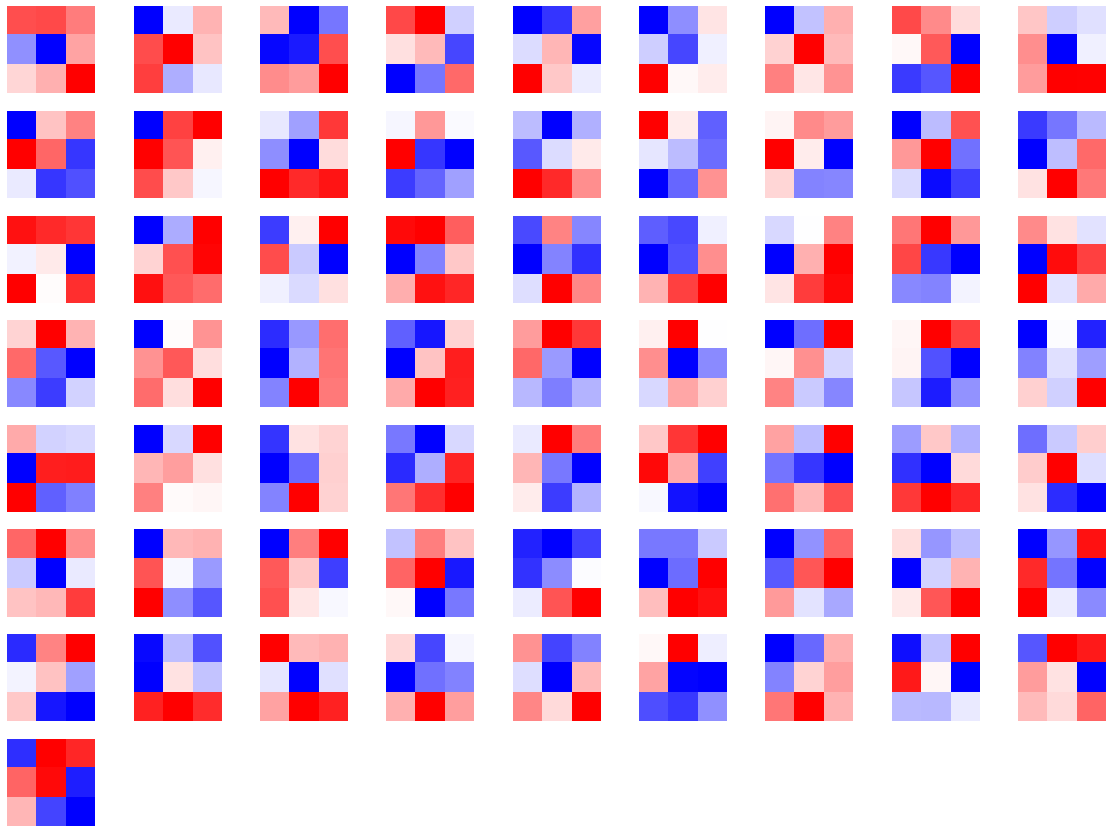

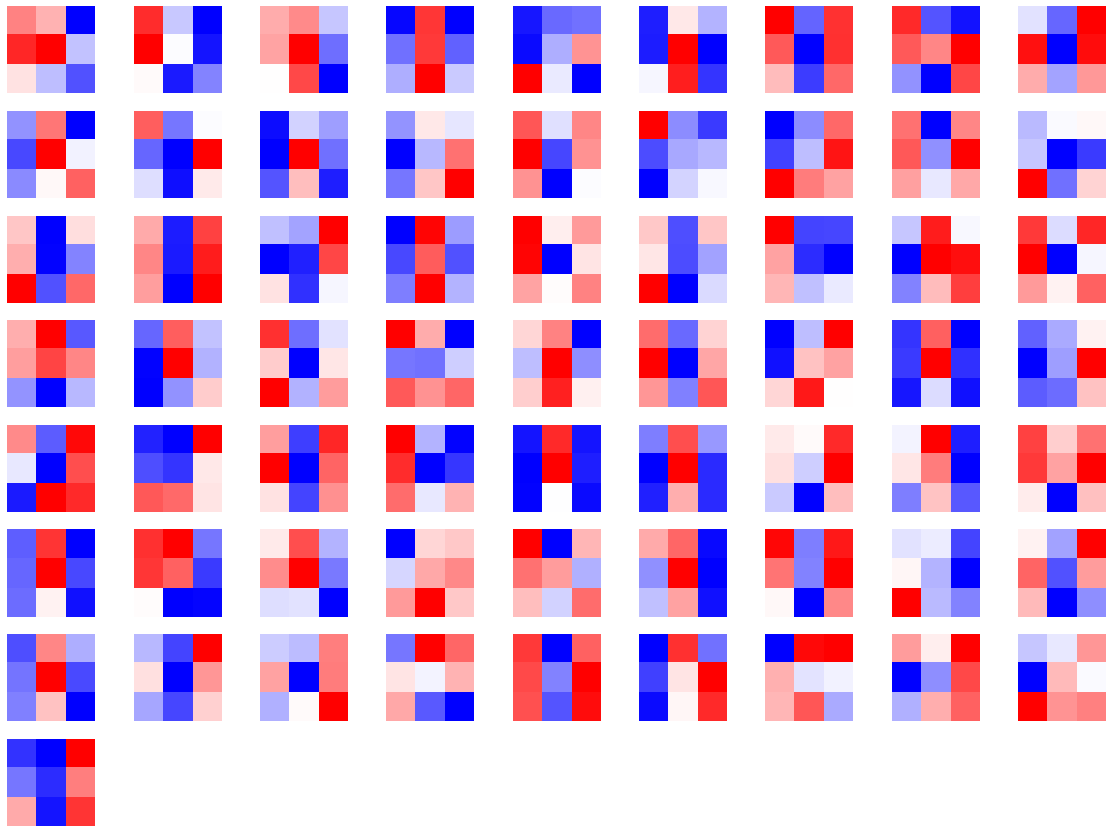

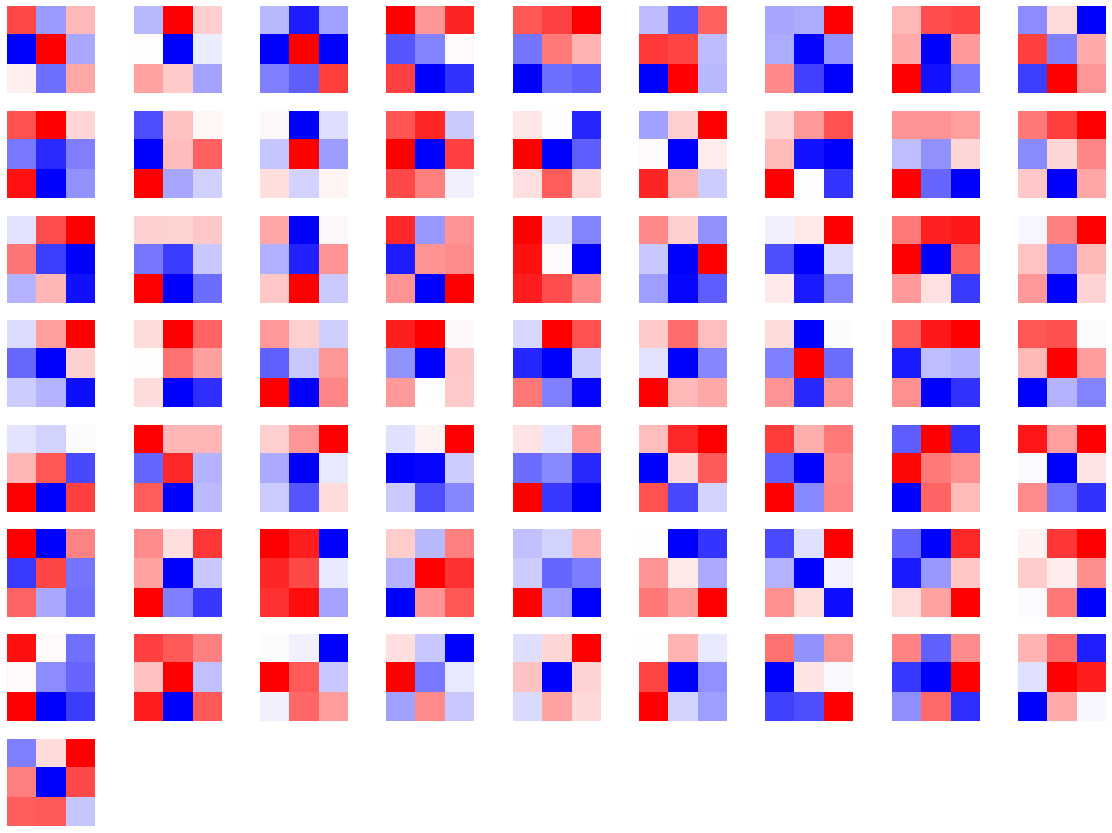

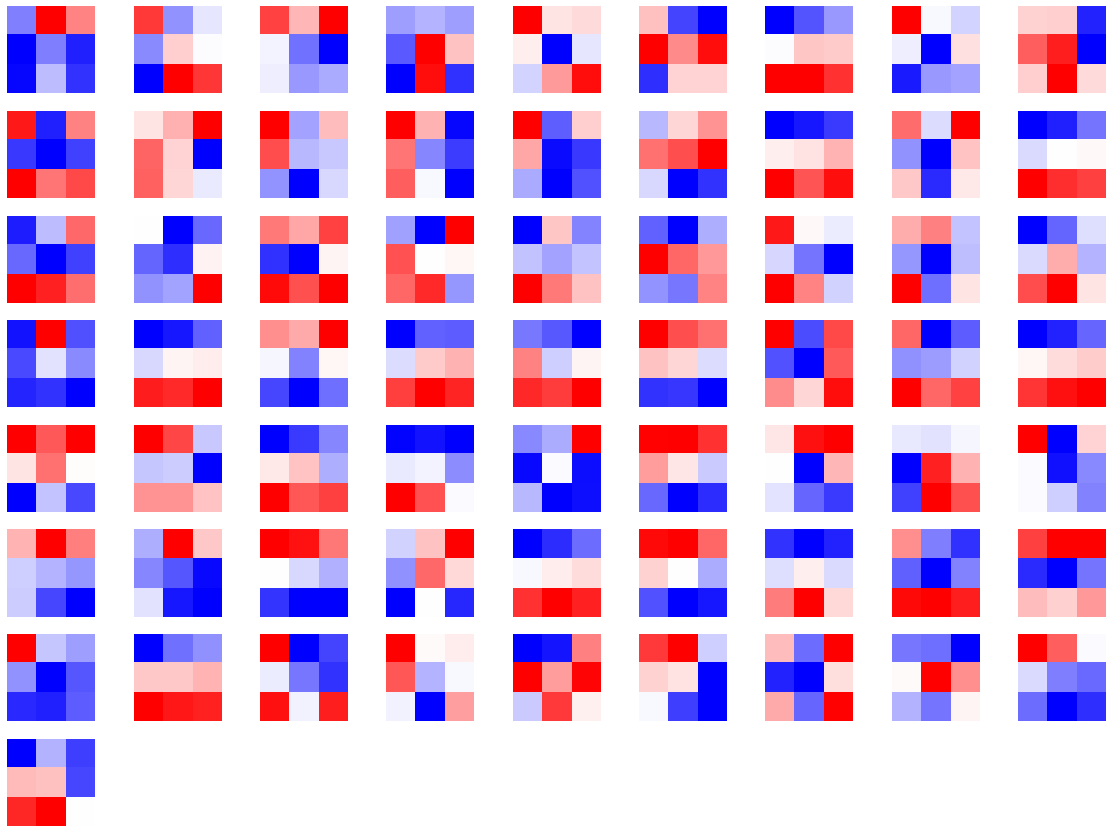

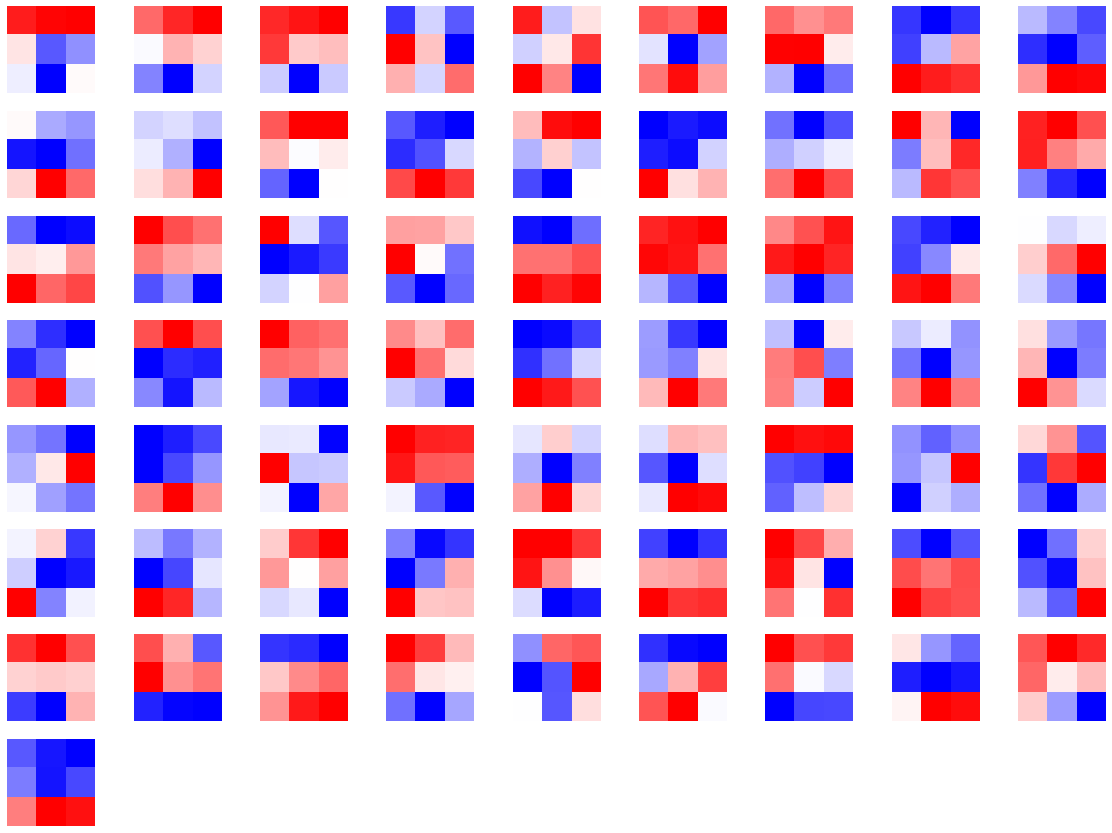

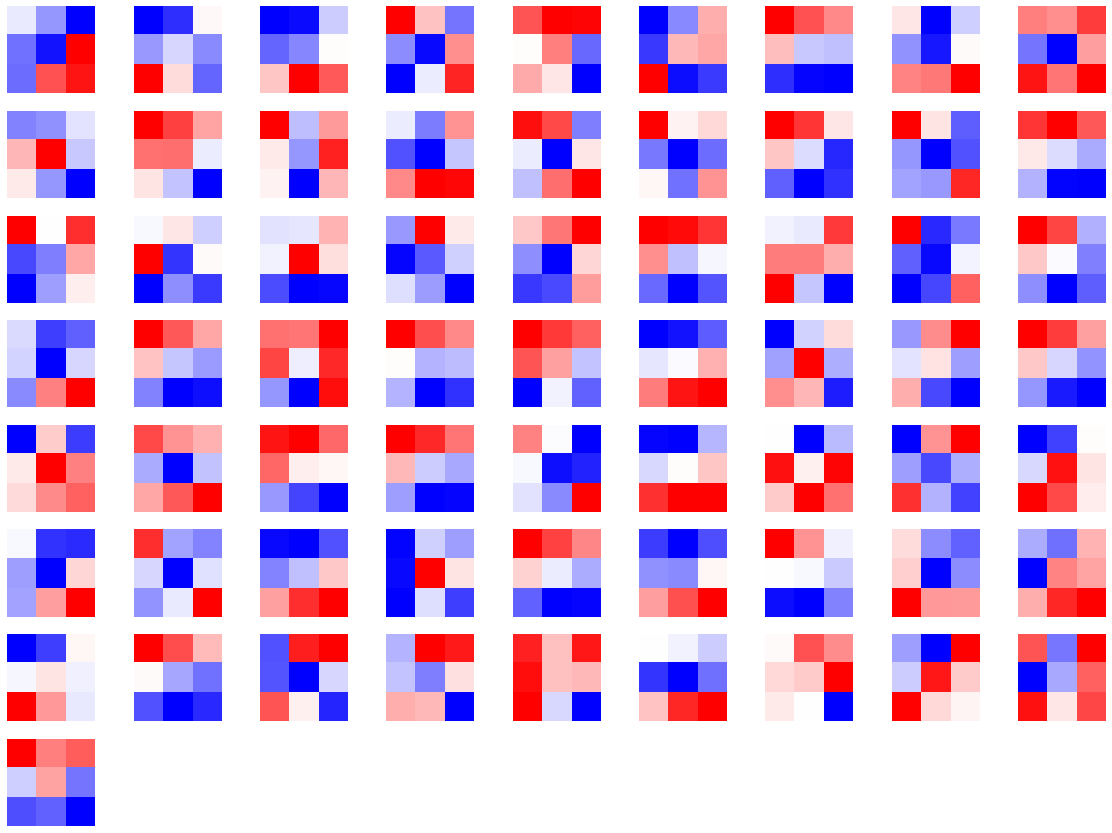

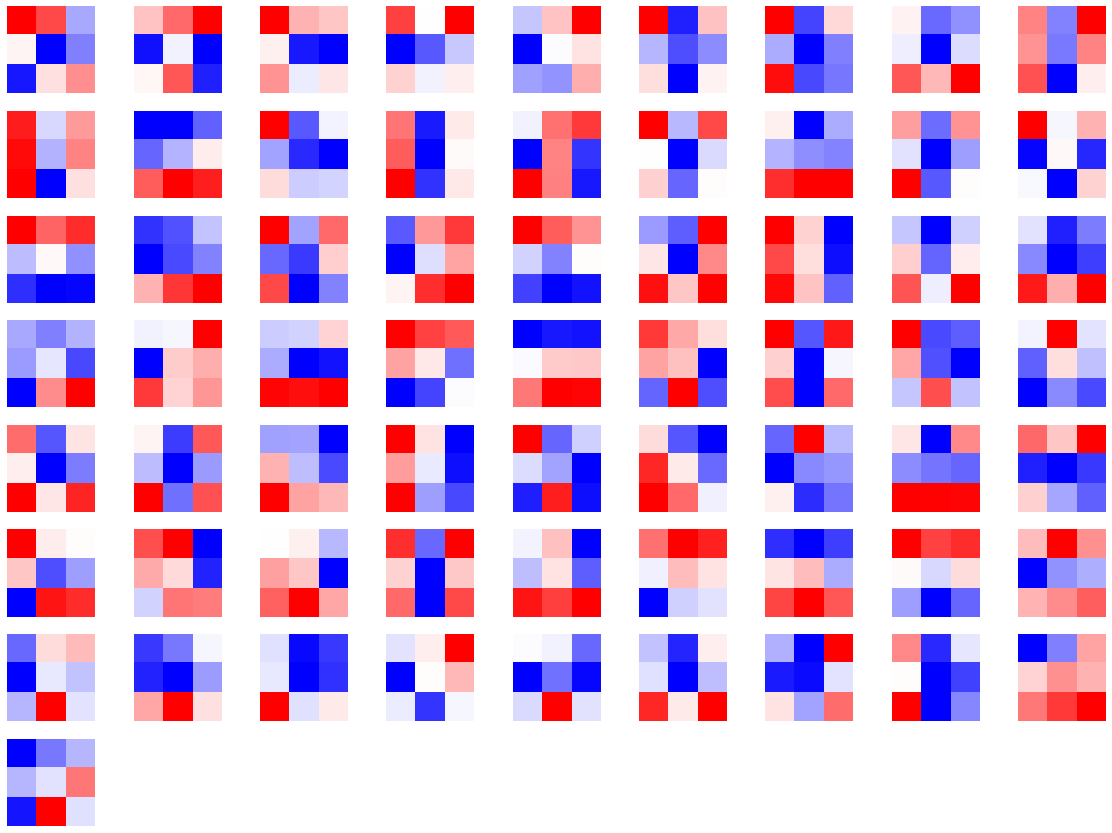

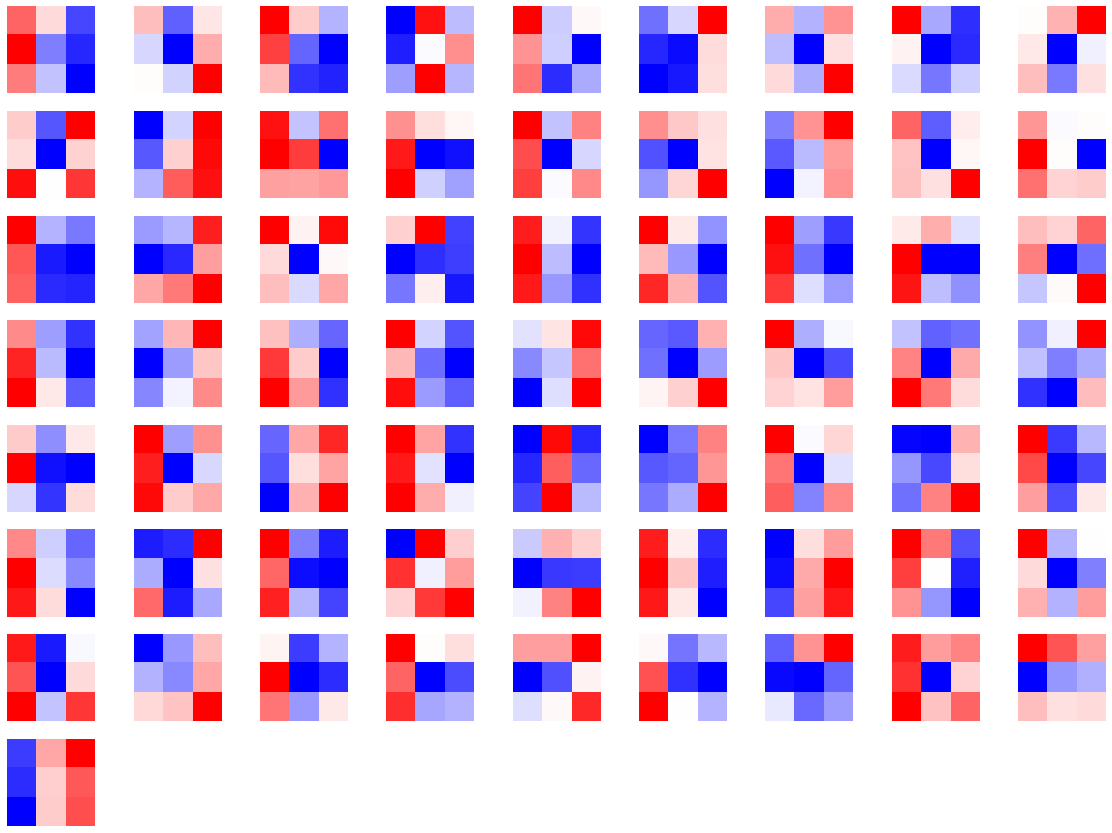

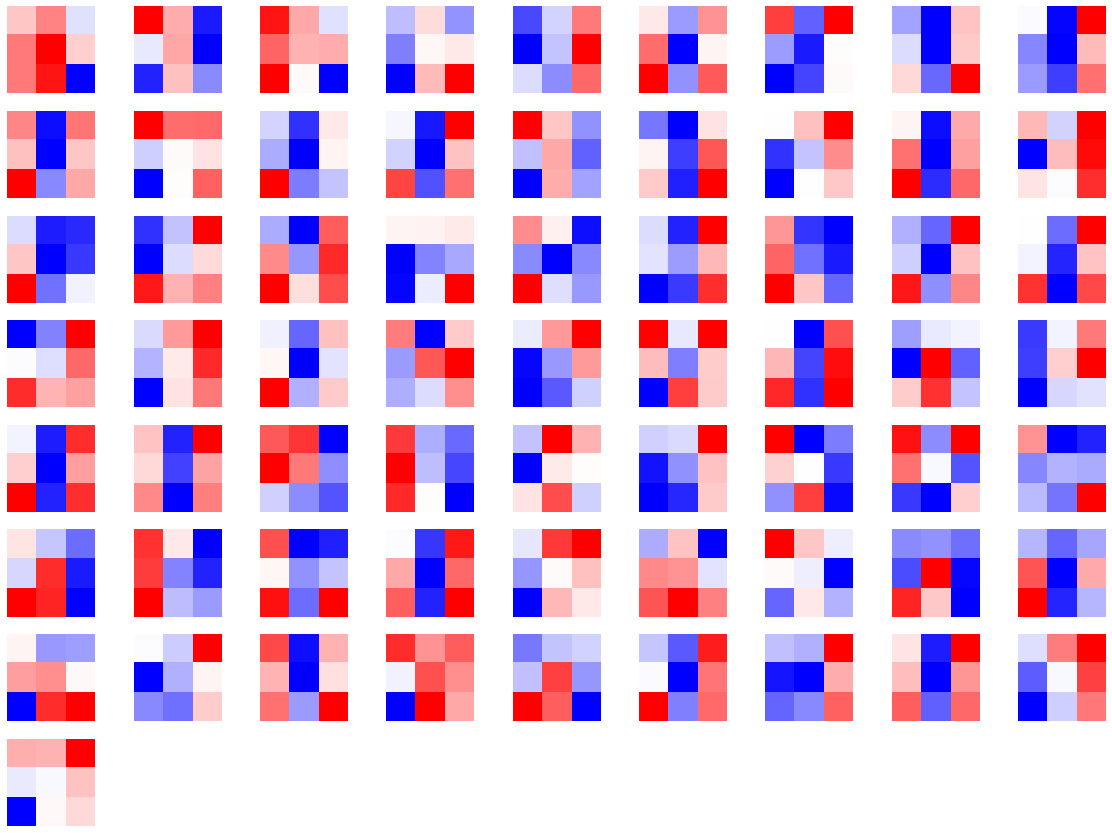

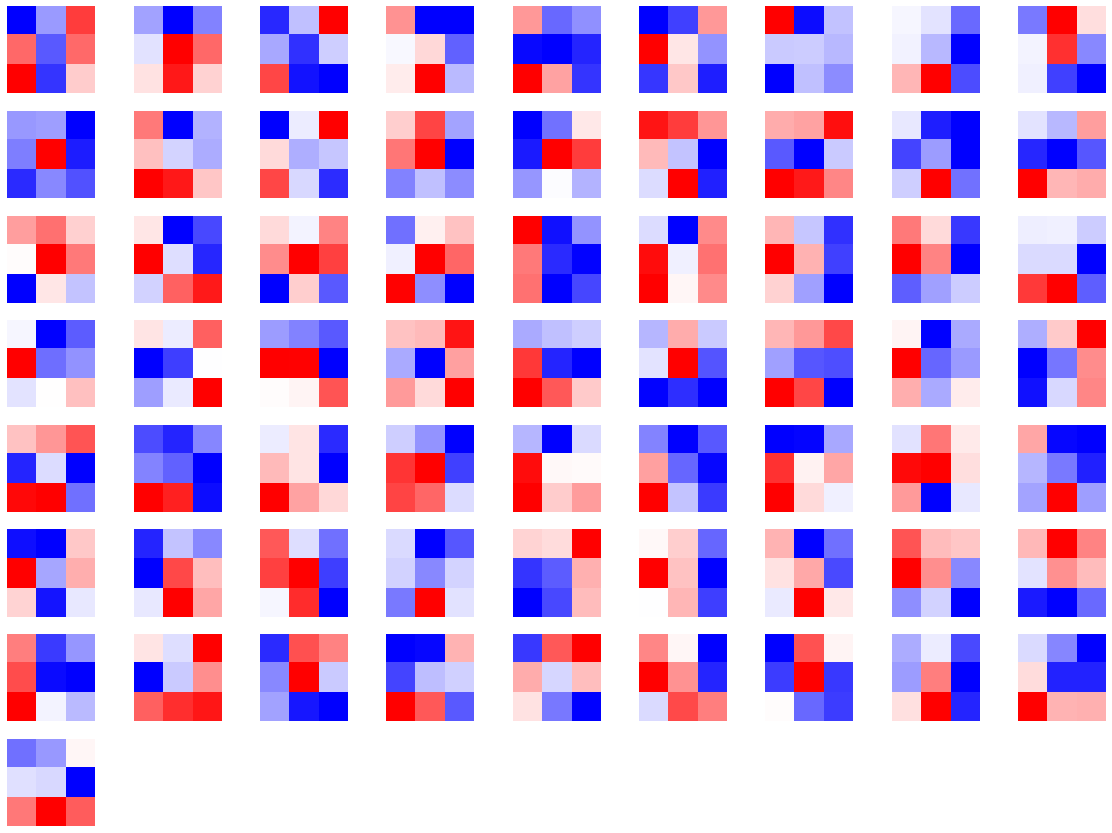

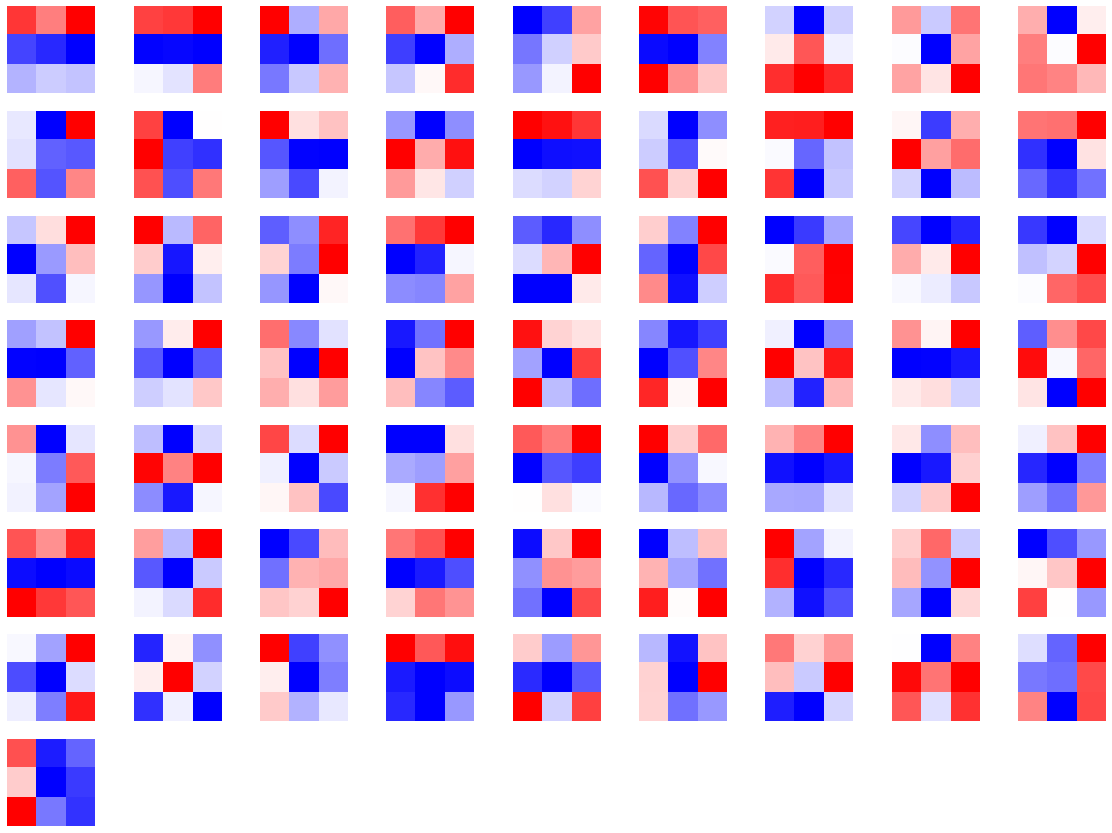

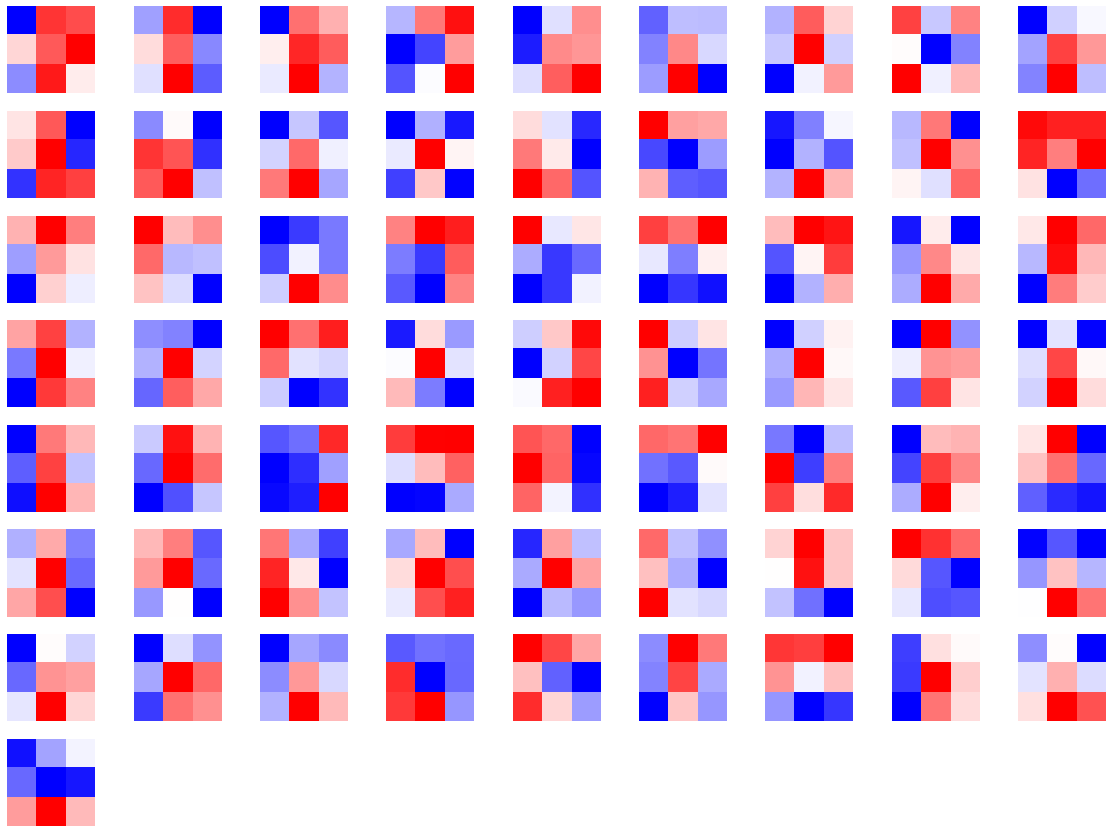

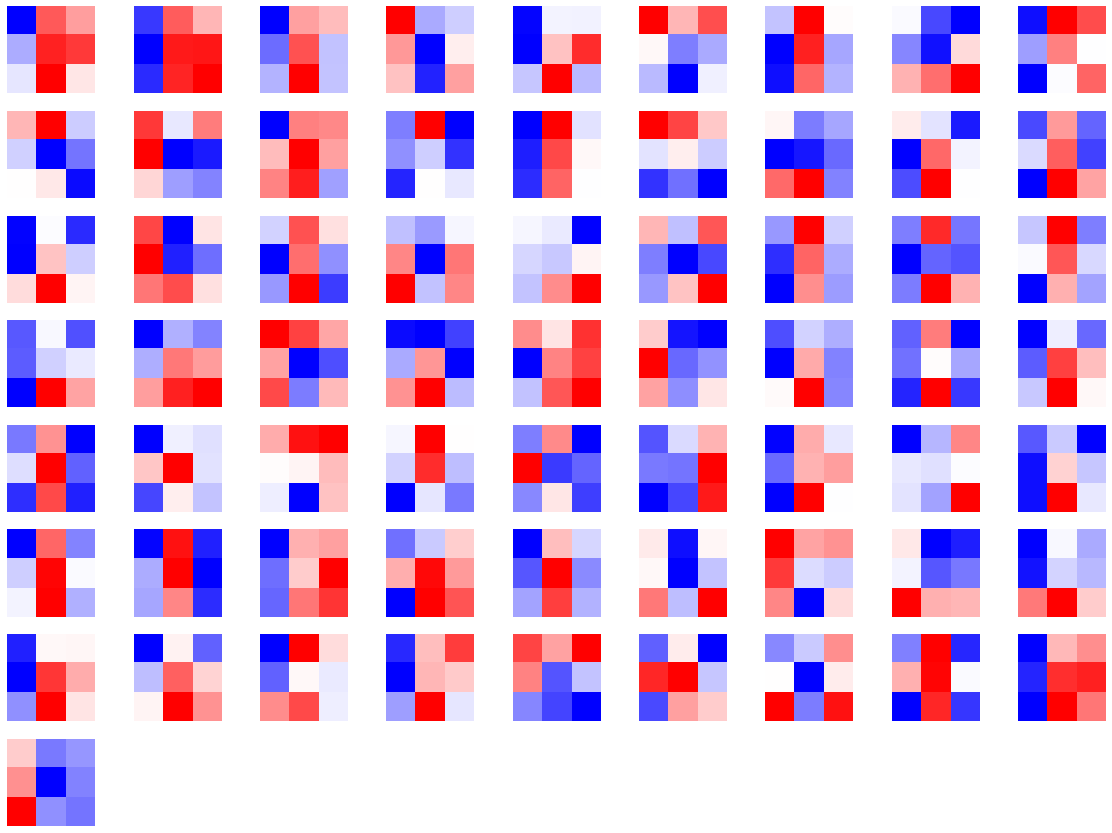

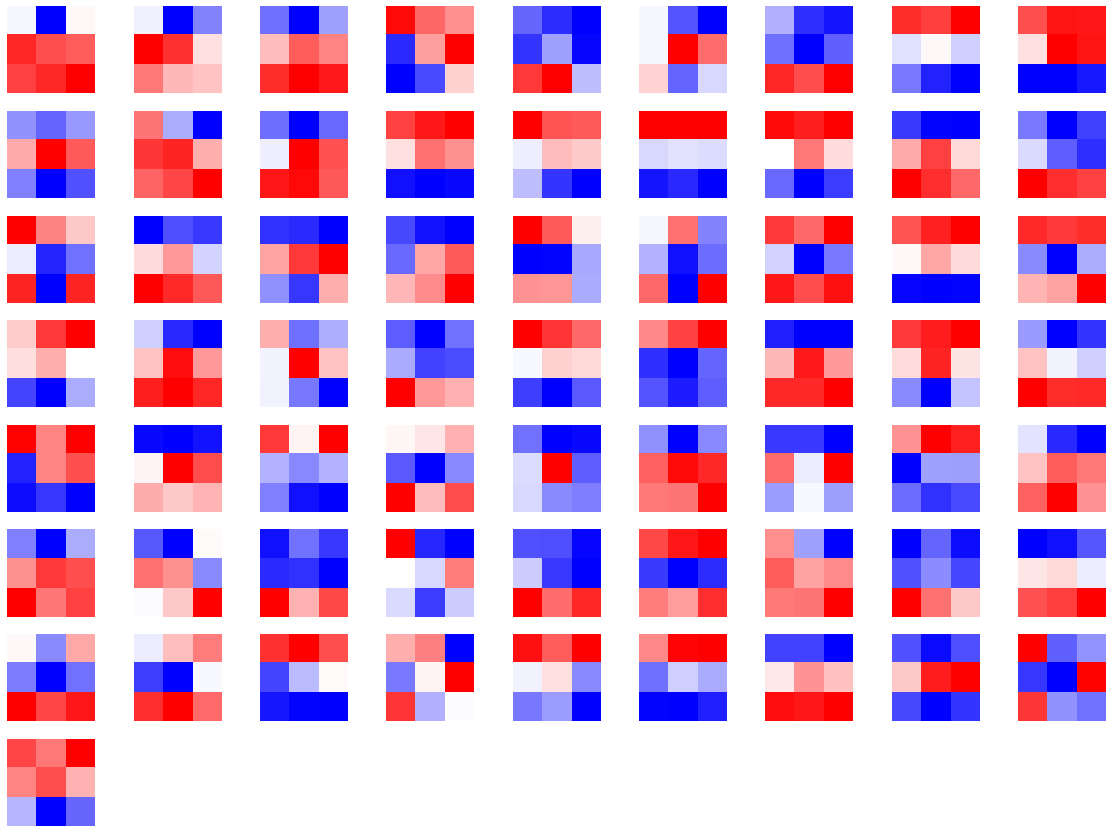

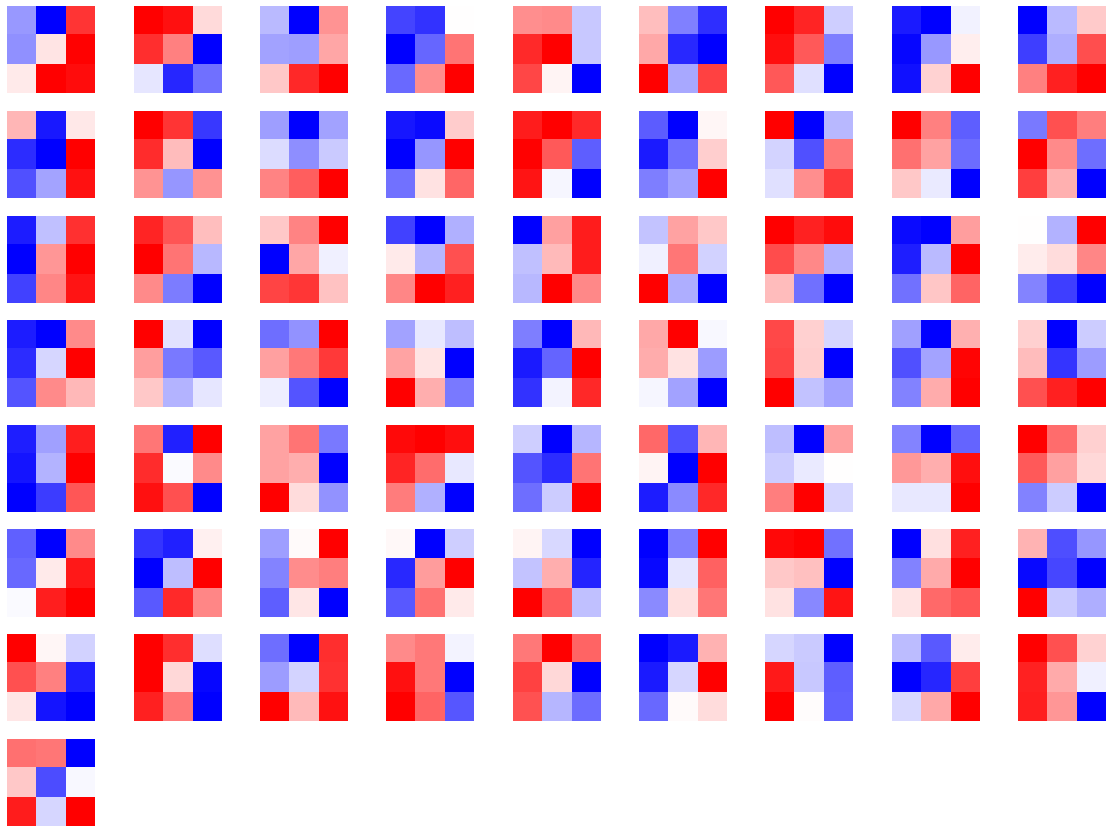

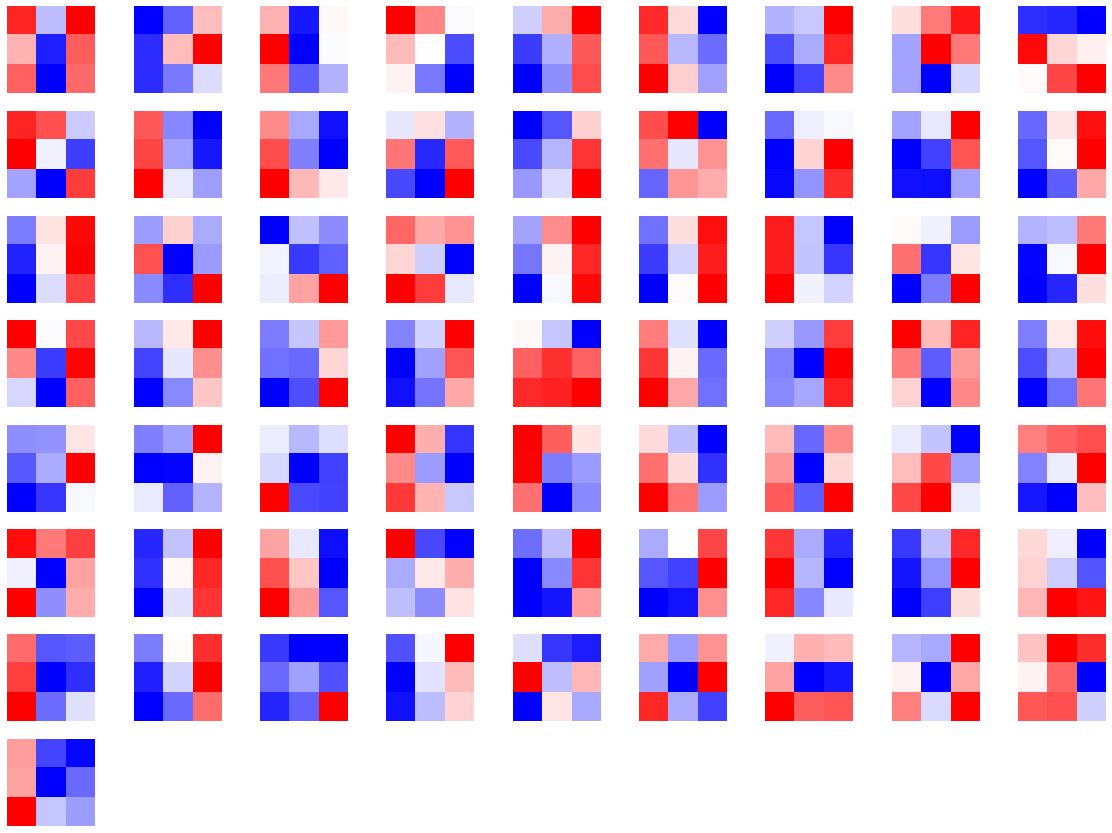

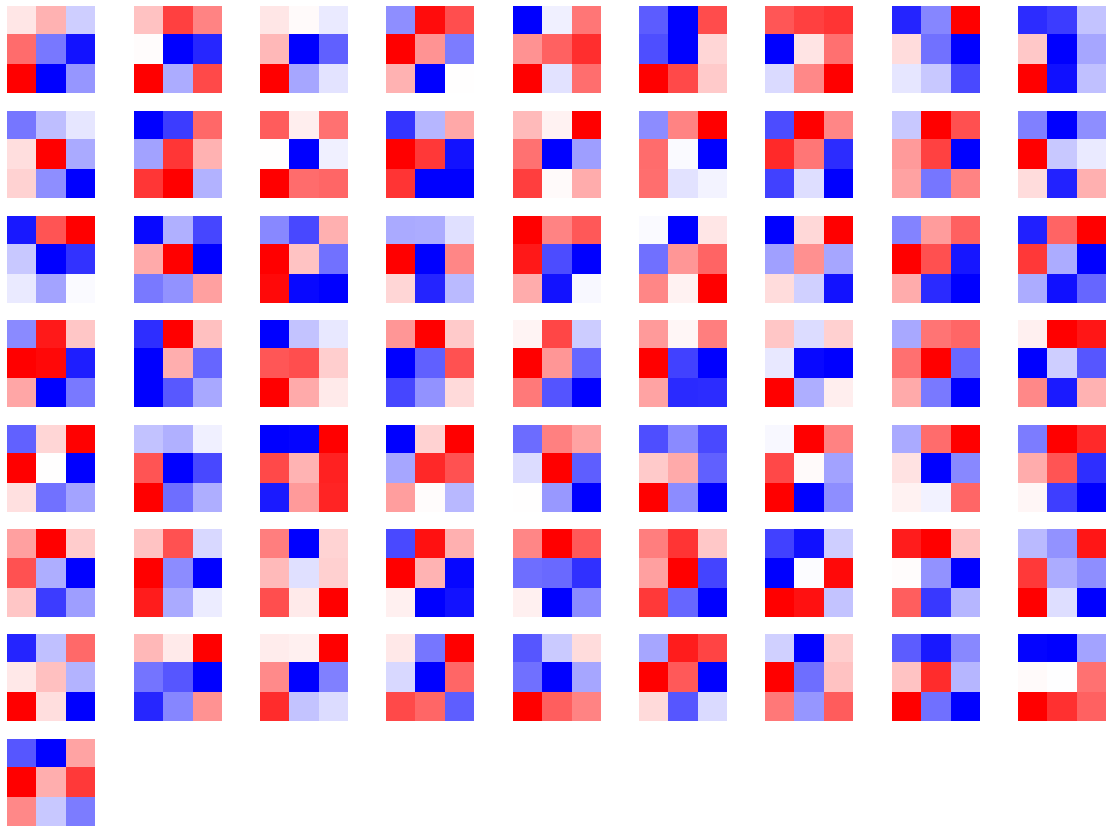

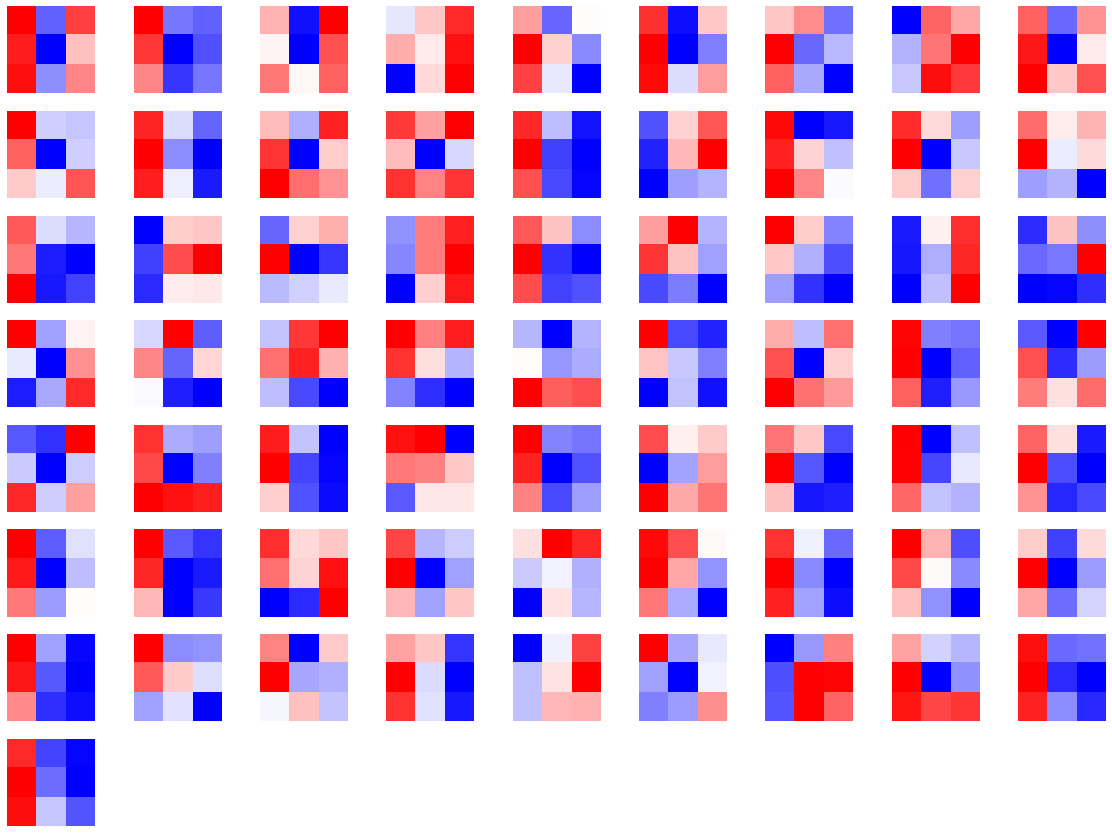

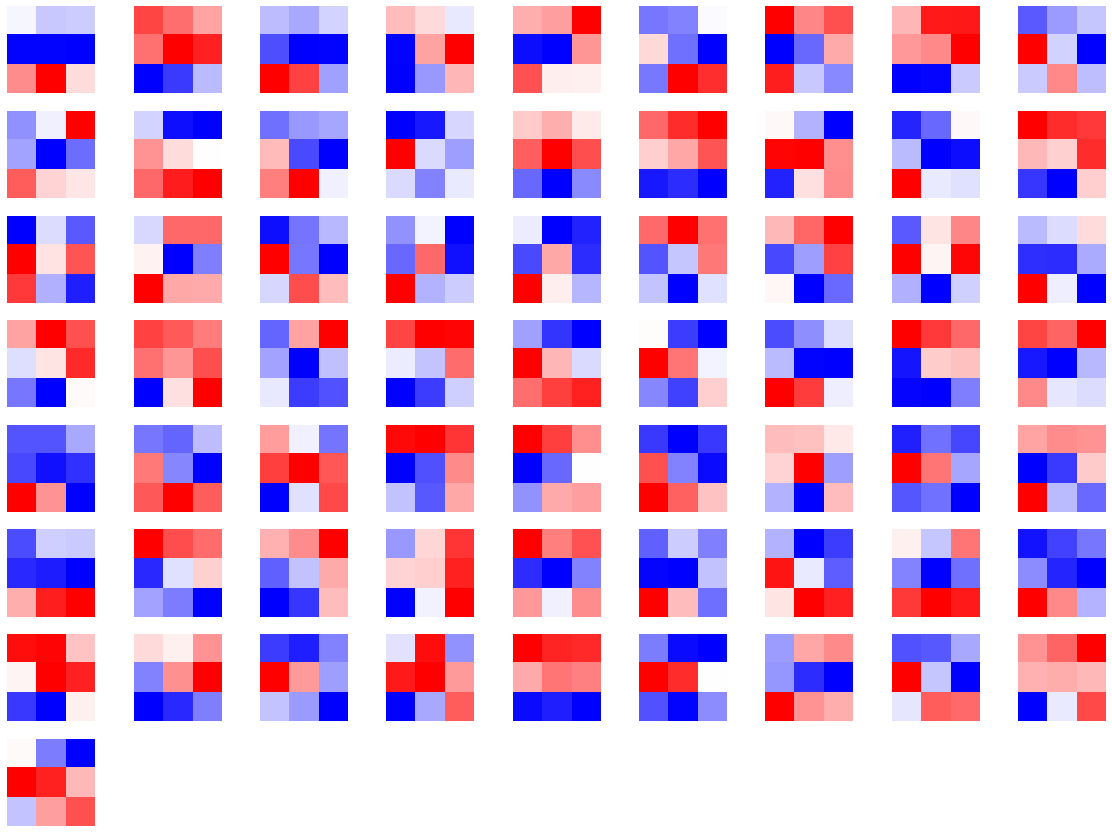

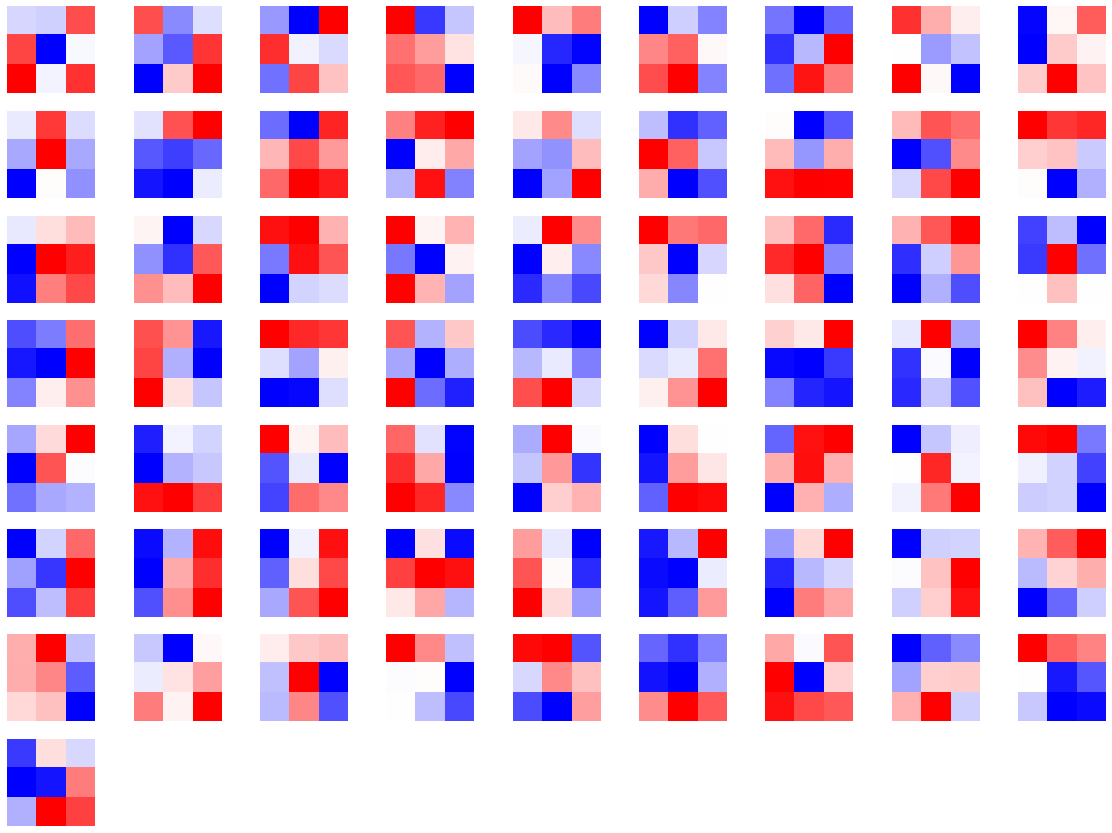

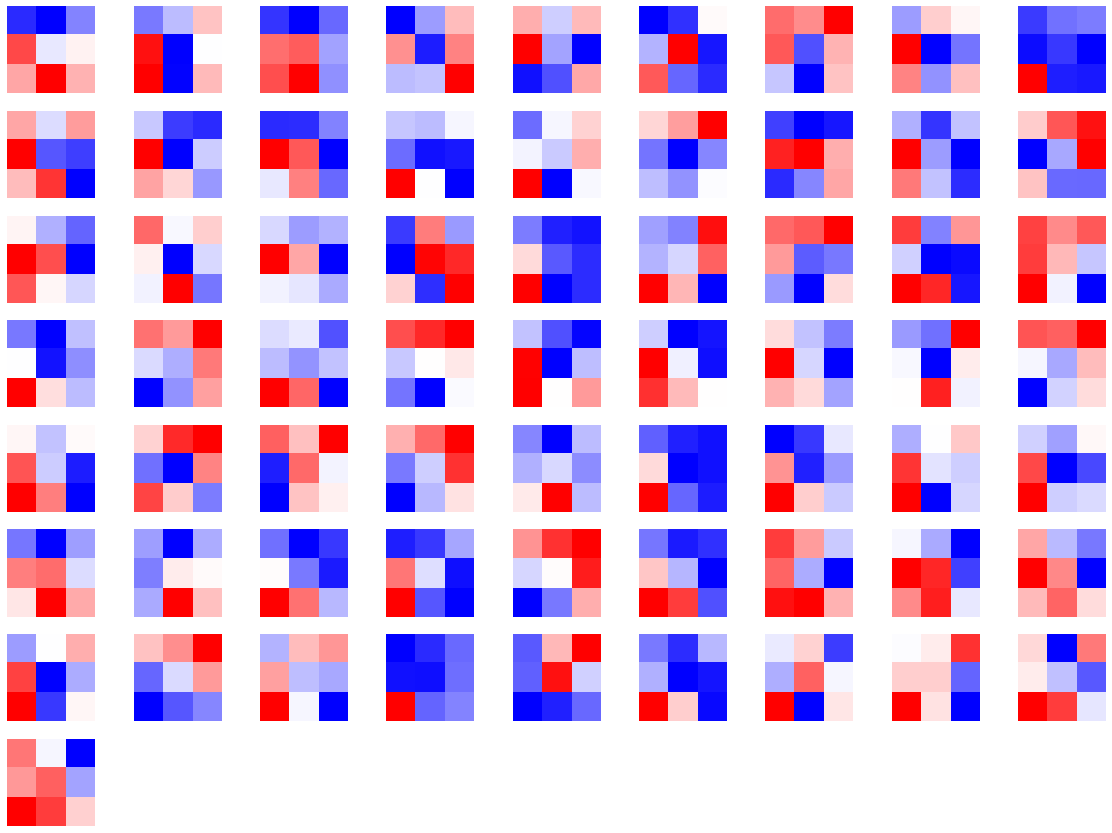

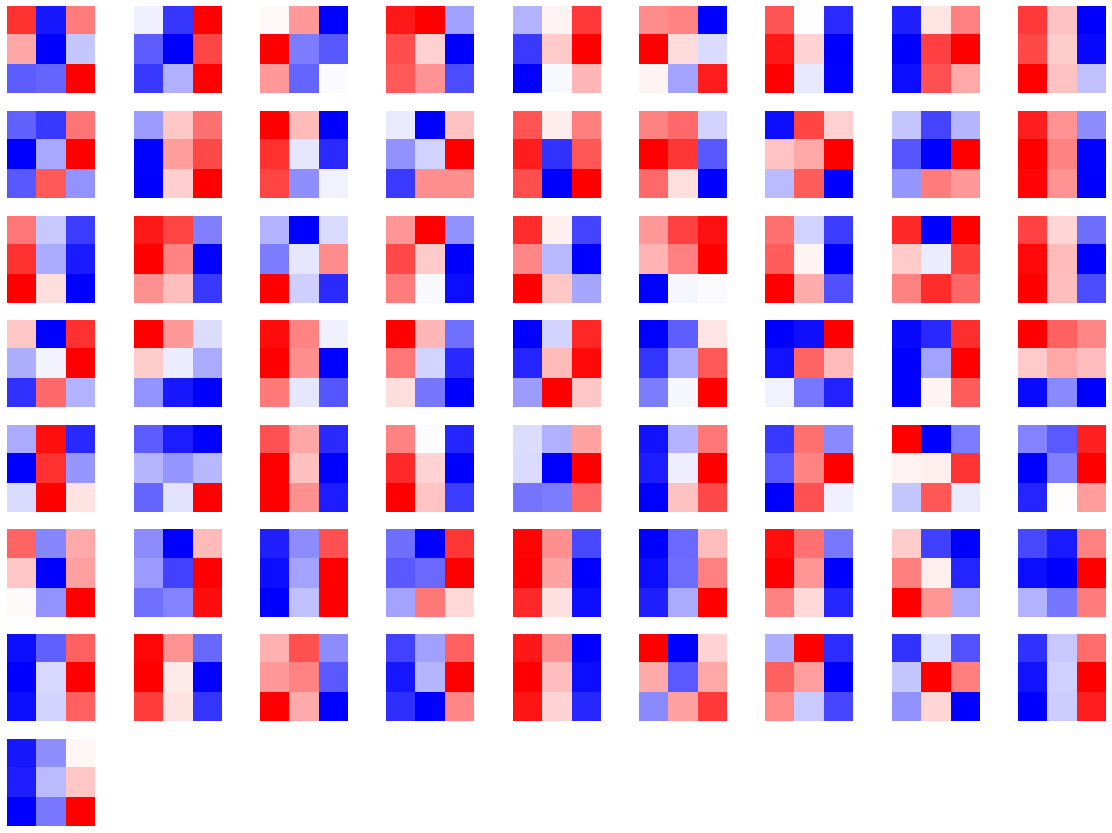

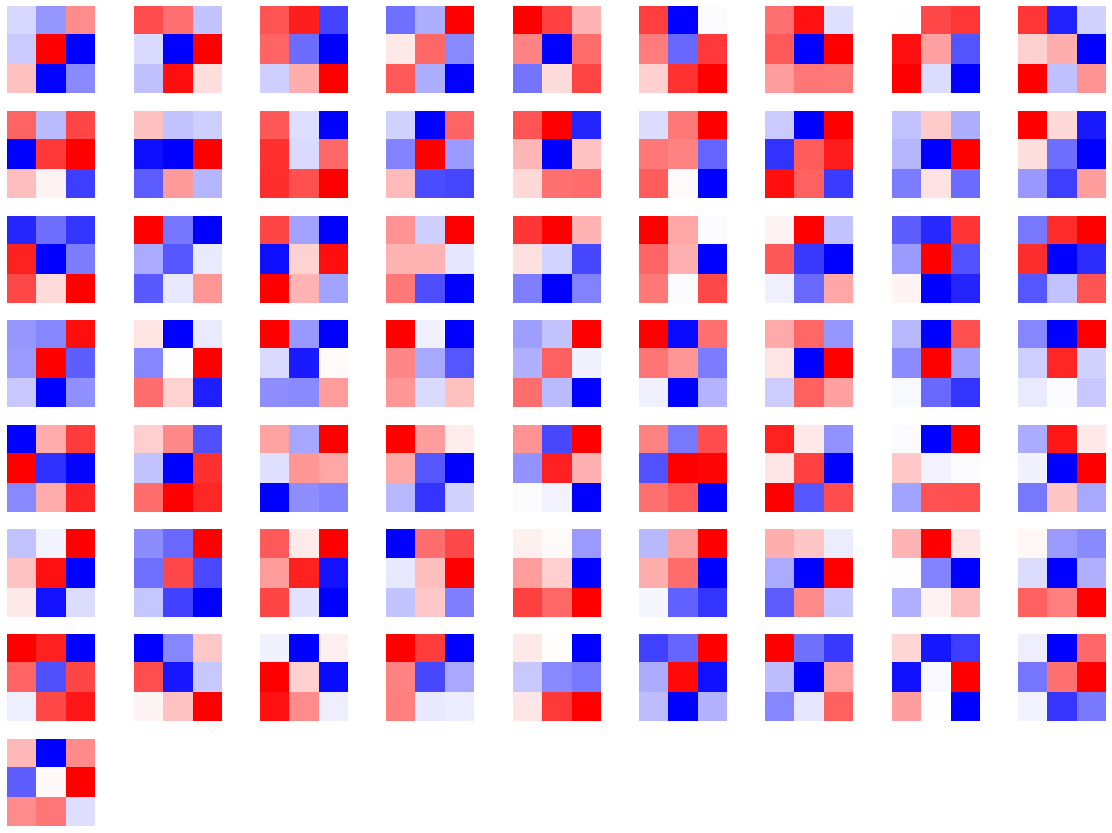

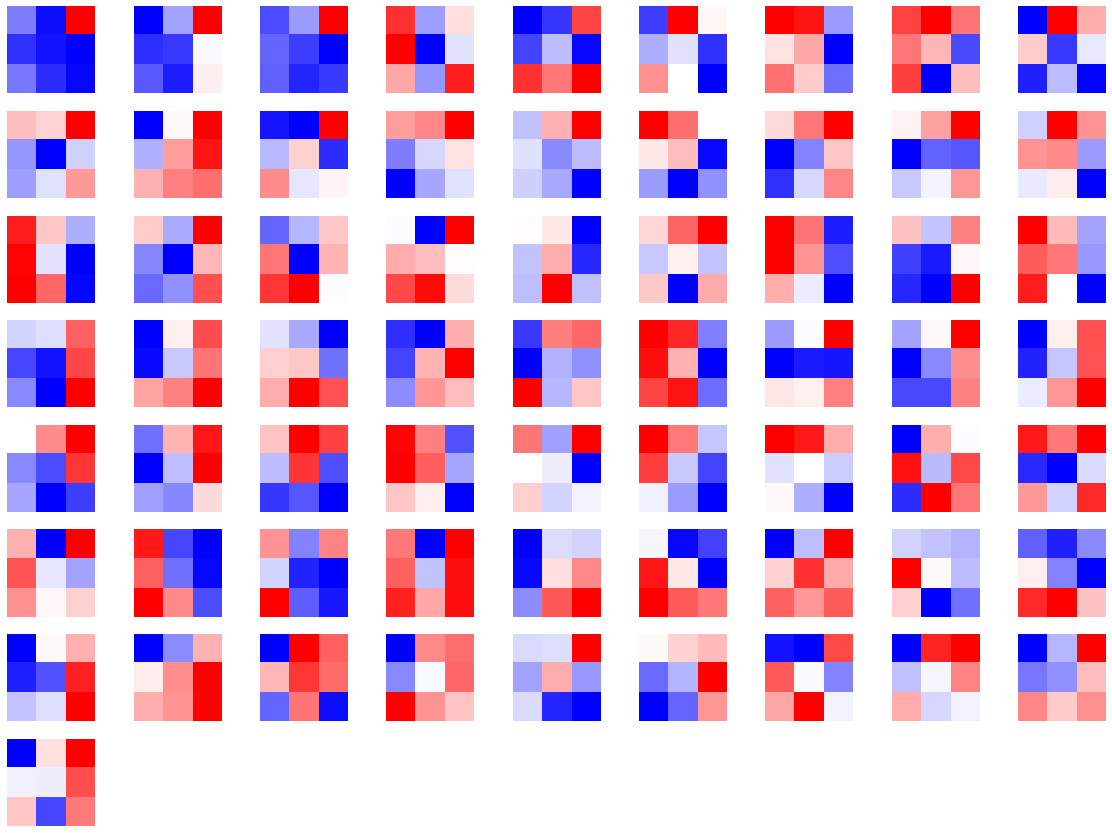

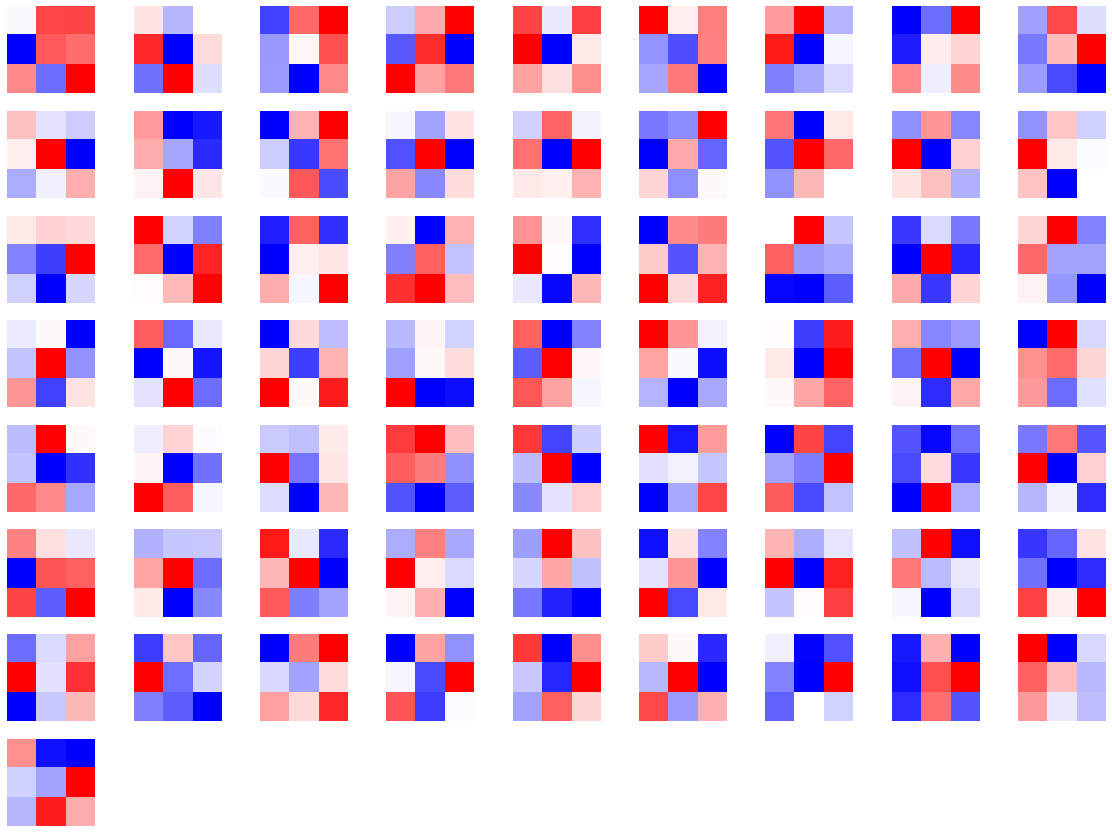

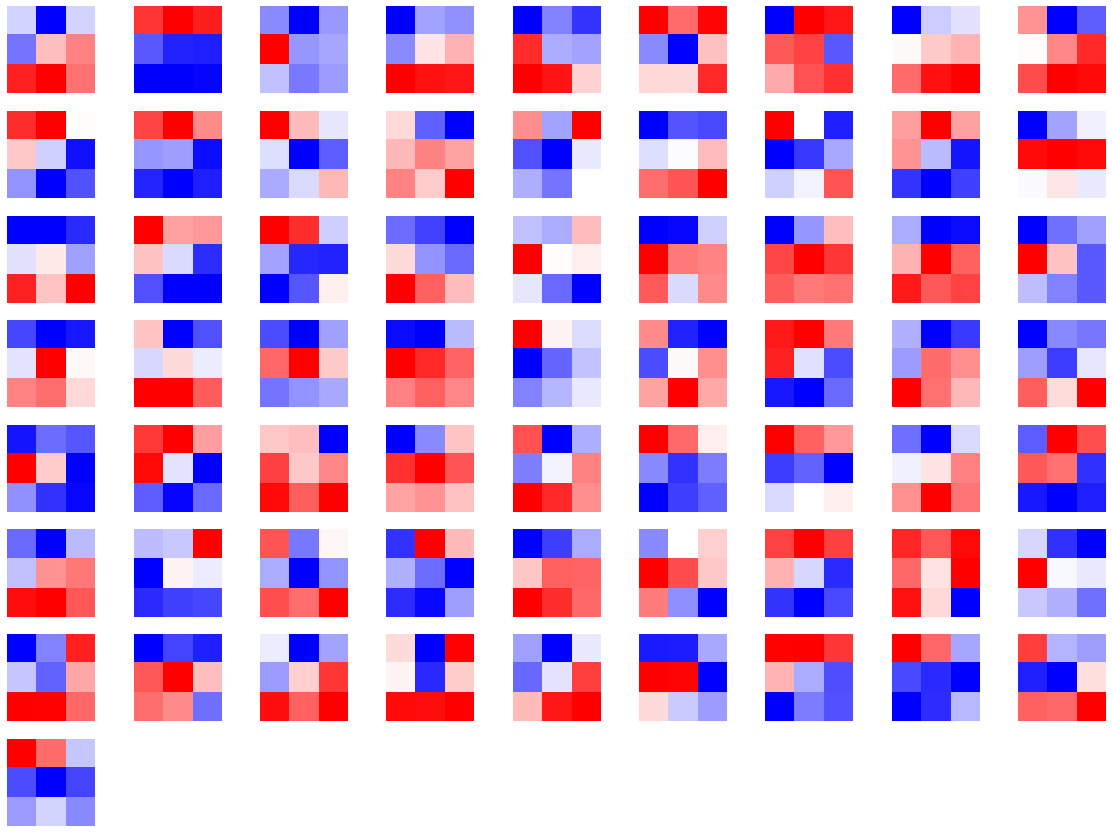

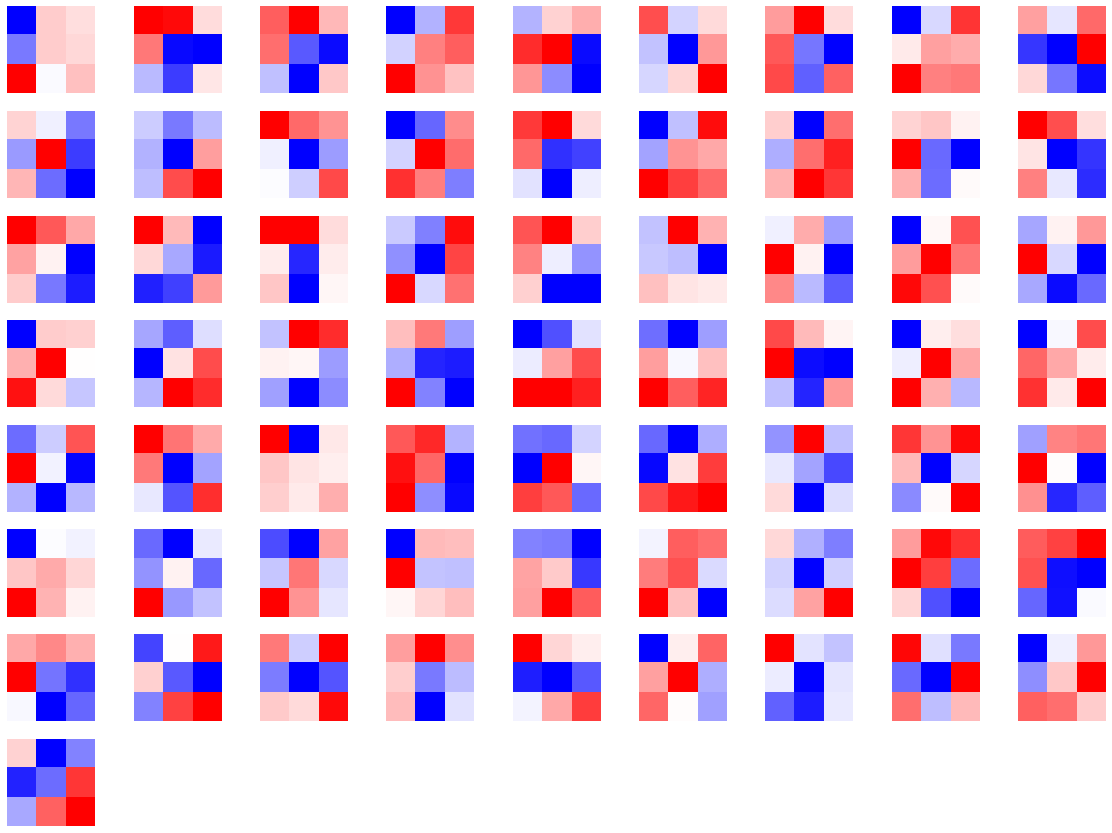

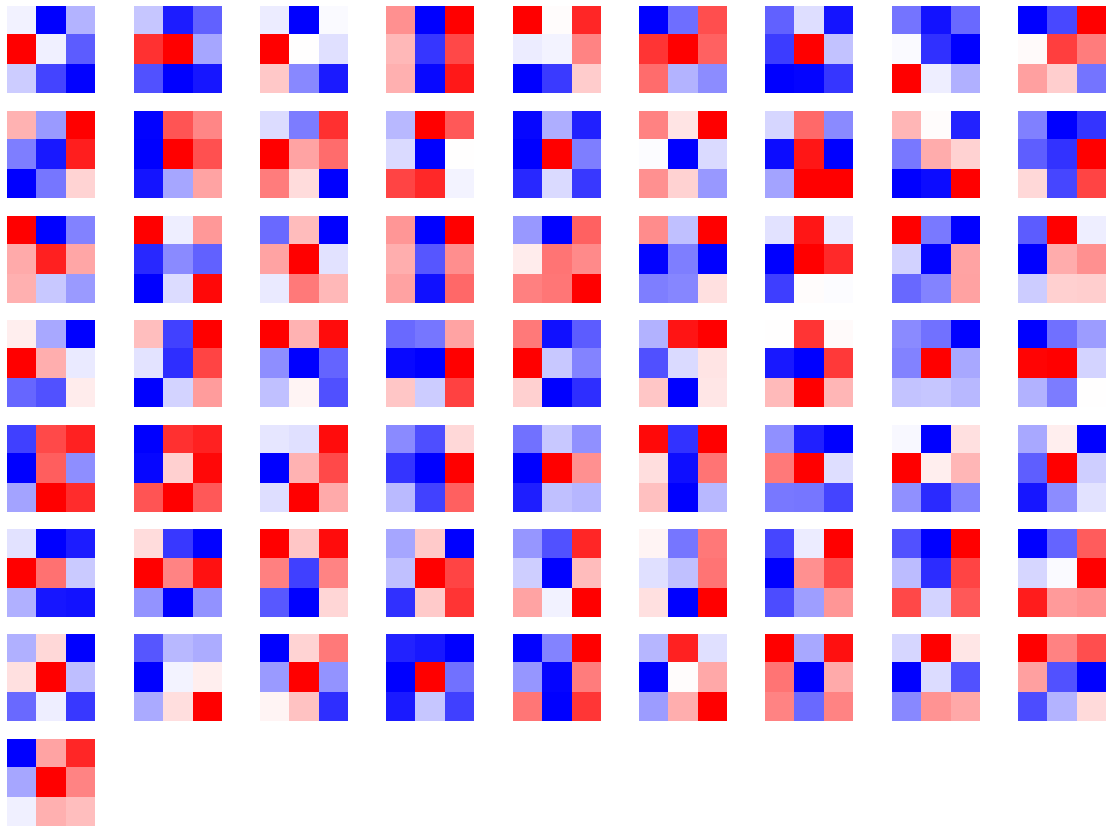

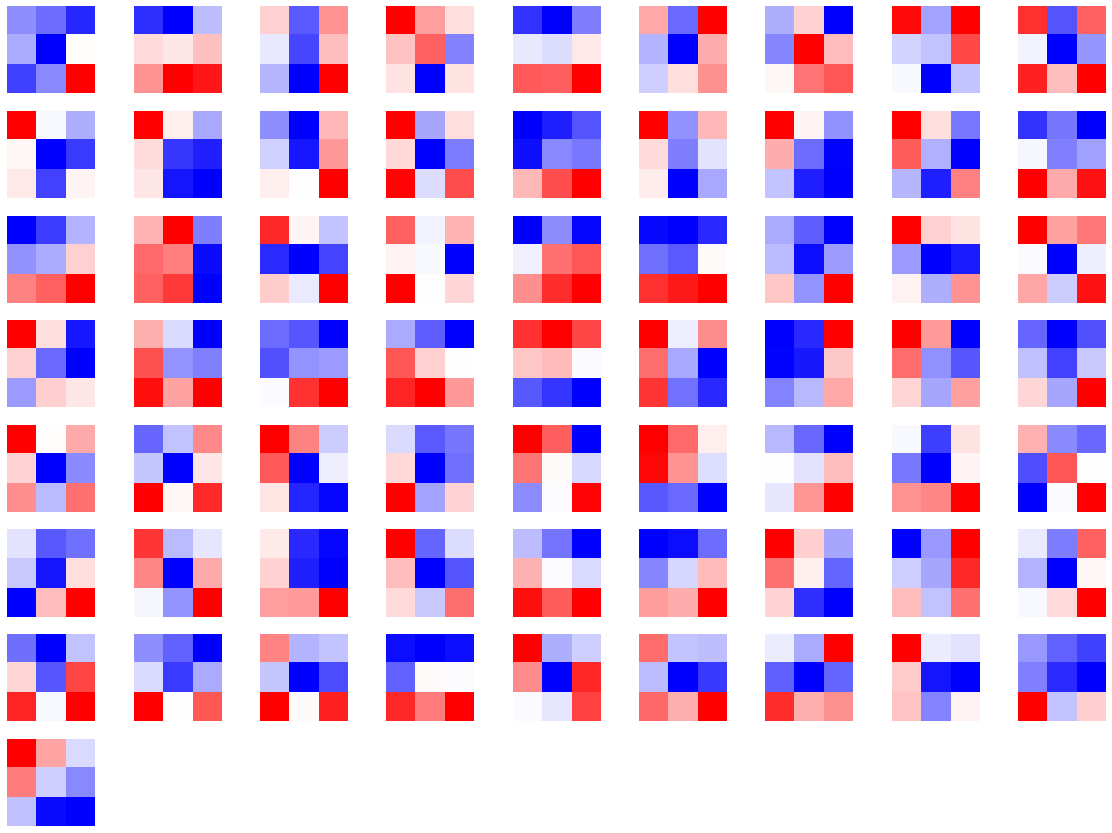

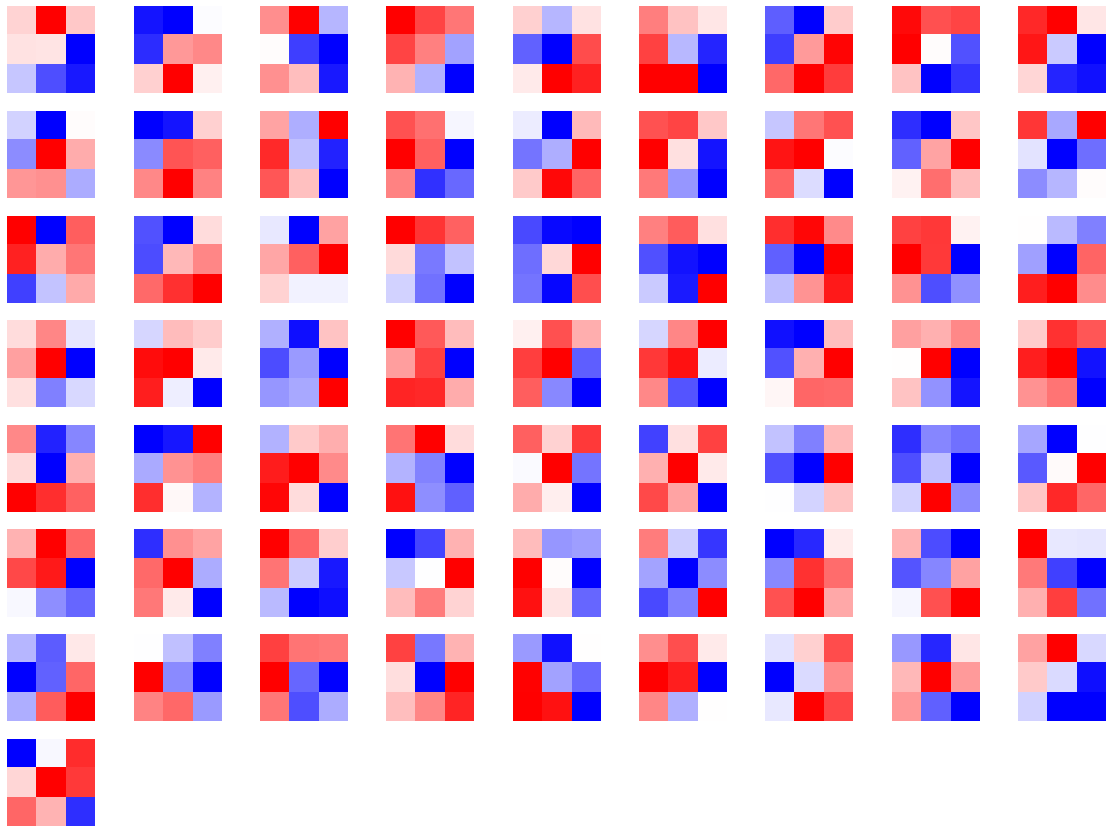

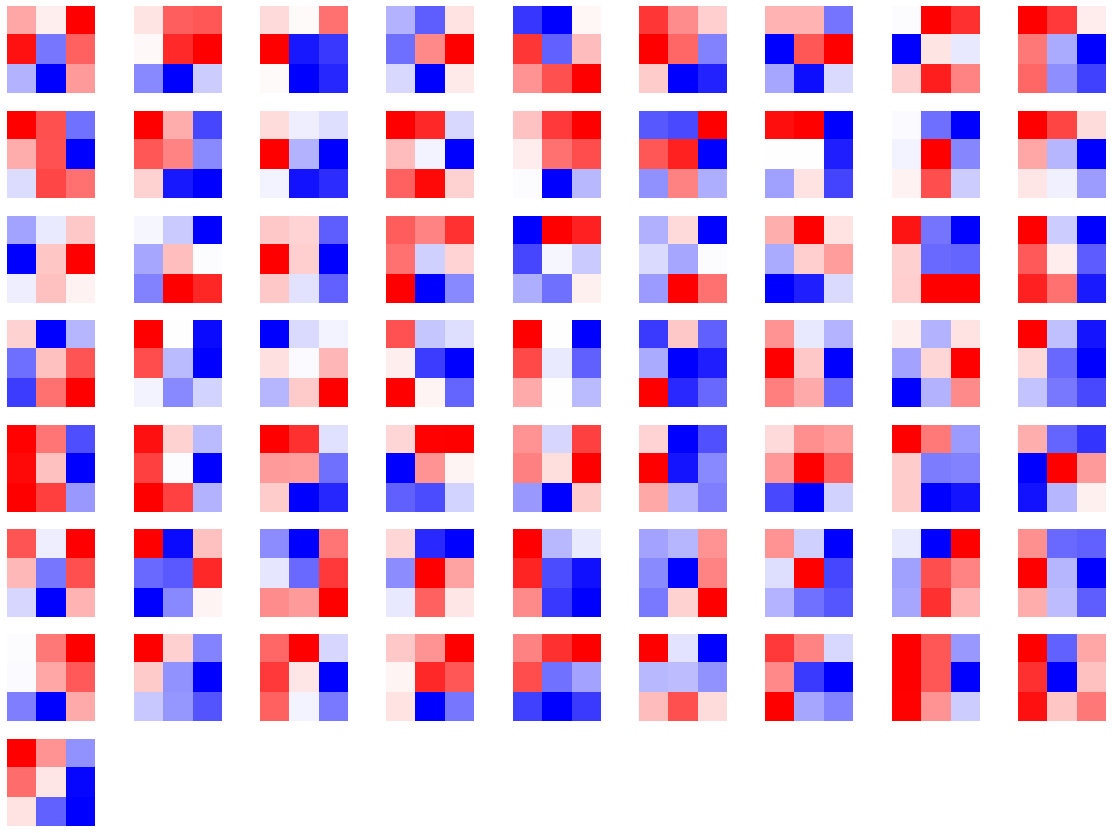

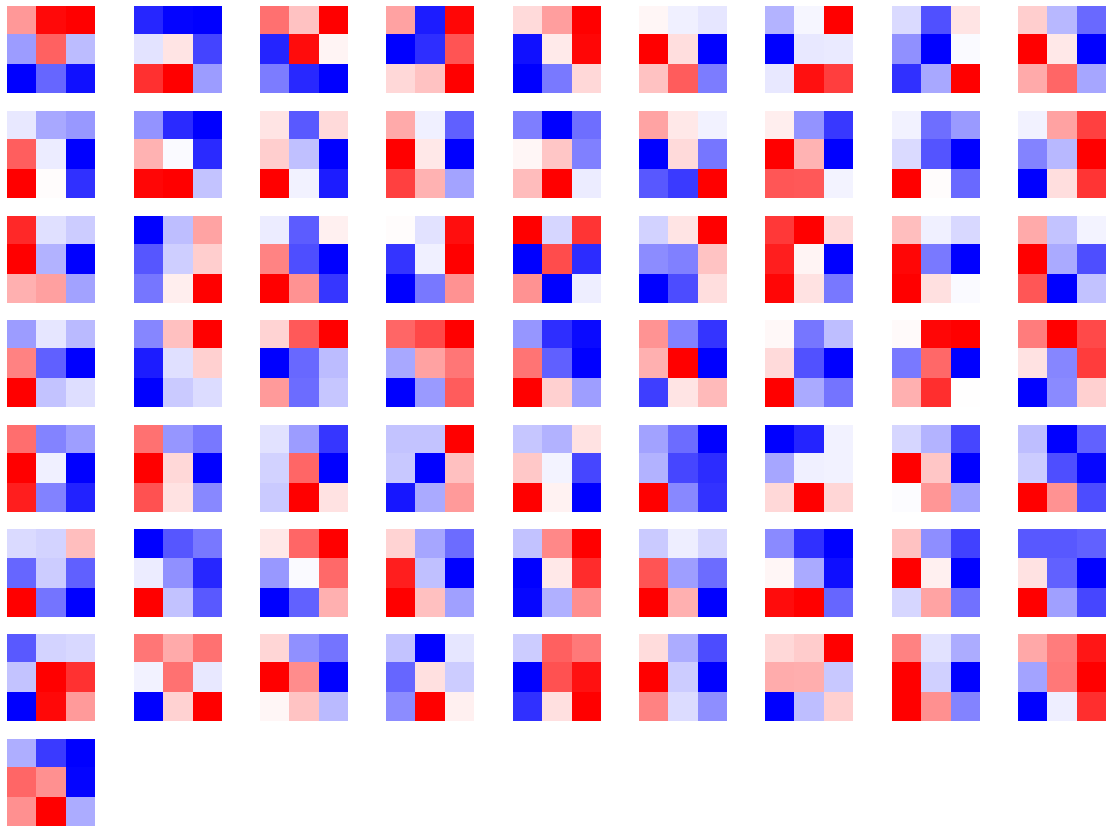

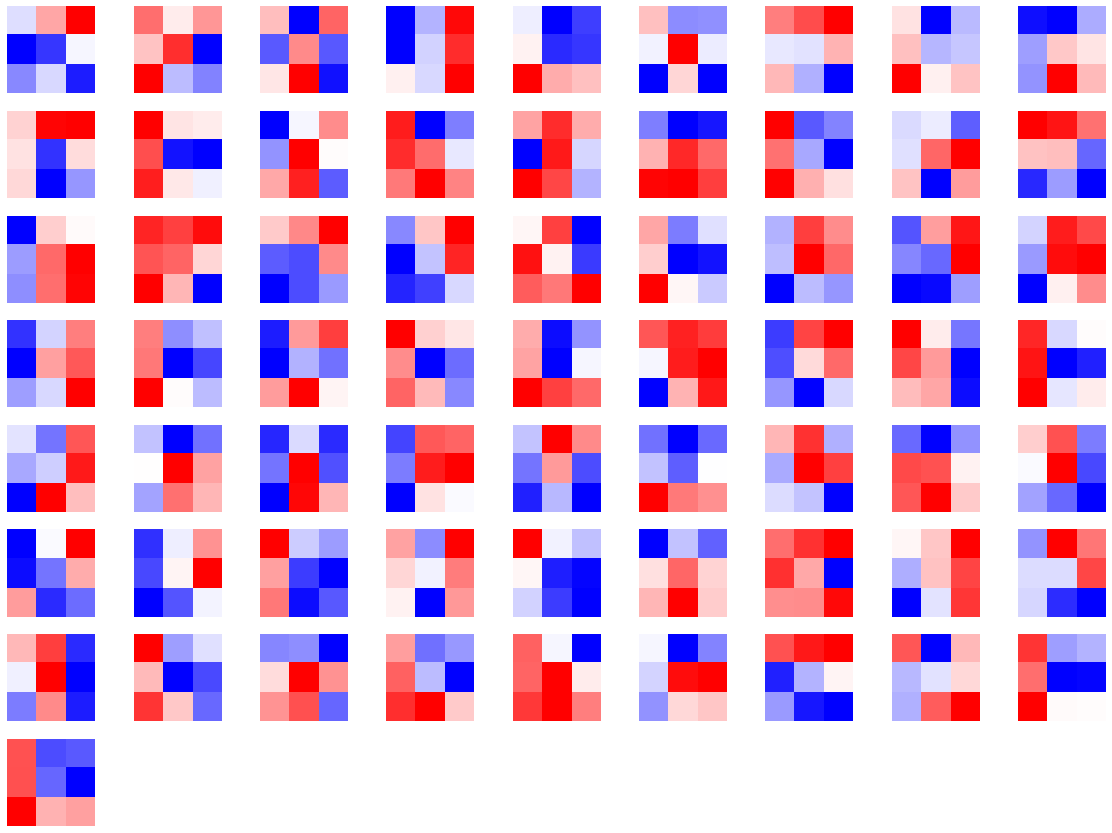

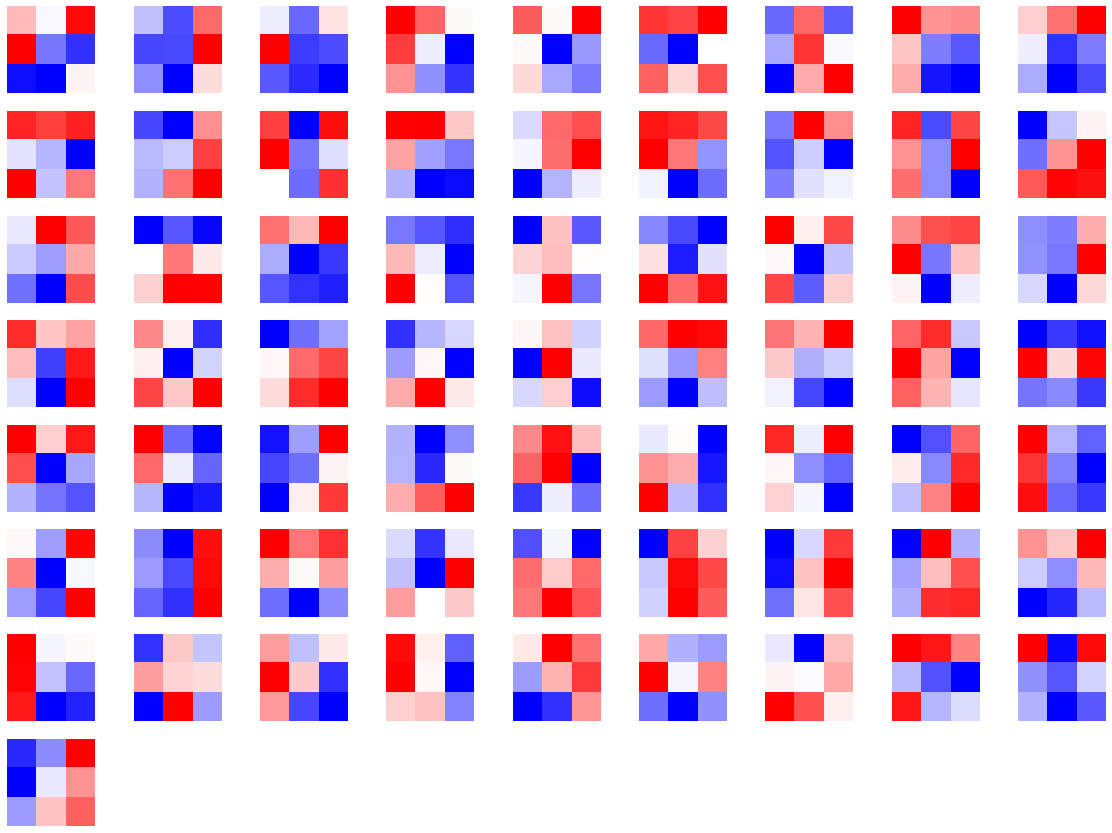

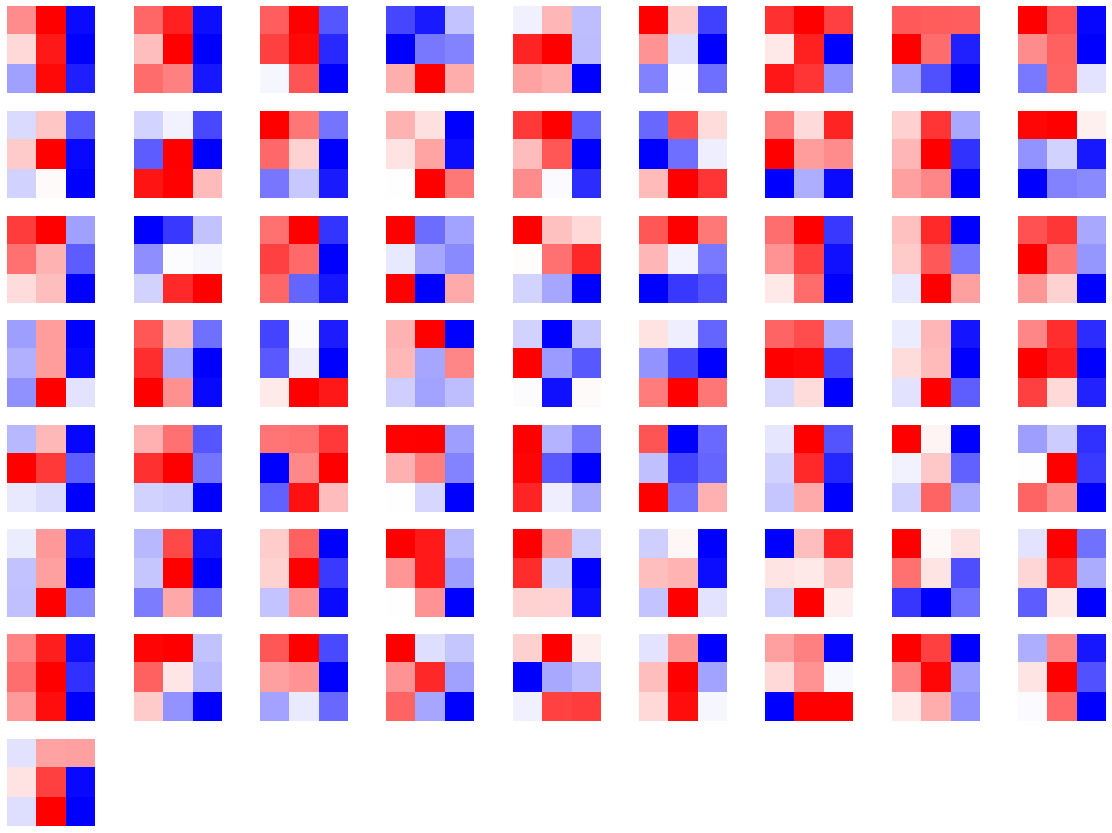

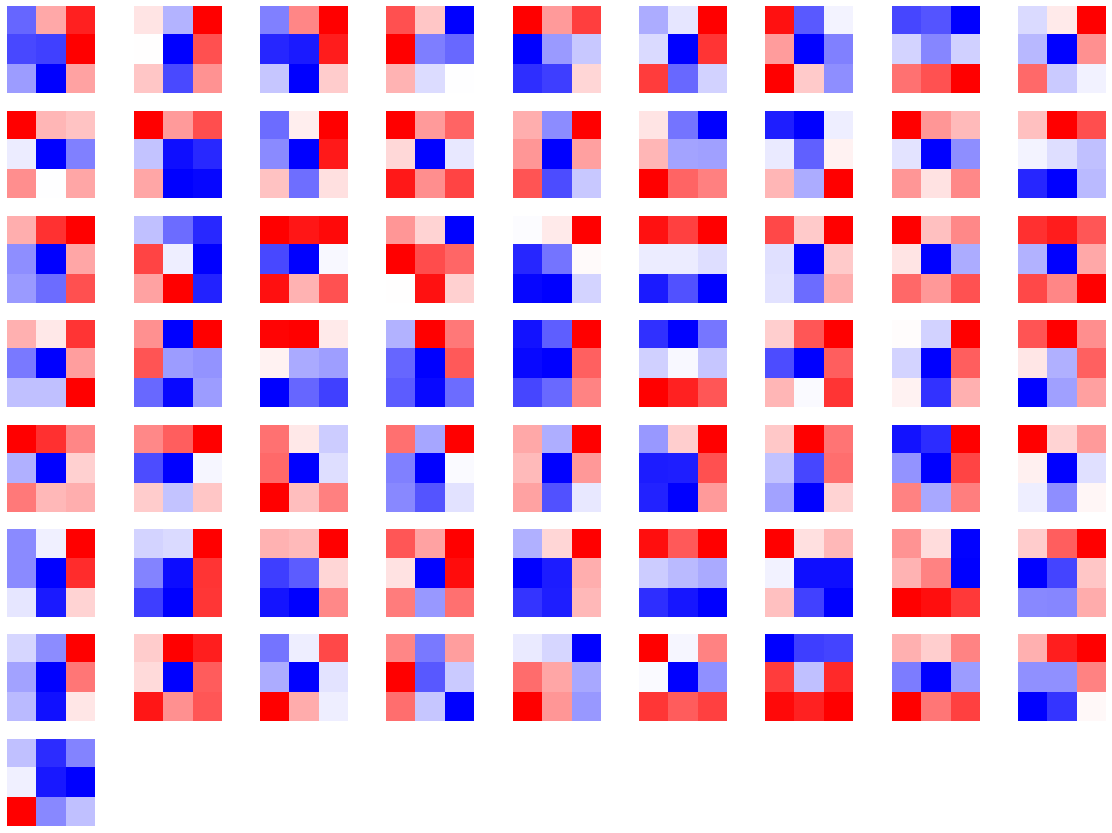

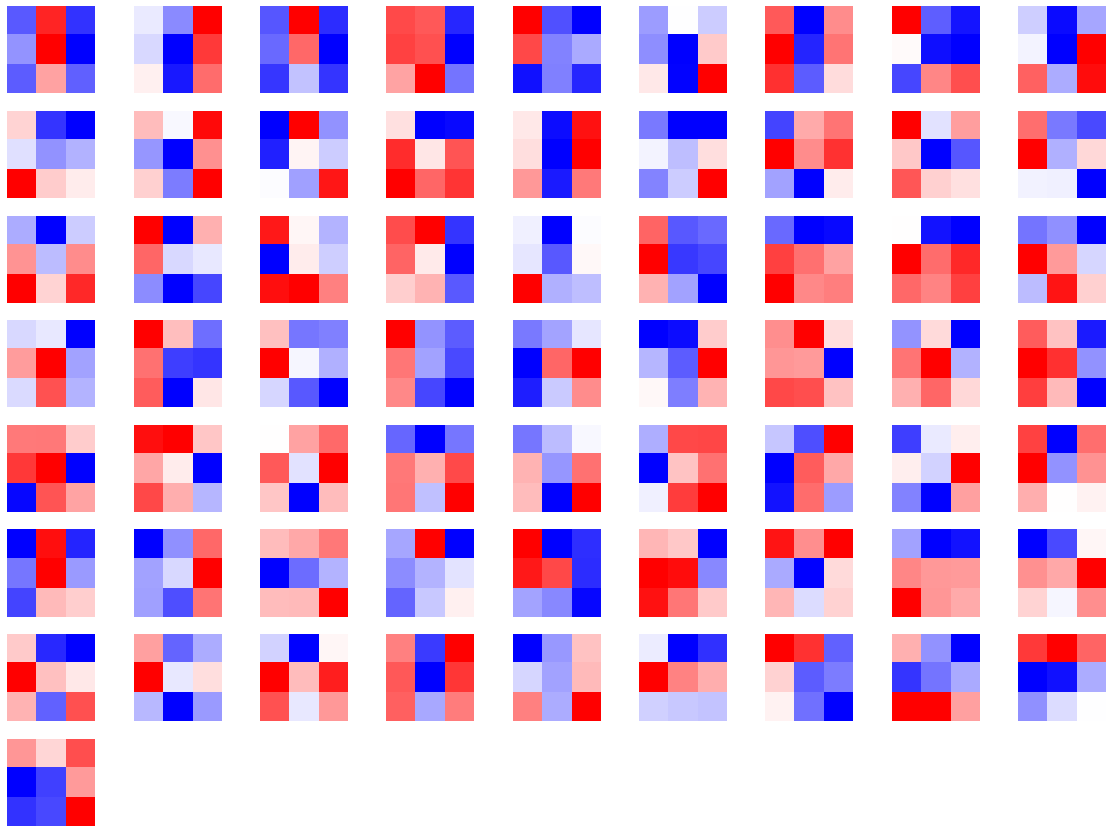

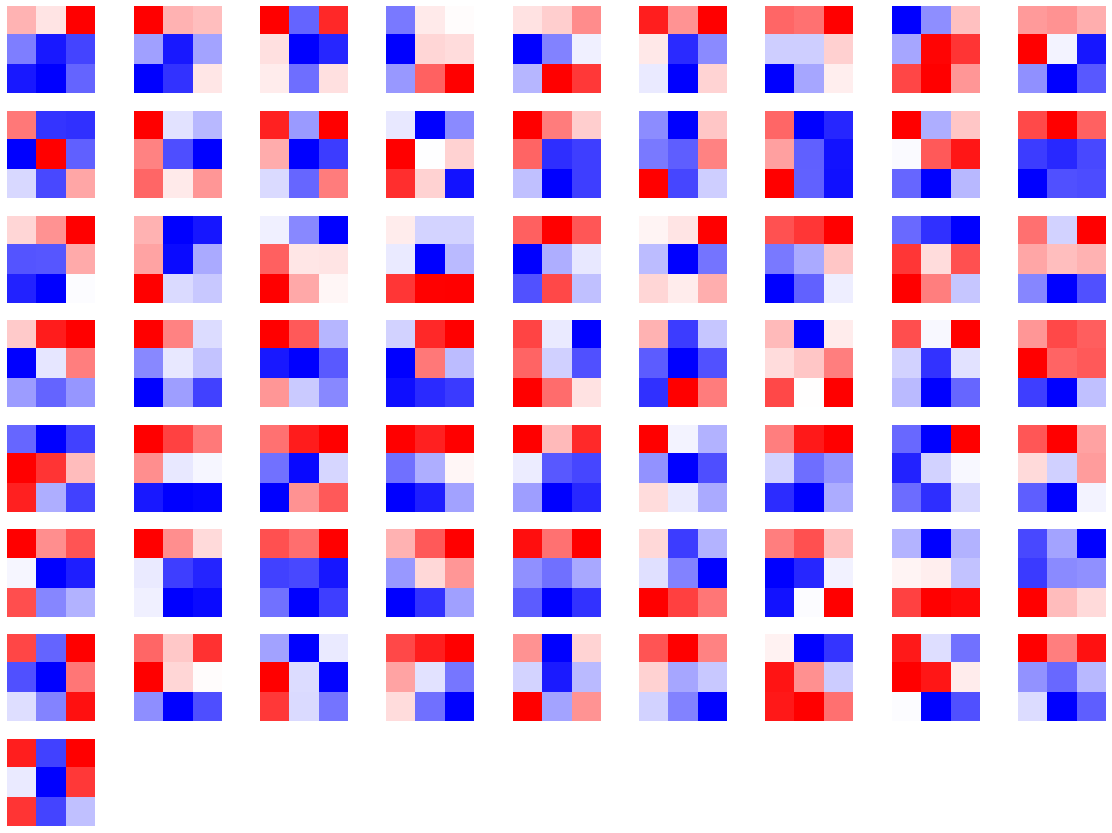

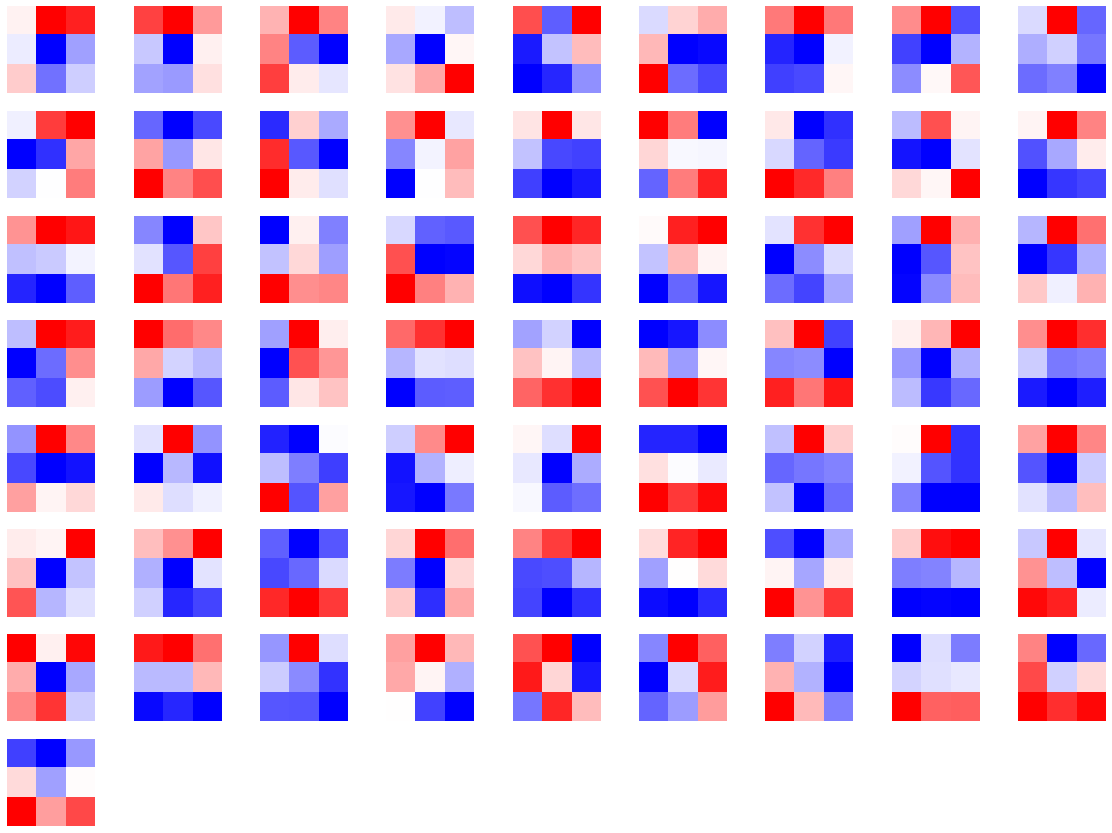

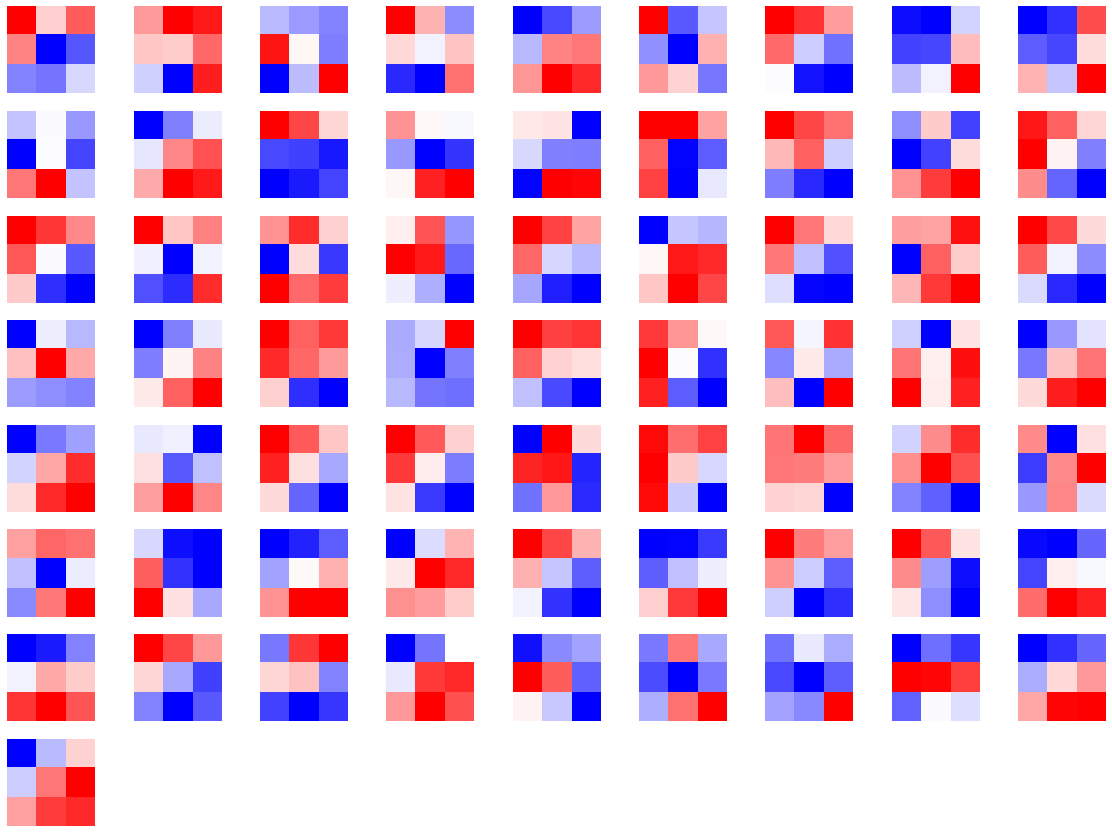

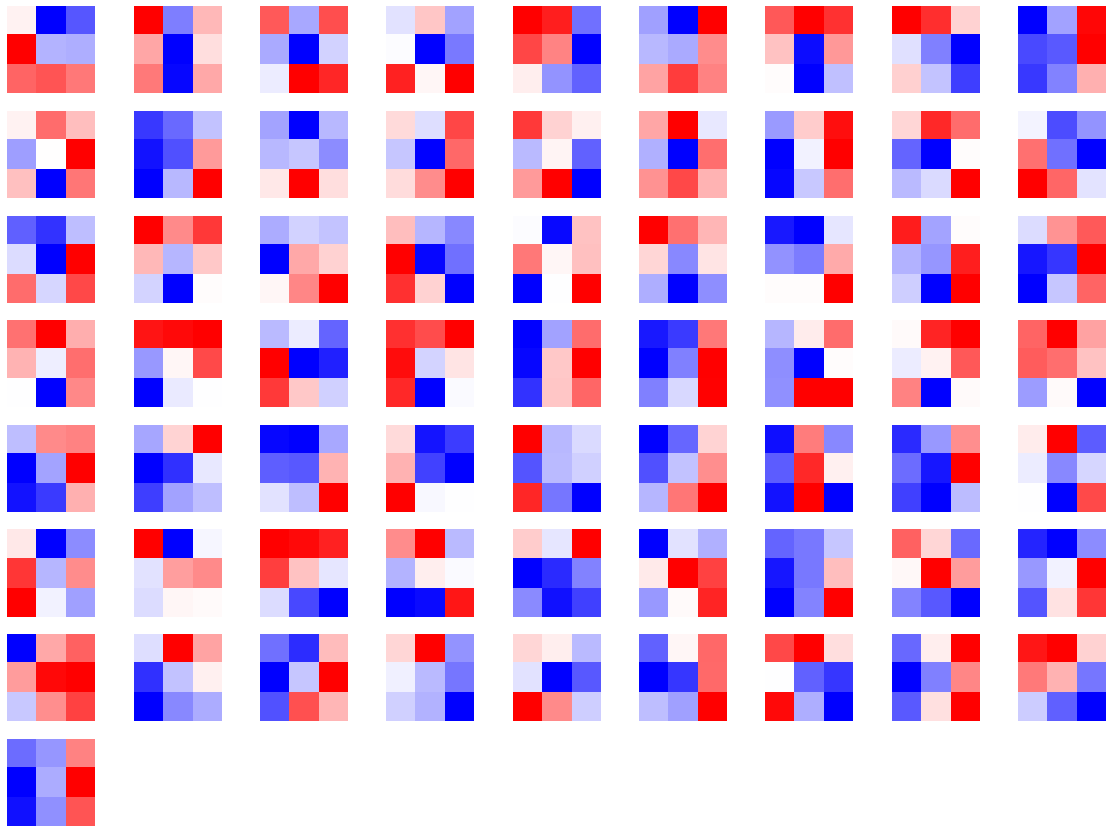

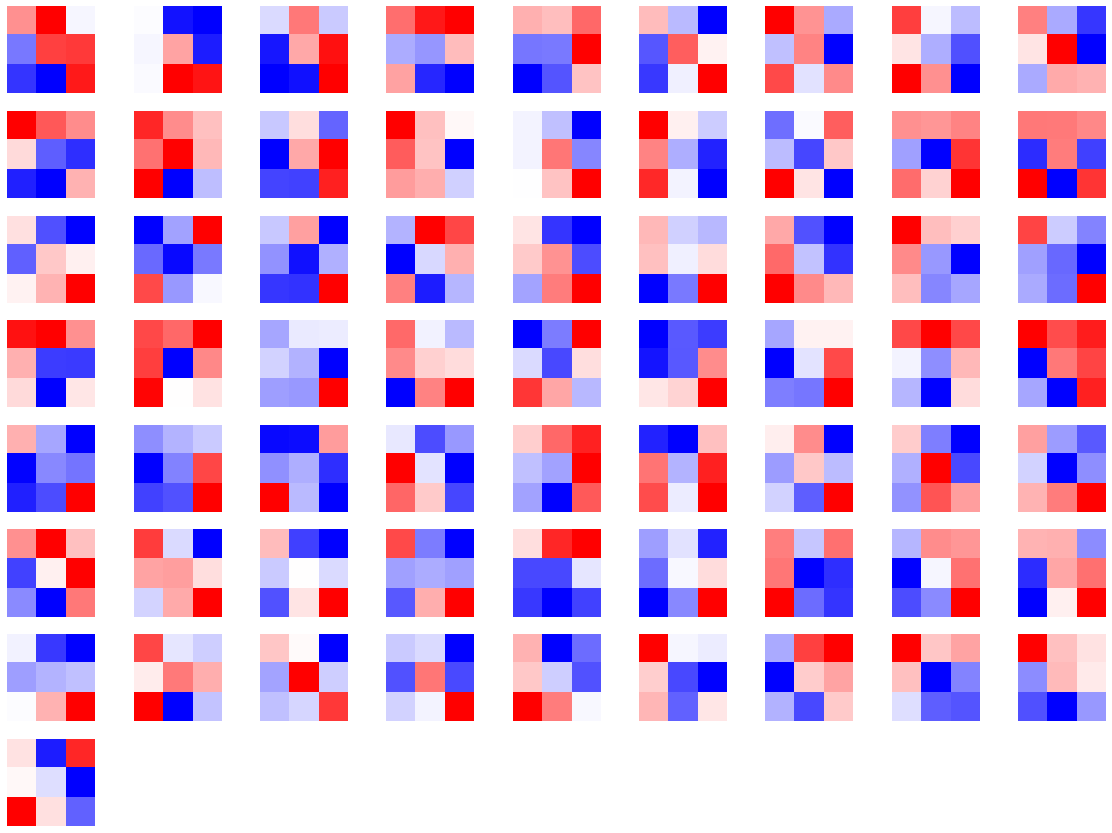

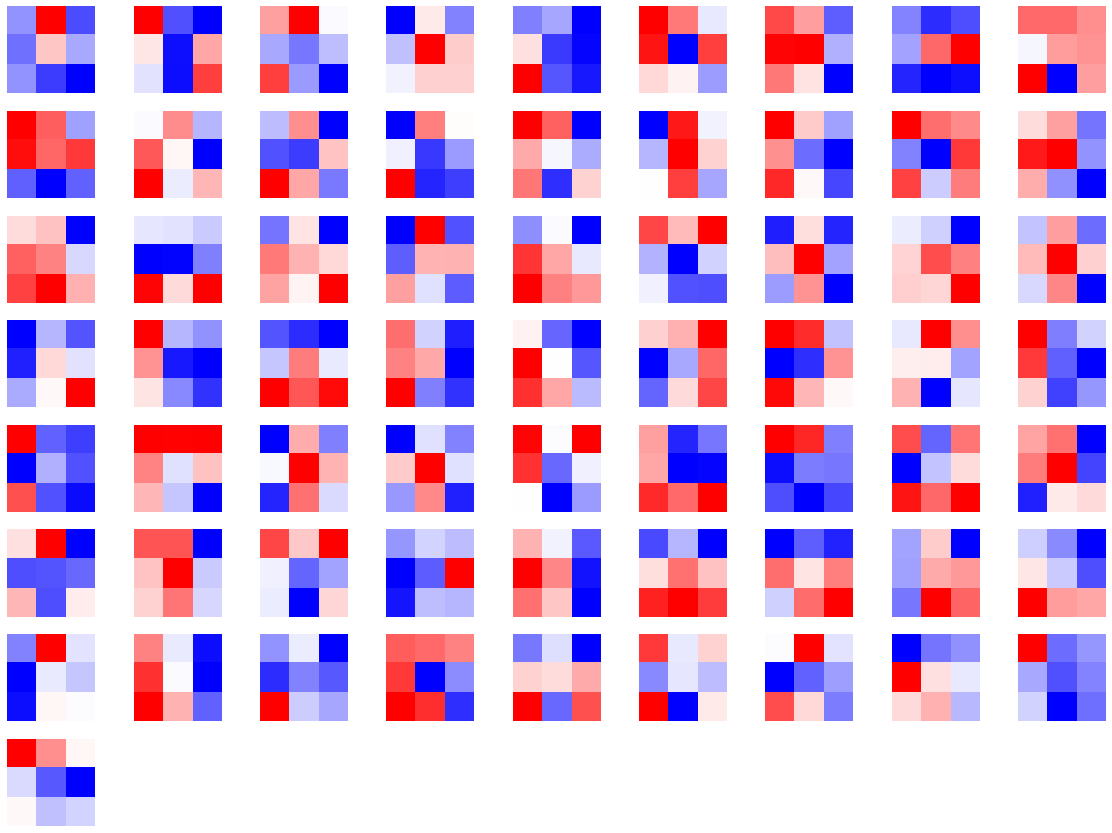

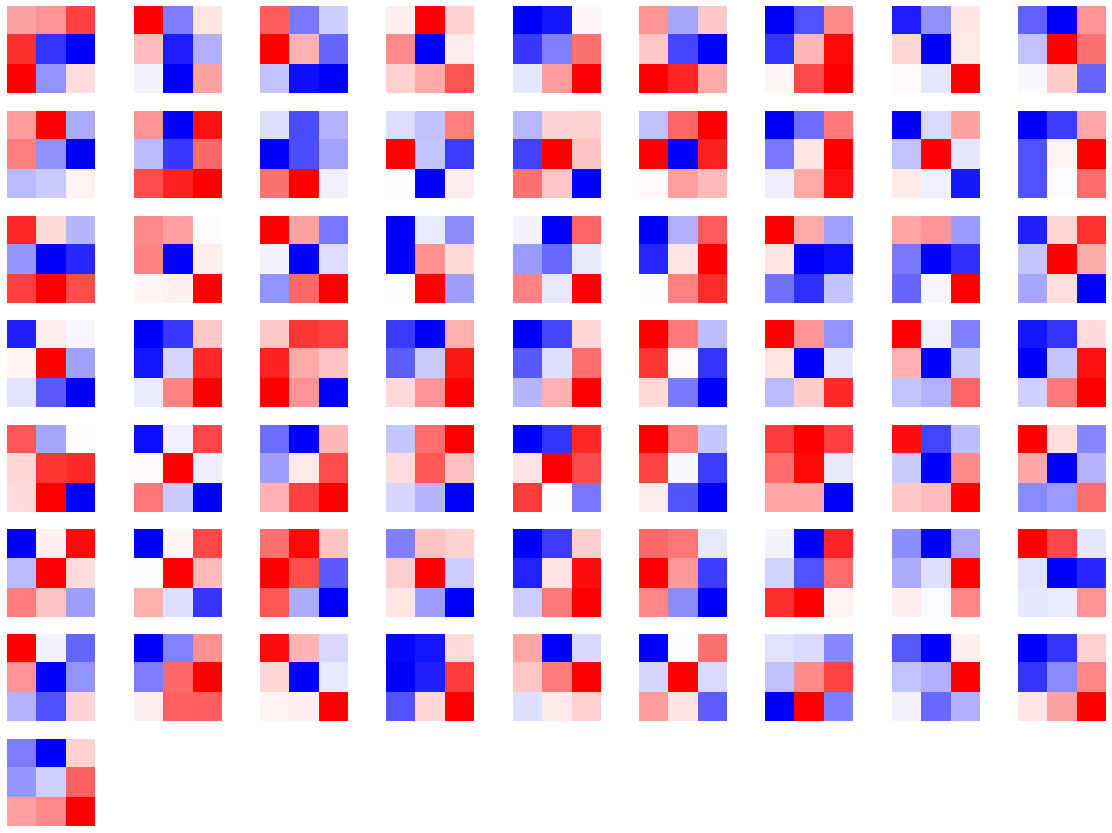

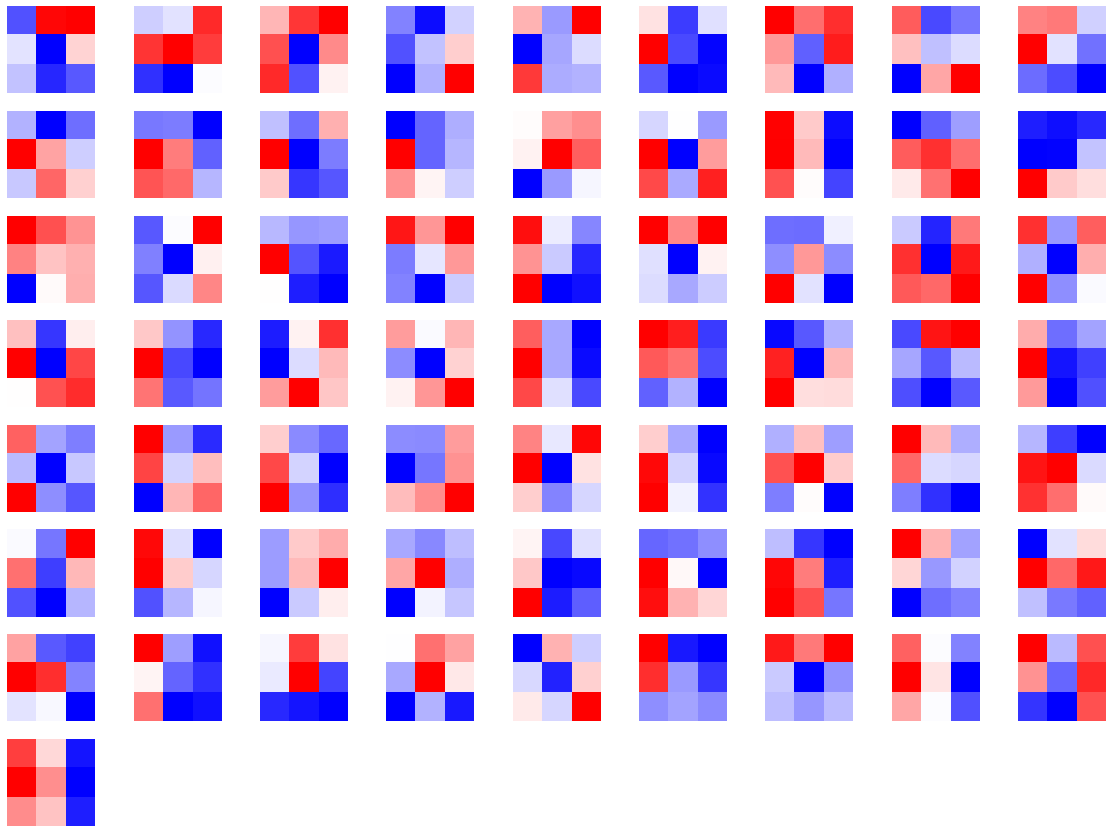

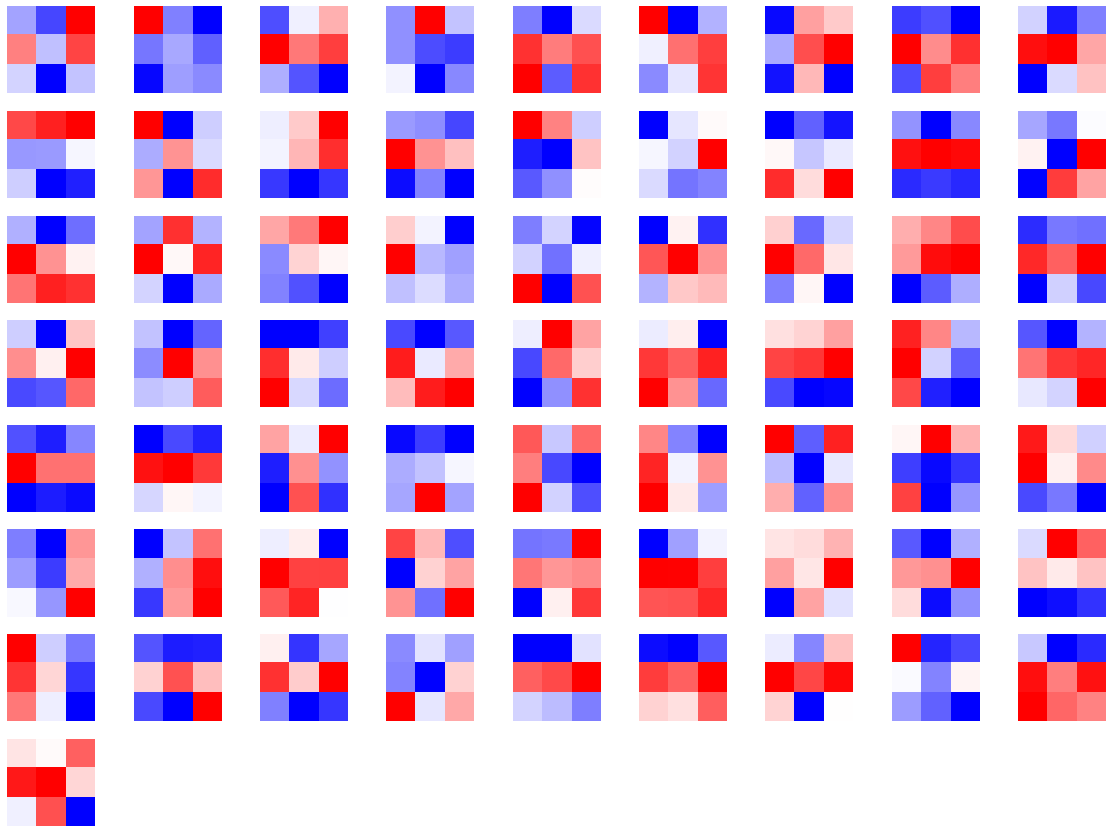

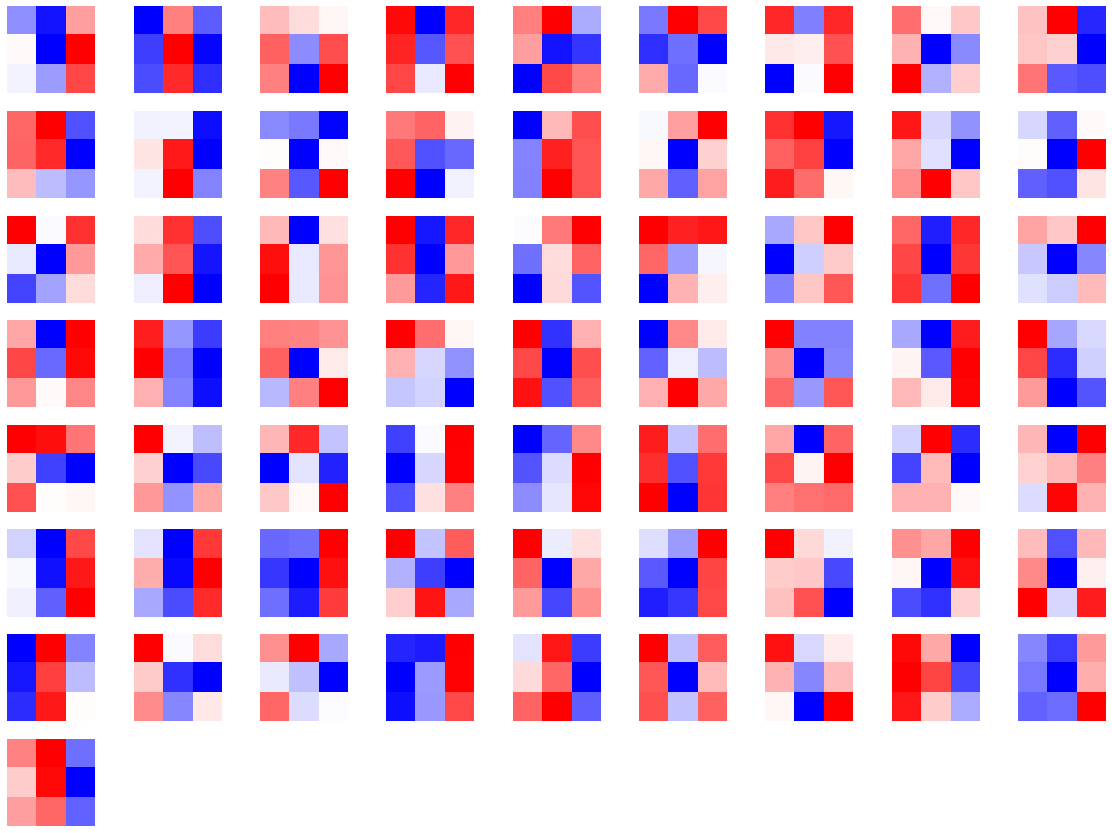

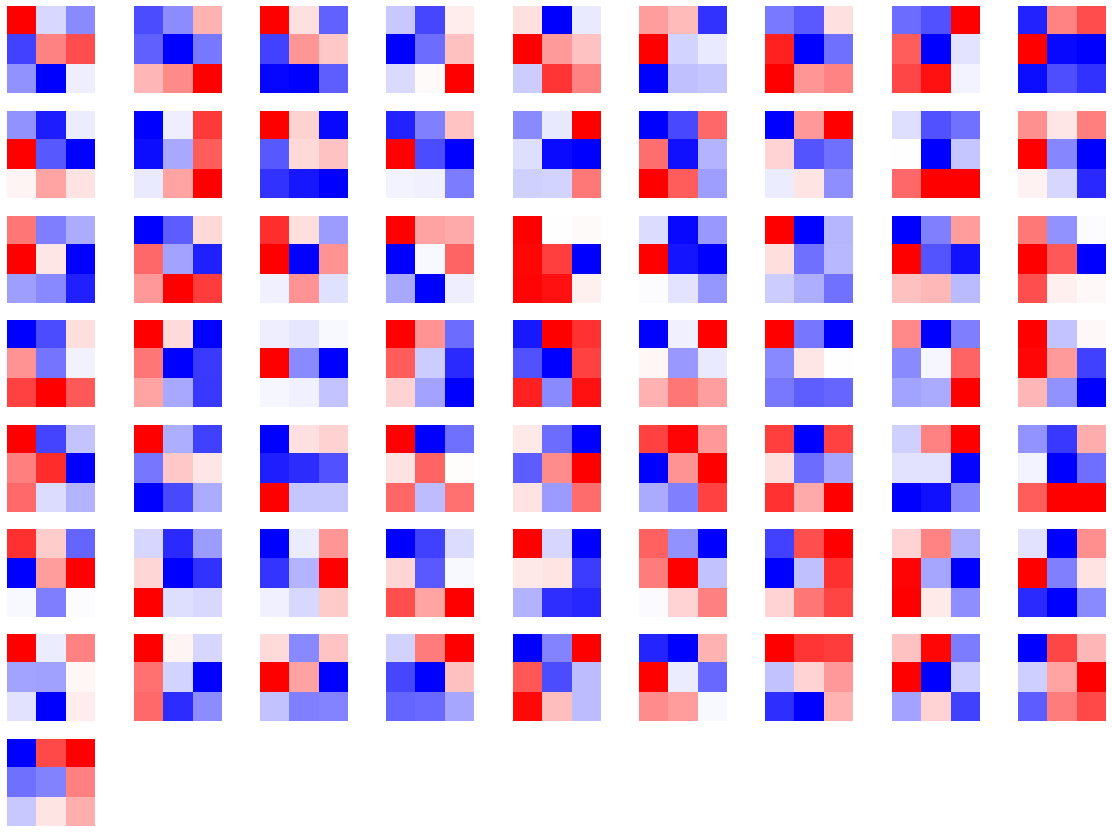

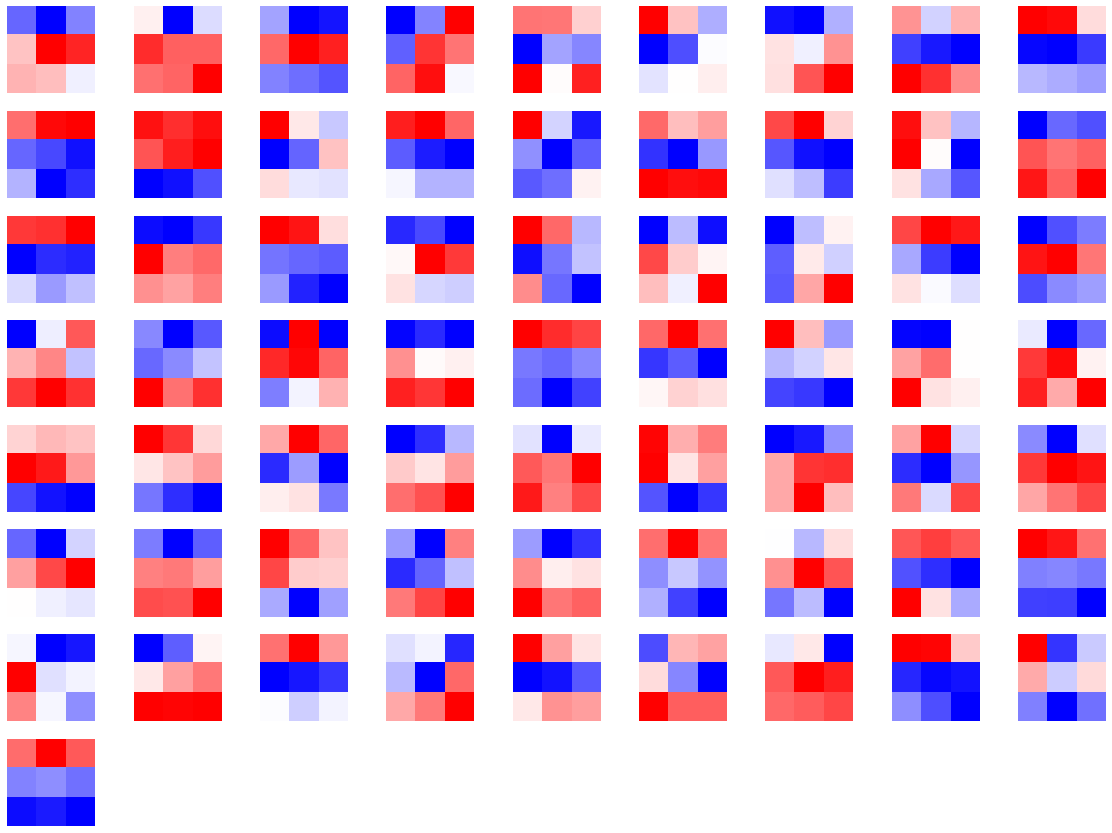

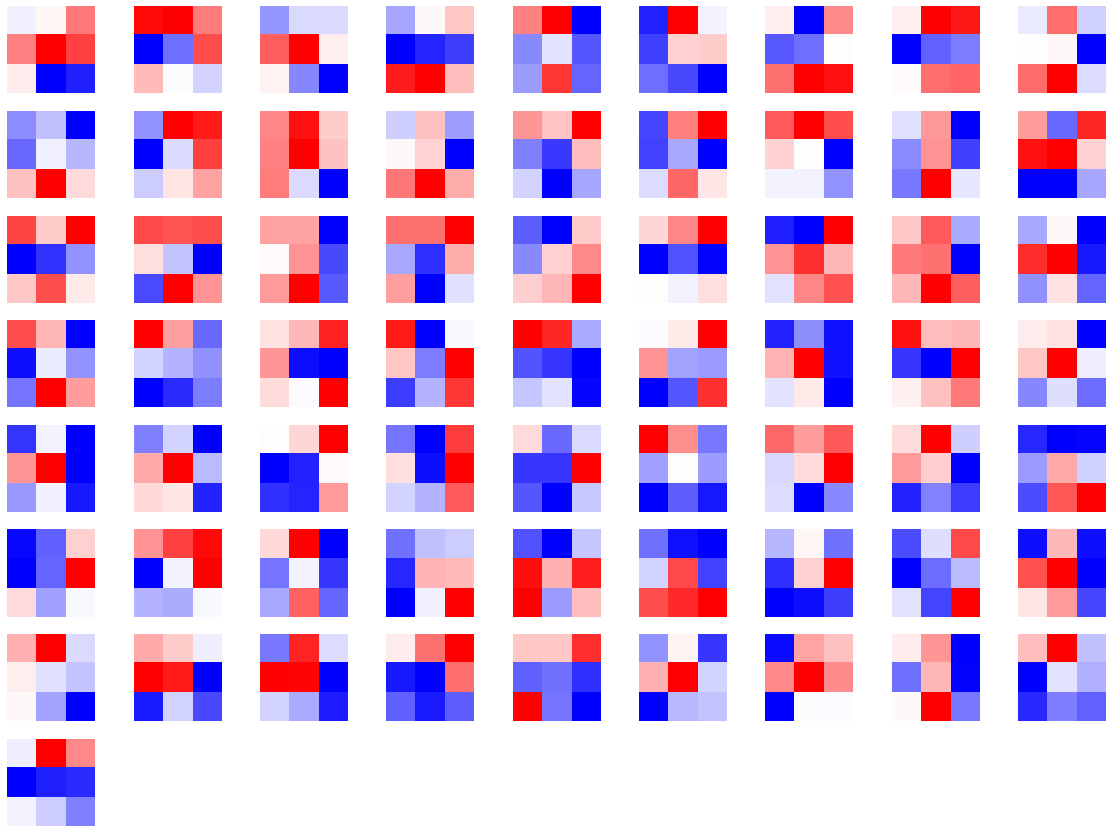

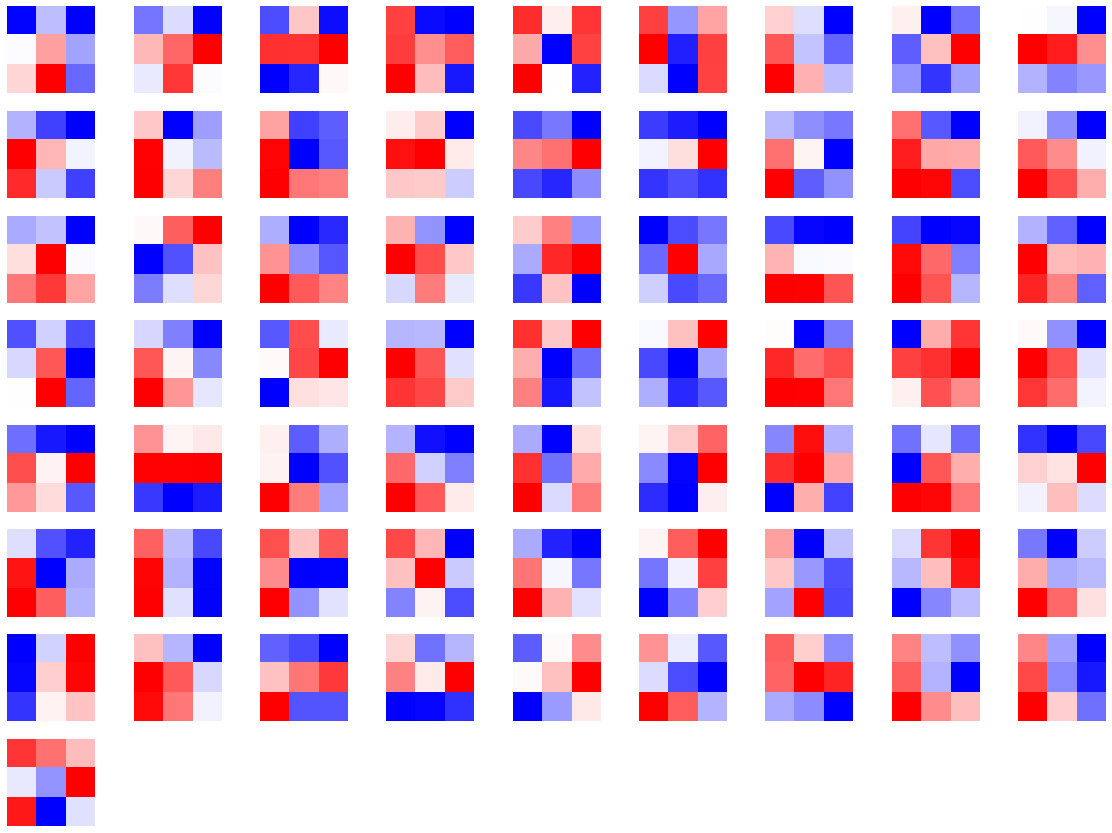

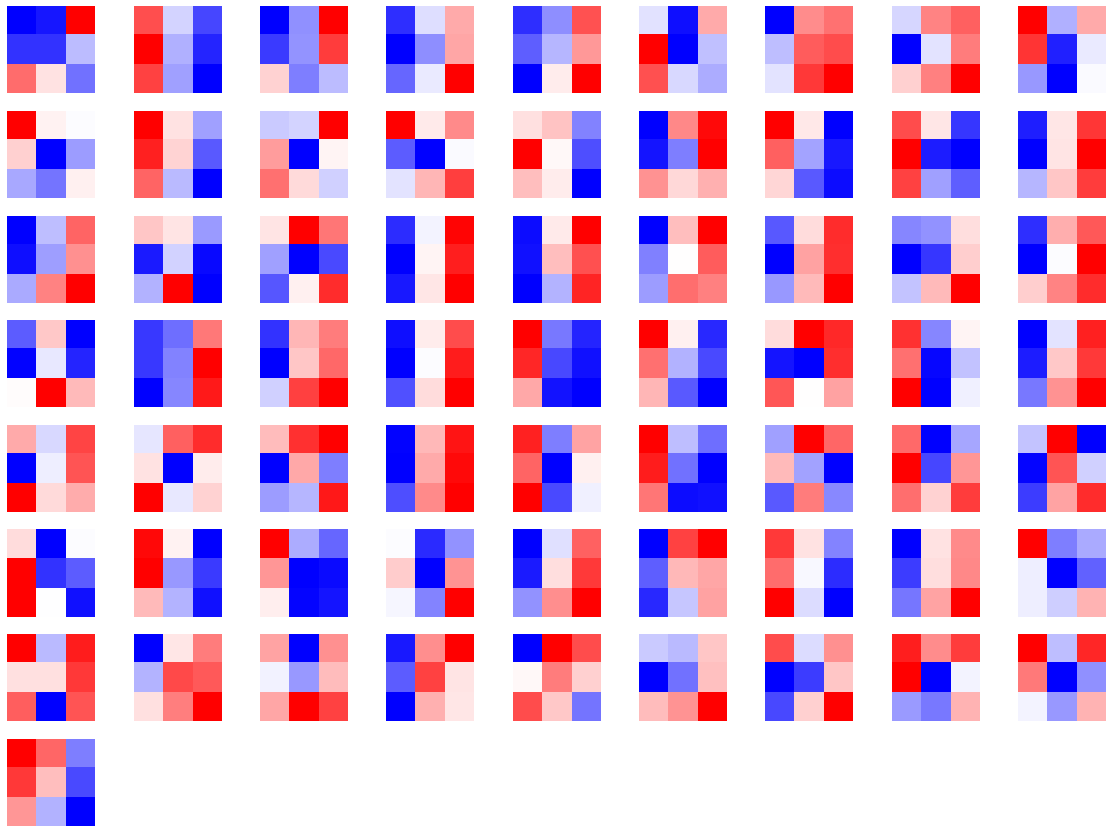

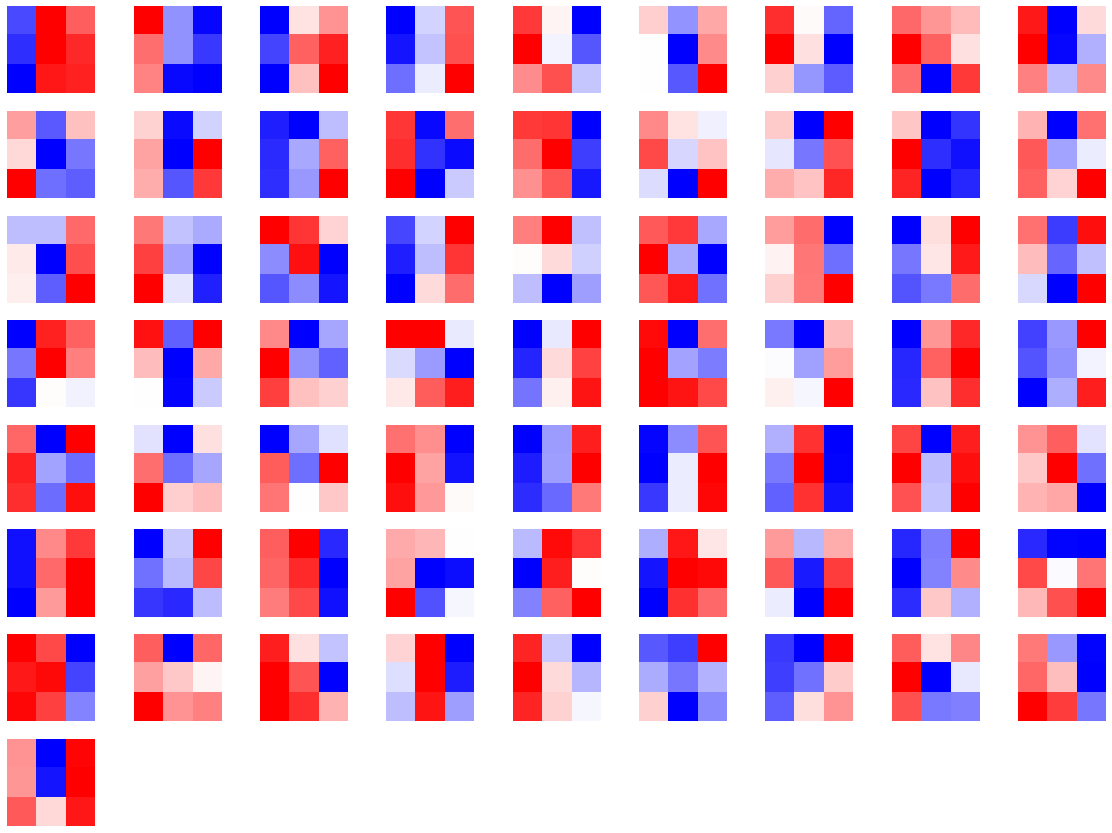

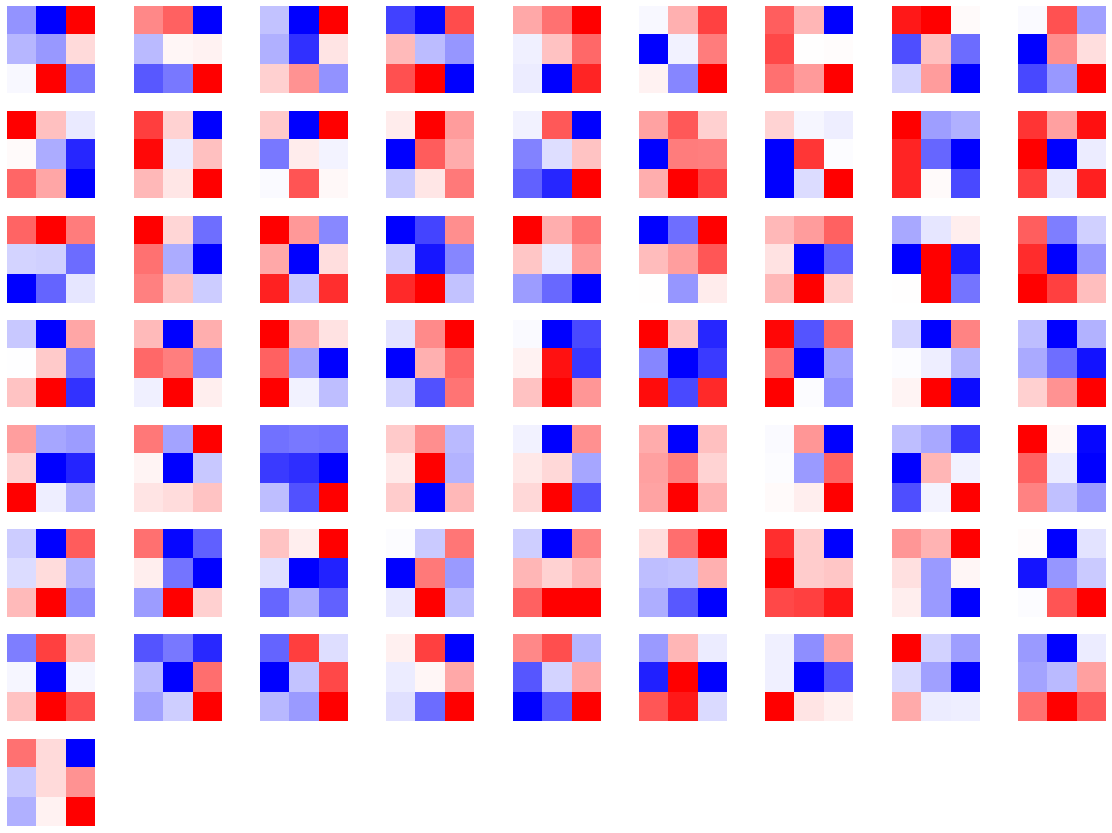

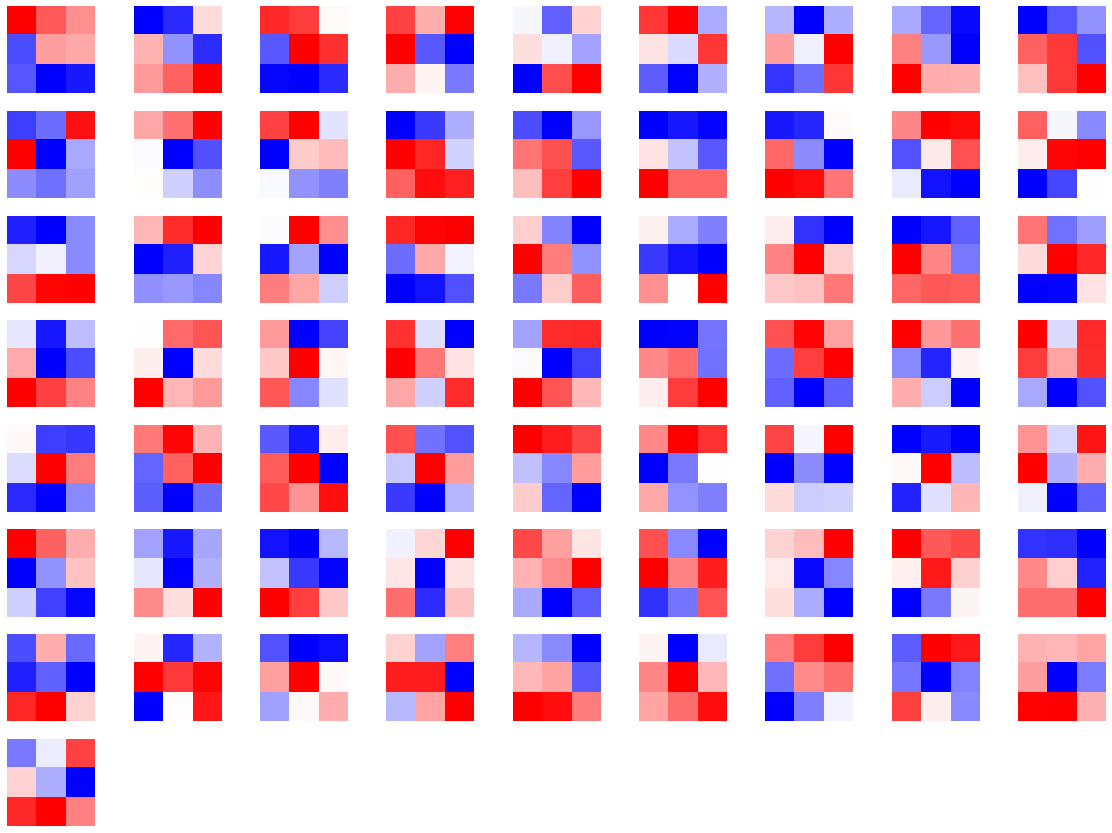

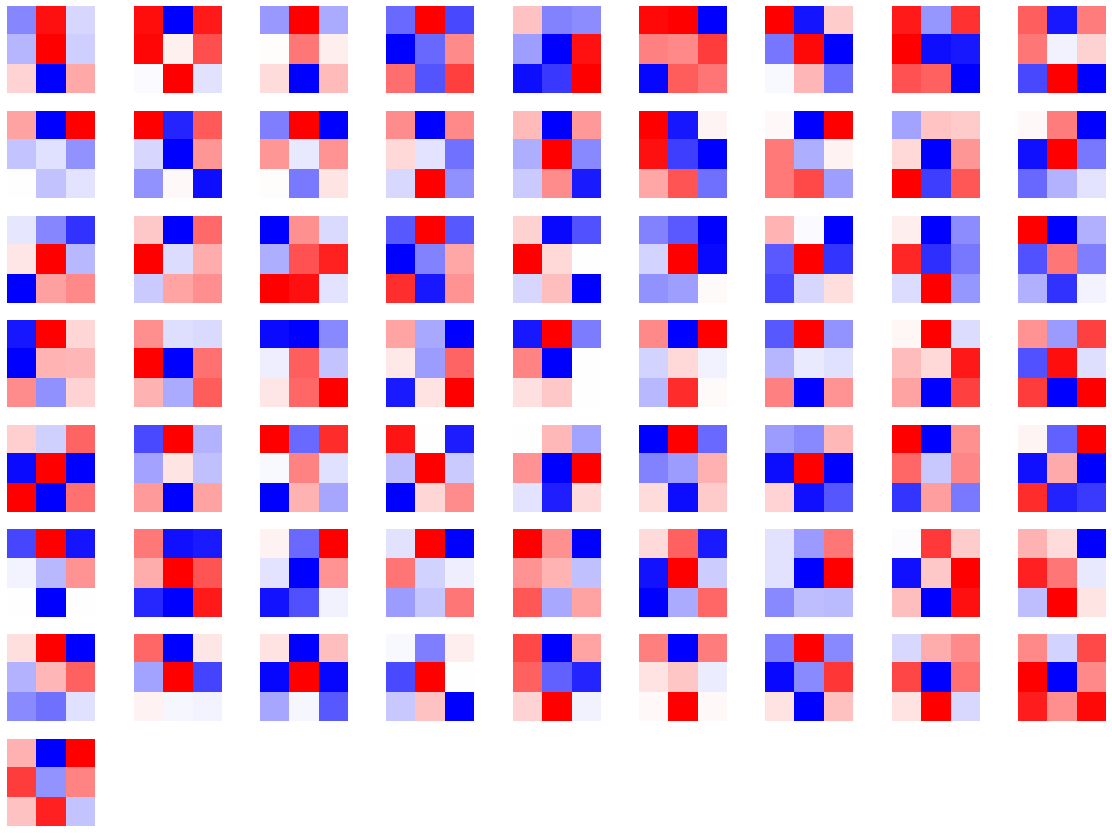

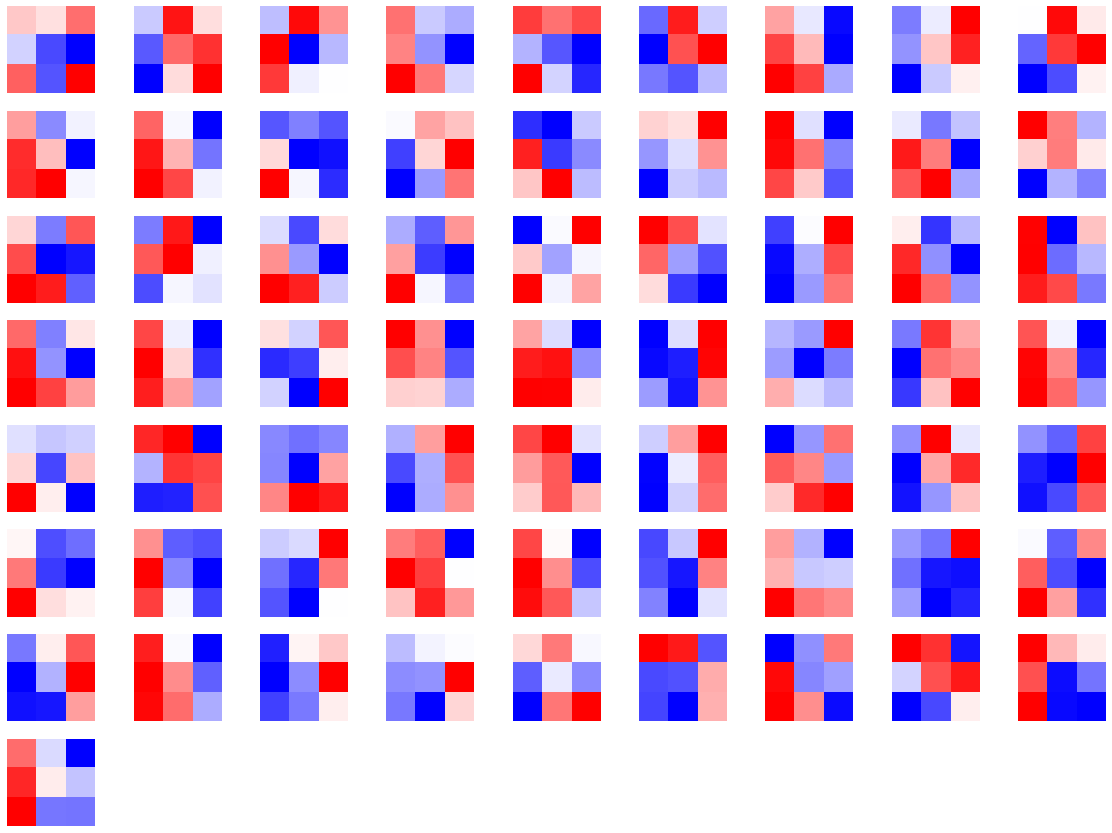

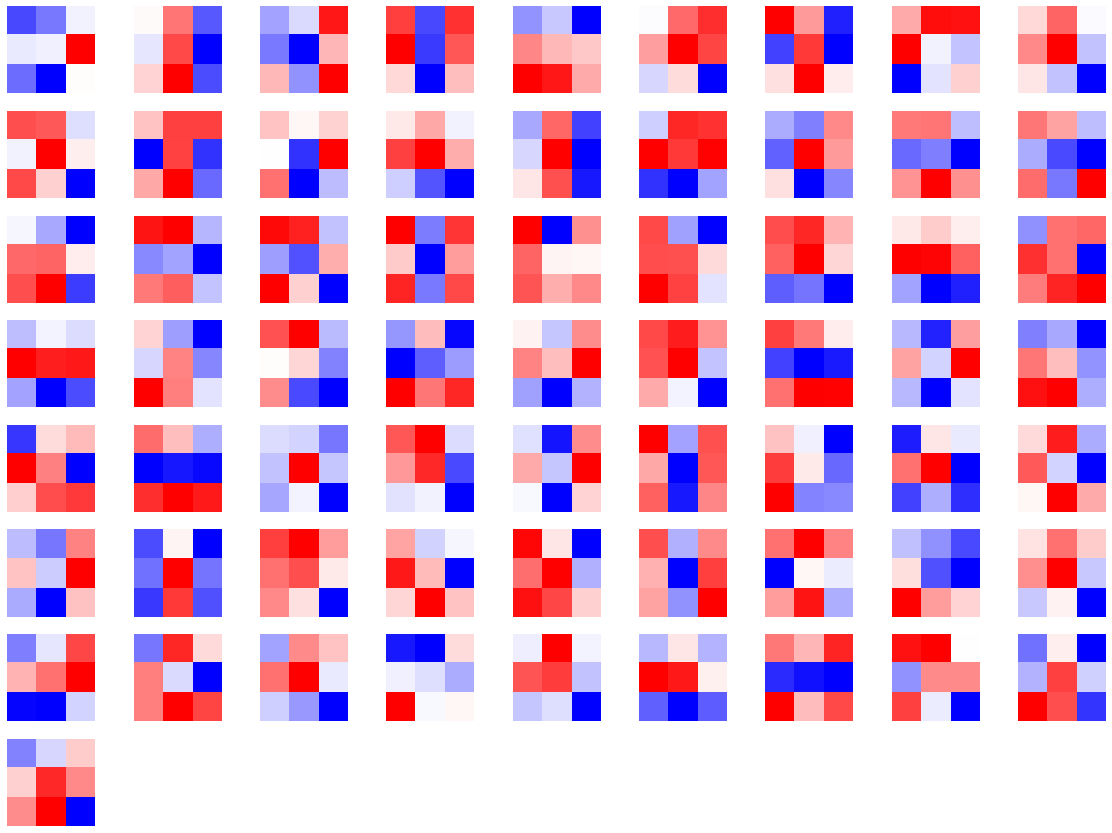

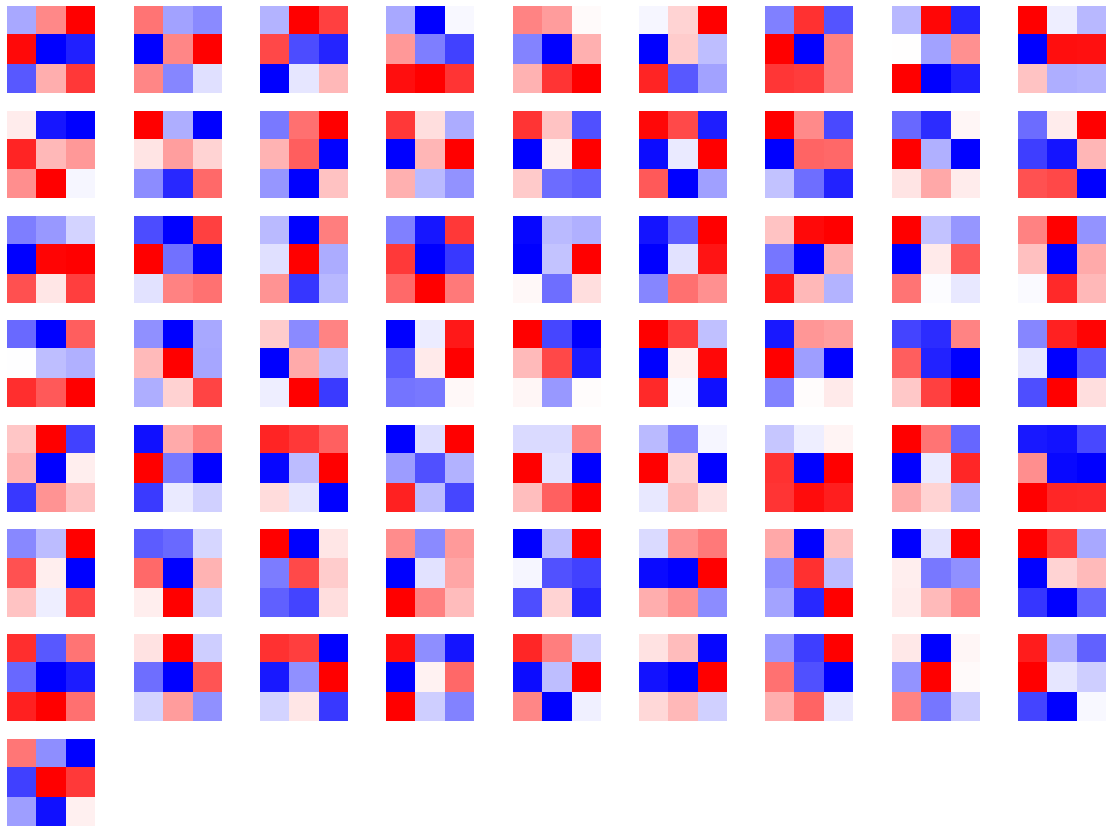

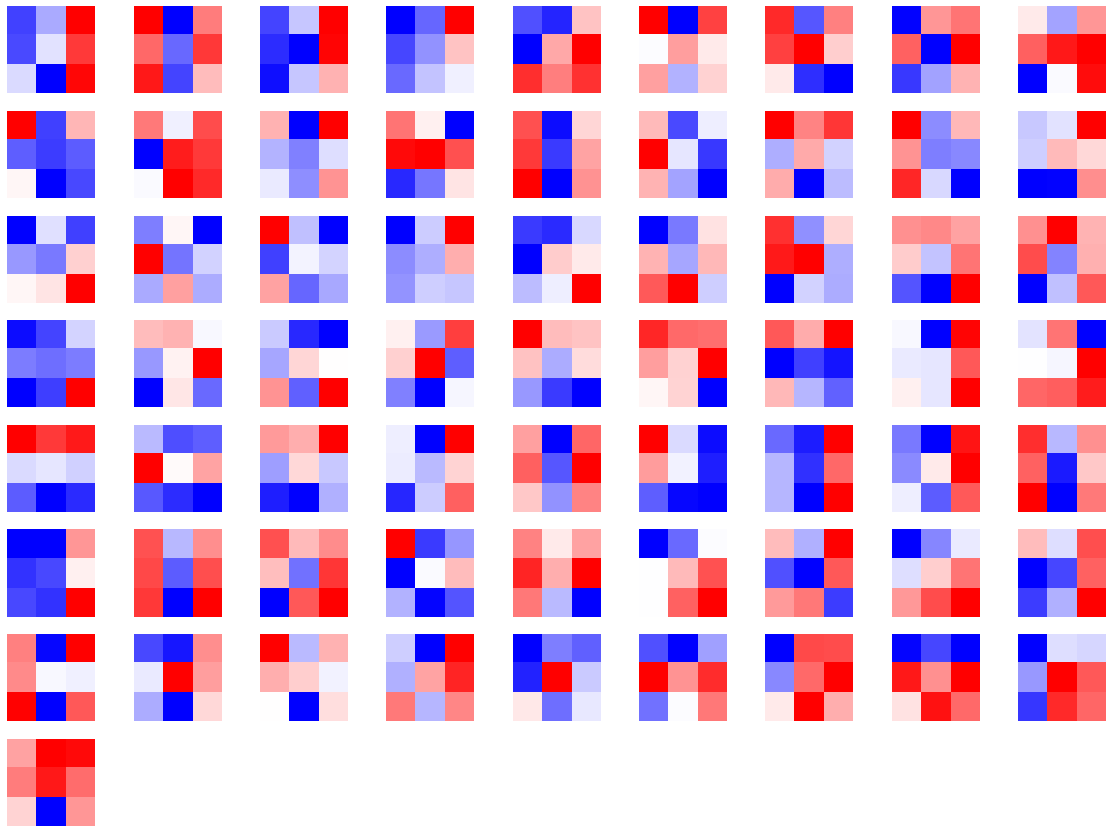

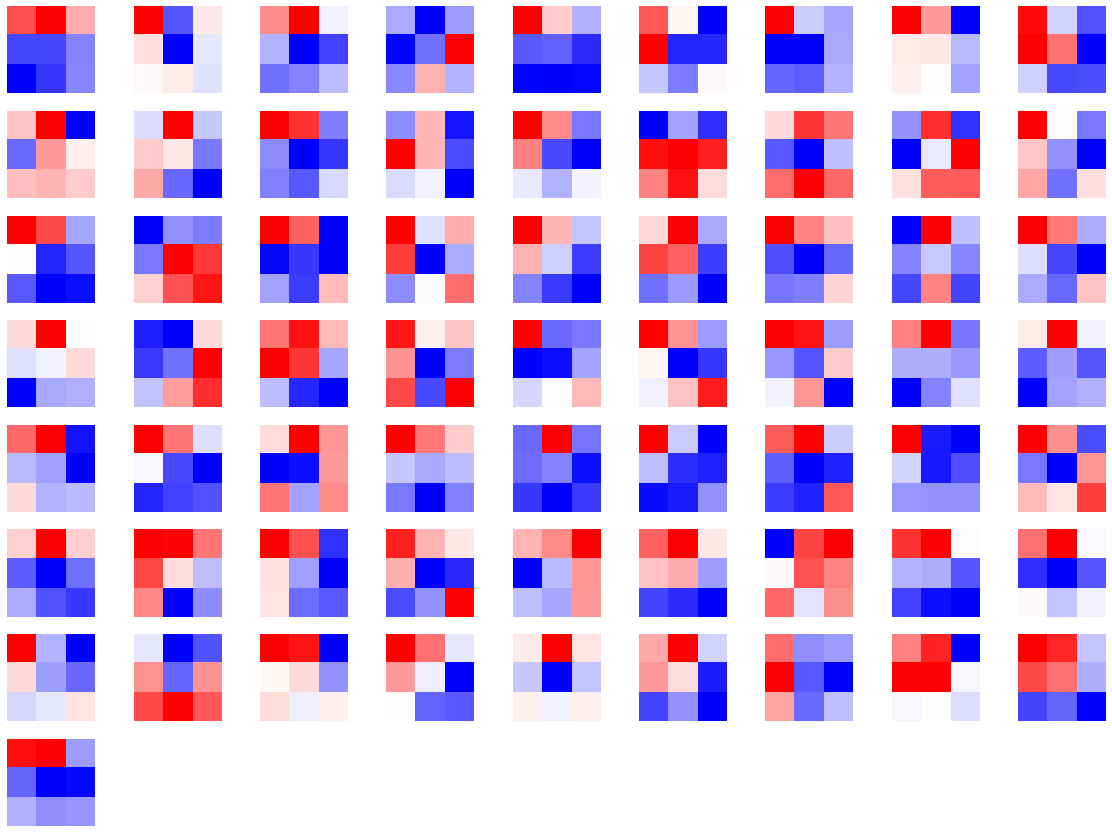

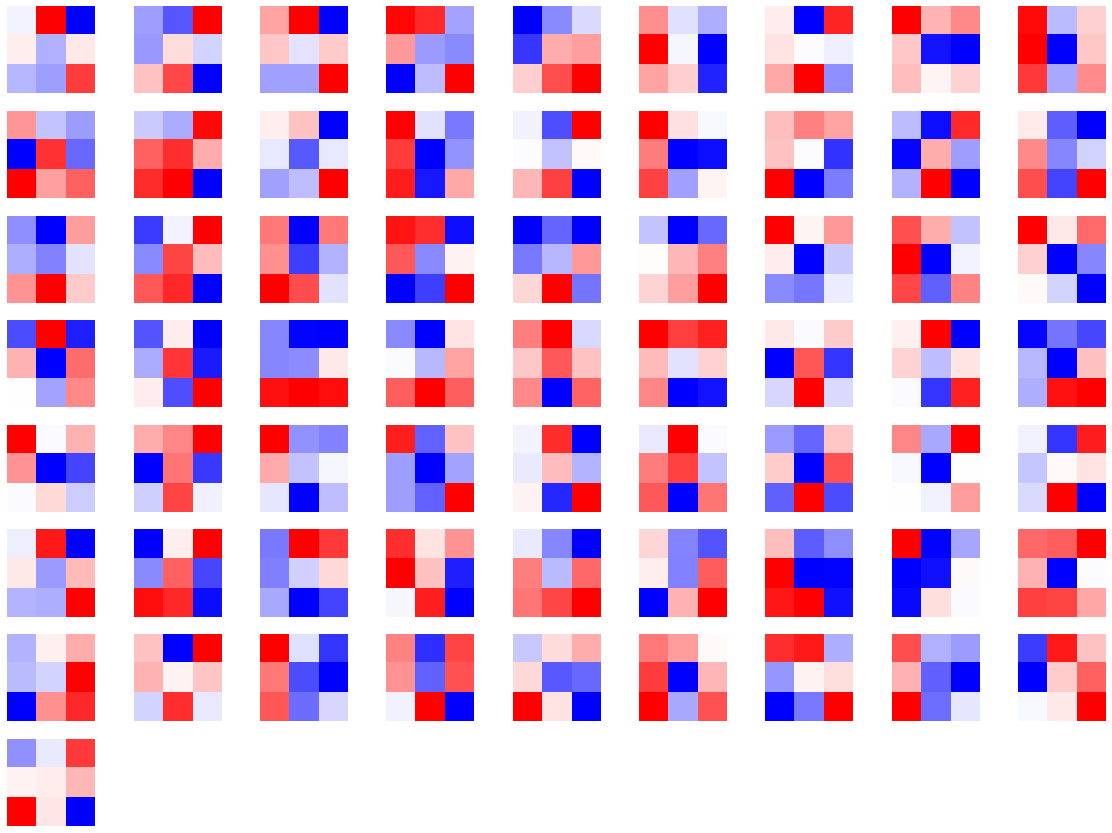

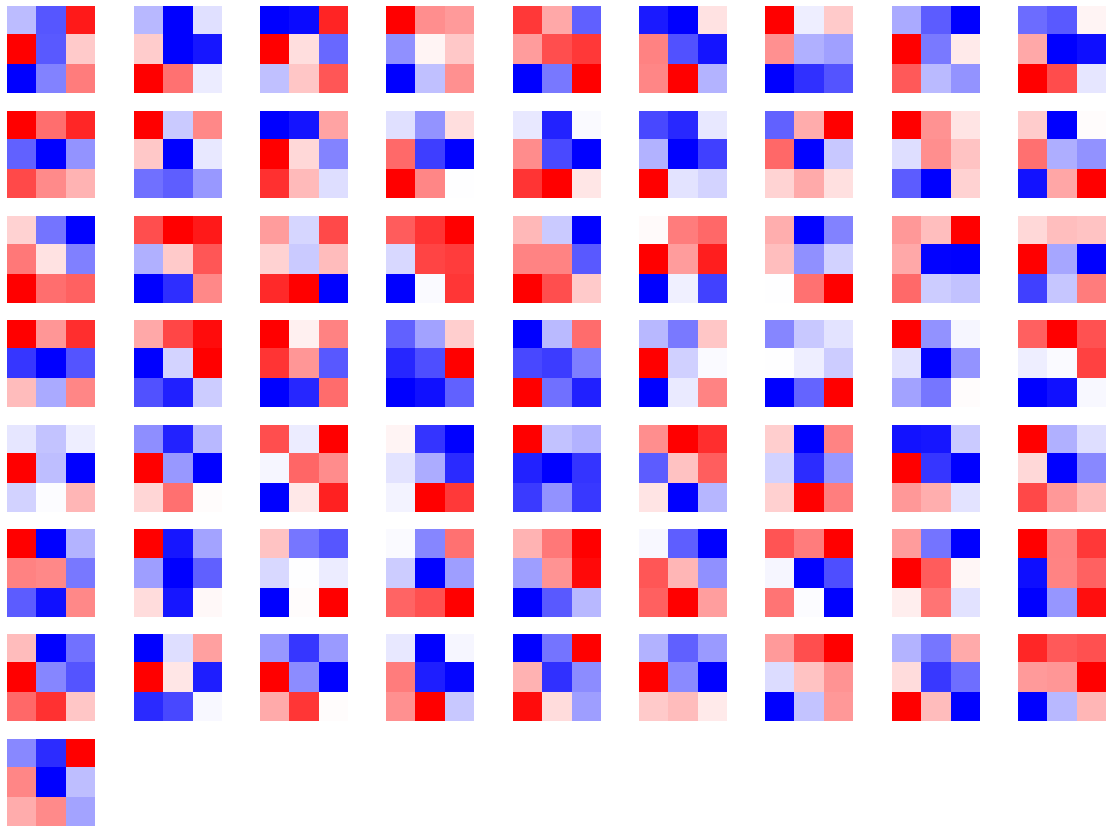

In [7]:
import matplotlib.pyplot as plt
conv1 = dict(model.features.named_children())['3']
kernel_set = conv1.weight.detach()
num = len(conv1.weight.detach())
print(kernel_set.shape)
for i in range(0,num):
    i_kernel = kernel_set[i]
    plt.figure(figsize=(20, 17))
    if (len(i_kernel)) > 1:
        for idx, filer in enumerate(i_kernel):
            plt.subplot(9, 9, idx+1) 
            plt.axis('off')
            plt.imshow(filer[ :, :].detach(),cmap='bwr')

### 7.2.2 CNN特征图可视化方法

与卷积核相对应，输入的原始图像经过每次卷积层得到的数据称为特征图，可视化卷积核是为了看模型提取哪些特征，可视化特征图则是为了看模型提取到的特征是什么样子的。

获取特征图的方法有很多种，可以从输入开始，逐层做前向传播，直到想要的特征图处将其返回。尽管这种方法可行，但是有些麻烦了。在PyTorch中，提供了一个专用的接口使得网络在前向传播过程中能够获取到特征图，这个接口的名称非常形象，叫做hook。可以想象这样的场景，数据通过网络向前传播，网络某一层我们预先设置了一个钩子，数据传播过后钩子上会留下数据在这一层的样子，读取钩子的信息就是这一层的特征图。具体实现如下：

In [4]:
class Hook(object):
    def __init__(self):
        self.module_name = []
        self.features_in_hook = []
        self.features_out_hook = []

    def __call__(self,module, fea_in, fea_out):
        print("hooker working", self)
        self.module_name.append(module.__class__)
        self.features_in_hook.append(fea_in)
        self.features_out_hook.append(fea_out)
        return None
    

def plot_feature(model, idx, inputs):
    hh = Hook()
    model.features[idx].register_forward_hook(hh)
    
    # forward_model(model,False)
    model.eval()
    _ = model(inputs)
    print(hh.module_name)
    print((hh.features_in_hook[0][0].shape))
    print((hh.features_out_hook[0].shape))
    
    out1 = hh.features_out_hook[0]

    total_ft  = out1.shape[1]
    first_item = out1[0].cpu().clone()    

    plt.figure(figsize=(20, 17))
    

    for ftidx in range(total_ft):
        if ftidx > 99:
            break
        ft = first_item[ftidx]
        plt.subplot(10, 10, ftidx+1) 
        
        plt.axis('off')
        #plt.imshow(ft[ :, :].detach(),cmap='gray')
        plt.imshow(ft[ :, :].detach())

这里我们首先实现了一个hook类，之后在plot_feature函数中，将该hook类的对象注册到要进行可视化的网络的某层中。model在进行前向传播的时候会调用hook的__call__函数，我们也就是在那里存储了当前层的输入和输出。这里的features_out_hook 是一个list，每次前向传播一次，都是调用一次，也就是features_out_hook 长度会增加1。

### 7.2.3 CNN class activation map可视化方法

class activation map （CAM）的作用是判断哪些变量对模型来说是重要的，在CNN可视化的场景下，即判断图像中哪些像素点对预测结果是重要的。除了确定重要的像素点，人们也会对重要区域的梯度感兴趣，因此在CAM的基础上也进一步改进得到了Grad-CAM（以及诸多变种）。CAM和Grad-CAM的示例如下图所示：

![cam](https://datawhalechina.github.io/thorough-pytorch/_images/cam.png)

相比可视化卷积核与可视化特征图，CAM系列可视化更为直观，能够一目了然地确定重要区域，进而进行可解释性分析或模型优化改进。CAM系列操作的实现可以通过开源工具包pytorch-grad-cam来实现。

- 安装

```
pip install grad-cam
```

(224, 224, 3)


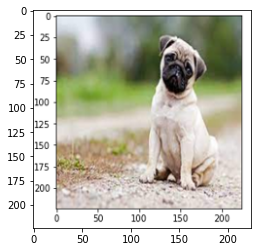

In [5]:
import torch
from torchvision.models import vgg11,resnet18,resnet101,resnext101_32x8d
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

model = vgg11(pretrained=True)
img_path = './dog.png'
# resize操作是为了和传入神经网络训练图片大小一致
img = Image.open(img_path).resize((224,224))
# 需要将原始图片转为np.float32格式并且在0-1之间 
rgb_img = np.float32(img)/255
print(rgb_img.shape)
plt.imshow(img)

<class 'numpy.ndarray'>


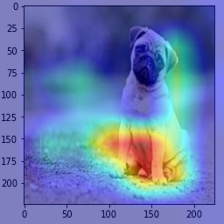

In [6]:
from pytorch_grad_cam import GradCAM,ScoreCAM,GradCAMPlusPlus,AblationCAM,XGradCAM,EigenCAM,FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

img_tensor = torch.tensor(rgb_img.transpose(2,0,1)).view(1,3,224,224)

target_layers = [model.features[-1]]
# 选取合适的类激活图，但是ScoreCAM和AblationCAM需要batch_size
cam = GradCAM(model=model,target_layers=target_layers)
targets = [ClassifierOutputTarget(200)]   
# 上方preds需要设定，比如ImageNet有1000类，这里可以设为200
grayscale_cam = cam(input_tensor=img_tensor, targets=targets)
grayscale_cam = grayscale_cam[0, :]
cam_img = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
print(type(cam_img))
Image.fromarray(cam_img)

### 7.2.4 使用FlashTorch快速实现CNN可视化

聪明的你可能要问了，已经202x年了，难道还要我们手把手去写各种CNN可视化的代码吗？答案当然是否定的。随着PyTorch社区的努力，目前已经有不少开源工具能够帮助我们快速实现CNN可视化。这里我们介绍其中的一个——[FlashTorch](https://github.com/MisaOgura/flashtorch)。

（注：使用中发现该package对环境有要求，如果下方代码运行报错，请参考作者给出的配置或者Colab运行环境：https://github.com/MisaOgura/flashtorch/issues/39）

- 安装

```
pip install flashtorch
```

- 可视化梯度

(-0.5, 479.5, 319.5, -0.5)

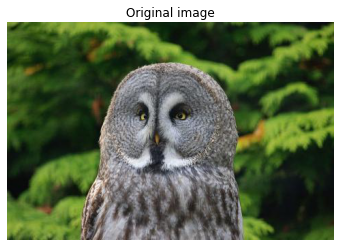

In [17]:
# Download example images
# !mkdir -p images
# !wget -nv \
#    https://github.com/MisaOgura/flashtorch/raw/master/examples/images/great_grey_owl.jpg \
#    https://github.com/MisaOgura/flashtorch/raw/master/examples/images/peacock.jpg   \
#    https://github.com/MisaOgura/flashtorch/raw/master/examples/images/toucan.jpg    \
#    -P /content/images

import matplotlib.pyplot as plt
import torchvision.models as models
from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop
image = load_image('great_grey_owl.jpg')
plt.imshow(image)
plt.title('Original image')
plt.axis('off')


In [19]:
model = models.alexnet(pretrained=True)
backprop = Backprop(model)

owl = apply_transforms(image)

target_class = 24
backprop.visualize(owl, target_class, guided=True, use_gpu=True)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\zhou/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

RuntimeError: Output 0 of UnbindBackward0 is a view and is being modified inplace. This view is the output of a function that returns multiple views. Such functions do not allow the output views to be modified inplace. You should replace the inplace operation by an out-of-place one.

In [13]:
torch.__version__

'1.10.0'

- 可视化卷积核

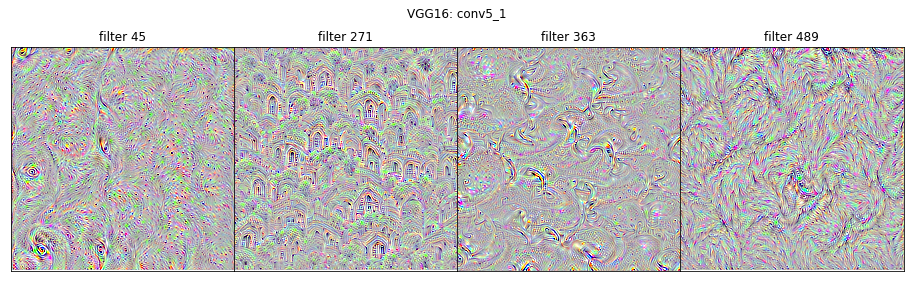

In [20]:
import torchvision.models as models
from flashtorch.activmax import GradientAscent

model = models.vgg16(pretrained=True)
g_ascent = GradientAscent(model.features)

# specify layer and filter info
conv5_1 = model.features[24]
conv5_1_filters = [45, 271, 363, 489]

g_ascent.visualize(conv5_1, conv5_1_filters, title="VGG16: conv5_1")

### 本节参考

【1】https://andrewhuman.github.io/cnn-hidden-layout_search

【2】https://cloud.tencent.com/developer/article/1747222 

【3】https://github.com/jacobgil/pytorch-grad-cam

【4】https://github.com/MisaOgura/flashtorch

## 7.3 使用TensorBoard可视化训练过程

训练过程的可视化在深度学习模型训练中扮演着重要的角色。学习的过程是一个优化的过程，我们需要找到最优的点作为训练过程的输出产物。一般来说，我们会结合训练集的损失函数和验证集的损失函数，绘制两条损失函数的曲线来确定训练的终点，找到对应的模型用于测试。那么除了记录训练中每个epoch的loss值，能否实时观察损失函数曲线的变化，及时捕捉模型的变化呢？

此外，我们也希望可视化其他内容，如输入数据（尤其是图片）、模型结构、参数分布等，这些对于我们在debug中查找问题来源非常重要（比如输入数据和我们想象的是否一致）。

TensorBoard作为一款可视化工具能够满足上面提到的各种需求。TensorBoard由TensorFlow团队开发，最早和TensorFlow配合使用，后来广泛应用于各种深度学习框架的可视化中来。本节我们探索TensorBoard的强大功能，希望帮助读者“从入门到精通”。

经过本节的学习，你将收获：

- 安装TensorBoard工具
- 了解TensorBoard可视化的基本逻辑
- 掌握利用TensorBoard实现训练过程可视化
- 掌握利用TensorBoard完成其他内容的可视化

### 7.3.1 TensorBoard安装

在已安装PyTorch的环境下使用pip安装即可：

```
pip install tensorboardX
```

也可以使用PyTorch自带的tensorboard工具，此时不需要额外安装tensorboard。

### 7.3.2 TensorBoard可视化的基本逻辑

我们可以将TensorBoard看做一个记录员，它可以记录我们指定的数据，包括模型每一层的feature map，权重，以及训练loss等等。TensorBoard将记录下来的内容保存在一个用户指定的文件夹里，程序不断运行中TensorBoard会不断记录。记录下的内容可以通过网页的形式加以可视化。

### 7.3.3 TensorBoard的配置与启动

在使用TensorBoard前，我们需要先指定一个文件夹供TensorBoard保存记录下来的数据。然后调用tensorboard中的SummaryWriter作为上述“记录员”

In [1]:
from torch.utils.tensorboard import SummaryWriter


writer = SummaryWriter('./runs')

上面的操作实例化SummaryWritter为变量writer，并指定writer的输出目录为当前目录下的"runs"目录。也就是说，之后tensorboard记录下来的内容都会保存在runs。

如果使用PyTorch自带的tensorboard，则采用如下方式import：

In [ ]:
from torch.utils.tensorboard import SummaryWriter


writer = SummaryWriter('./runs')

这里聪明的你可能发现了，是否可以手动往runs文件夹里添加数据用于可视化，或者把runs文件夹里的数据放到其他机器上可视化呢？答案是可以的。只要数据被记录，你可以将这个数据分享给其他人，其他人在安装了tensorboard的情况下就会看到你分享的数据。

启动tensorboard也很简单，在命令行中输入

```
tensorboard --logdir=/path/to/logs/ --port=xxxx
```

其中“path/to/logs/"是指定的保存tensorboard记录结果的文件路径（等价于上面的“./runs"，port是外部访问TensorBoard的端口号，可以通过访问ip:port访问tensorboard，这一操作和jupyter notebook的使用类似。如果不是在服务器远程使用的话则不需要配置port。

有时，为了tensorboard能够不断地在后台运行，也可以使用nohup命令或者tmux工具来运行tensorboard。大家可以自行搜索，这里不展开讨论了。

下面，我们将模拟深度学习模型训练过程，来介绍如何利用TensorBoard可视化其中的各个部分。

### 7.3.4 TensorBoard模型结构可视化

首先定义模型：

In [4]:
import torch.nn as nn
import torch
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size = 3)
        self.pool = nn.MaxPool2d(kernel_size = 2,stride = 2)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 5)
        self.adaptive_pool = nn.AdaptiveMaxPool2d((1,1))
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64,32)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.adaptive_pool(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.sigmoid(x)
        return y

model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (adaptive_pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


可视化模型的思路和7.1中介绍的方法一样，都是给定一个输入数据，前向传播后得到模型的结构，再通过TensorBoard进行可视化，使用add_graph：

In [7]:
writer.add_graph(model, input_to_model = torch.rand(1, 3, 224, 224))
writer.close()

In [6]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose(
    [transforms.ToTensor()])
transform_test = transforms.Compose(
    [transforms.ToTensor()])

train_data = datasets.CIFAR10(".", train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10(".", train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

images, labels = next(iter(train_loader))
 
# 仅查看一张图片
writer = SummaryWriter('./pytorch_tb')
writer.add_image('images[0]', images[0])
writer.close()
 
# 将多张图片拼接成一张图片，中间用黑色网格分割
# create grid of images
writer = SummaryWriter('./pytorch_tb')
img_grid = torchvision.utils.make_grid(images)
writer.add_image('image_grid', img_grid)
writer.close()
 
# 将多张图片直接写入
writer = SummaryWriter('./pytorch_tb')
writer.add_images("images",images,global_step = 0)
writer.close()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting .\cifar-10-python.tar.gz to .
Files already downloaded and verified


In [ ]:
conda install -c conda-forge tensorboard
conda install -c conda-forge/label/cf201901 tensorboard
conda install -c conda-forge/label/cf202003 tensorboard
